### Loading the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import warnings
warnings.filterwarnings('ignore')

### Loading the datasets 
- app variable signifies it is containing the dataset for the current applications
- prev_app variable signifies it is containing the dataset for the previous applications

In [2]:
app = pd.read_csv('application_data.csv')
prev_app = pd.read_csv('previous_application.csv')

### Observing and inspecting the application data set

In [3]:
app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
app.shape

(307511, 122)

### Cleaning the application data set

In [5]:
(app.isnull().sum()/app.shape[0])*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

increasing the max display row count as unable to see all the column names to check the missing data percentage

In [6]:
pd.set_option('display.max_rows',130)

In [7]:
(app.isnull().sum()/app.shape[0])*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

Taking reference from the provided column desciption dataset and can see that the columns with most missing values are the ones that contain normalized values for living details of the client/applicant
- deciding to drop these normalized values.
- also made sure that these columns are not containing data related to the housing situation of the client (renting etc.) as this might be an important factor for loan that bank might consider

In [8]:
app.iloc[:, 44:91].columns

Index(['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_M

In [9]:
app.drop(app.iloc[:, 44:91],axis=1,inplace=True)

checking the missing values percantages now

In [10]:
(app.isnull().sum().sort_values()/app.shape[0])*100

SK_ID_CURR                      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
ORGANIZATION_TYPE               0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_4                 0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_8                 0.000000
FLAG_DOCUMENT_9                 0.000000
FLAG_DOCUMENT_10                0.000000
FLAG_DOCUMENT_11                0.000000
FLAG_DOCUMENT_12                0.000000
FLAG_DOCUMENT_13                0.000000
FLAG_DOCUMENT_14                0.000000
FLAG_DOCUMENT_15                0.000000
FLAG_DOCUMENT_16                0.000000
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18

- Deciding to drop OWN CAR AGE and EXT_SOURCE 1,2,3 as well
- EXT SOURCE are normalized columns of data from external sources and 1 has more than 56% nan values and 3 has more that 19%
can potentially impact analysis
- dropping own car age because high missing values and only contains data of days of car owned but dataset still has flag car own that would be essintial for the analisys


In [11]:
app.drop(['EXT_SOURCE_1','EXT_SOURCE_3','EXT_SOURCE_2','OWN_CAR_AGE'],axis=1,inplace=True)

checking the remaining columns and handling missing values
starting with 'DAYS_LAST_PHONE_CHANGE'

In [12]:
app['DAYS_LAST_PHONE_CHANGE'].isna().sum()
#only having 1 nun value and the describe showing mean,median in negative suggesting data set in form of days since last change
# for data sanity, the column should be converted to positive values.
# multiplying the data with -1 so change the data
# also datatype in float, days can be in int so cerveting the same
app = app[~app['DAYS_LAST_PHONE_CHANGE'].isna()]
app['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [13]:
app['DAYS_LAST_PHONE_CHANGE'] = app['DAYS_LAST_PHONE_CHANGE'] * (-1)
app['DAYS_LAST_PHONE_CHANGE'] = app['DAYS_LAST_PHONE_CHANGE'].astype(int)
app['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

Inspecting and cleaning the CNT_FAM_MEMBERS column
- only having 2 missing values

In [14]:
print(app['CNT_FAM_MEMBERS'].dtype)
app['CNT_FAM_MEMBERS'].describe()

float64


count    307508.000000
mean          2.152666
std           0.910683
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [15]:
#mean and median are very close,deciding the replace the null values with median

In [16]:
fam_median=app['CNT_FAM_MEMBERS'].median()
app.loc[app['CNT_FAM_MEMBERS'].isnull(),'CNT_FAM_MEMBERS']=fam_median

In [17]:
app['CNT_FAM_MEMBERS'] = app['CNT_FAM_MEMBERS'].astype(int)
app['CNT_FAM_MEMBERS'].describe()

count    307510.000000
mean          2.152665
std           0.910680
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [18]:
app['CNT_FAM_MEMBERS'].isna().sum()

0

Inspecting and cleaning the AMT_ANNUITY column

In [19]:
app['AMT_ANNUITY'].isna().sum()
#only 12 values,deciding to impute

12

In [20]:
app['AMT_ANNUITY'].describe()
#column having outlier, can bee seen from the deviation between 75th and max value and
#can be seen from the difference between the mean and the 50th percentile value

count    307498.000000
mean      27108.577804
std       14493.760721
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [21]:
amt_med=app['AMT_ANNUITY'].median()
app.loc[app['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=amt_med

In [22]:
app['AMT_ANNUITY'].describe()

count    307510.000000
mean      27108.491735
std       14493.484471
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [23]:
app['AMT_ANNUITY'].isnull().sum()

0

inspecting the AMT_GOODS_PRICE column

In [24]:
app['AMT_GOODS_PRICE'].describe()
#could not gather much from the describe,manually checking the null columns for more clarity

count    3.072320e+05
mean     5.383971e+05
std      3.694467e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [25]:
app[app['AMT_GOODS_PRICE'].isnull()].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
724       100837       0    Revolving loans           F            N   
5937      106955       0    Revolving loans           F            N   
6425      107494       0    Revolving loans           F            N   
6703      107822       0    Revolving loans           F            N   
7647      108913       0    Revolving loans           M            N   

     FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
724                Y             2           45000.0    135000.0       6750.0   
5937               N             0          157500.0    450000.0      22500.0   
6425               N             0           67500.0    202500.0      10125.0   
6703               N             1          121500.0    180000.0       9000.0   
7647               Y             0          180000.0    450000.0      22500.0   

      ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
724   ...                 0                0                0   
5937  ...                 0                0                0   
6425  ...                 0                0                0   
6703  ...                 0                0                0   
7647  ...                 0                0                0   

     FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
724                 0                        NaN                       NaN   
5937                0                        0.0                       0.0   
6425                0                        NaN                       NaN   
6703                0                        0.0                       0.0   
7647                0                        0.0                       0.0   

      AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
724                          NaN                        NaN   
5937                         0.0                        0.0   
6425                         NaN                        NaN   
6703                         0.0                        0.0   
7647                         0.0                        0.0   

      AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
724                         NaN                         NaN  
5937                        0.0                         2.0  
6425                        NaN                         NaN  
6703                        0.0                         0.0  
7647                        0.0                         3.0  

[5 rows x 71 columns]

In [26]:
#taking reference from the column description csv provided and
#from the above data that resolving loan seems to be common for the null data
#the missing values seem geniuine since the resolving loans are usually not for purchasing any perticular item.
#deciding to impute these values with 0
app.loc[app['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']=0

In [27]:
app['AMT_GOODS_PRICE'].isnull().sum()

0

In [28]:
#Taking reference from the provided column describe csv data provided
#for the folllowing 4 columns 
# 'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'
#the above 4 columns suggest data about the defaulters and dpd for the client's surrounding
#this data might have some relation with the client's behaviour.
#deciding to impute this data for the missing values

In [29]:
app['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    306489.000000
mean          1.422250
std           2.400991
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [30]:
app['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    306489.000000
mean          0.143421
std           0.446699
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [31]:
app['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    306489.000000
mean          1.405297
std           2.379806
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [32]:
app['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    306489.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

observations : 
- the 'DEF_60_CNT_SOCIAL_CIRCLE' and 'DEF_30_CNT_SOCIAL_CIRCLE' suggest not any such outlier present in the data
- the 'OBS_60_CNT_SOCIAL_CIRCLE' and 'OBS_30_CNT_SOCIAL_CIRCLE' do however suggest some outlier
<br>might have to do outlier treatment for these two later on

for now imputing missing vaues as median,0 and changing the dtypes to int

In [33]:
app.loc[app['OBS_30_CNT_SOCIAL_CIRCLE'].isnull(),'OBS_30_CNT_SOCIAL_CIRCLE']=0
app.loc[app['DEF_30_CNT_SOCIAL_CIRCLE'].isnull(),'DEF_30_CNT_SOCIAL_CIRCLE']=0
app.loc[app['OBS_60_CNT_SOCIAL_CIRCLE'].isnull(),'OBS_60_CNT_SOCIAL_CIRCLE']=0
app.loc[app['DEF_60_CNT_SOCIAL_CIRCLE'].isnull(),'DEF_60_CNT_SOCIAL_CIRCLE']=0

Inspecting the 'NAME_TYPE_SUITE' column

In [34]:
print(app['NAME_TYPE_SUITE'].value_counts())
print(app['NAME_TYPE_SUITE'].mode()[0])
print(app['NAME_TYPE_SUITE'].isnull().sum())
print(app['NAME_TYPE_SUITE'].shape[0])

Unaccompanied      248525
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
Unaccompanied
1292
307510


In [35]:
#Deciding to impute the missing/nan values with mode of the data

In [36]:
suite_mode=app['NAME_TYPE_SUITE'].mode()[0]
app.loc[app['NAME_TYPE_SUITE'].isnull(),'NAME_TYPE_SUITE']=suite_mode
print(app['NAME_TYPE_SUITE'].value_counts())

Unaccompanied      249817
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64


Inspecting and understanding the dataspread present in 'OCCUPATION_TYPE' column

In [37]:
app['OCCUPATION_TYPE'].value_counts(dropna=False)

NaN                      96390
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [38]:
#taking refernce from the column description csv provided,
#the 'OCCUPATION_TYPE' might be having a relation with 'NAME_INCOME_TYPE'
#checking the null values again with respect to 'NAME_INCOME_TYPE'
app[app['OCCUPATION_TYPE'].isnull()]['NAME_INCOME_TYPE'].value_counts()

Pensioner               55357
Working                 24919
Commercial associate    12297
State servant            3787
Unemployed                 22
Student                     5
Businessman                 2
Maternity leave             1
Name: NAME_INCOME_TYPE, dtype: int64

In [39]:
#checking the occupation type data for the pensioner as the name income type to understand further
app[app['NAME_INCOME_TYPE']=='Pensioner']['OCCUPATION_TYPE'].value_counts(dropna=False)

NaN               55357
Cleaning staff        2
Laborers              1
Medicine staff        1
Sales staff           1
Name: OCCUPATION_TYPE, dtype: int64

- Deciding to leave the occupation type data as it is since it doesn't seem to be a mandatory field and seems that appicants chose not to fill it,
- imputing the values with mode or removing the data is bound to create descripancy and important data loss

Understanding the remaining columns:
- [AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR]

In [40]:
for col in app.columns:
    if col.startswith("AMT_REQ"):
        print(app[col].value_counts(dropna=False))
        print('\n--xx--\n')

0.0    264366
NaN     41518
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

--xx--

0.0    264503
NaN     41518
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

--xx--

0.0    257456
NaN     41518
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

--xx--

0.0     222233
NaN      41518
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

--xx--

0.0      215417
NaN       41518
1.0    

Observations : 
- taking reference from the column description csv, all the above columns contain the data of the finansial companies that may have checked with the bureau regarding the applicants credit score
this indicates 2 things : 
1. the applicant is probably looking for the paralell loan/ another loan
2. how many loans were applied for in the last year

<br>
what this means is that NaN values can signify the connection between the company and the bureau or if the applicant has got any parallel loans or applied for any other loan as well.

- the above columns feel of high importance and the NaN values also seem genuine cases.
- Choosing to go with the accurate data and not imputing the values with mean,median,mode and decrease the accuracy of the data
- also at the same time not dropping these columns as well since they are definitely very important columns that will impact the target variable

In [41]:
#rechecking the missing values and missing values columns once again to be sure
(app.isnull().sum().sort_values()/app.shape[0])*100

SK_ID_CURR                      0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
ORGANIZATION_TYPE               0.000000
OBS_30_CNT_SOCIAL_CIRCLE        0.000000
DEF_30_CNT_SOCIAL_CIRCLE        0.000000
OBS_60_CNT_SOCIAL_CIRCLE        0.000000
DEF_60_CNT_SOCIAL_CIRCLE        0.000000
DAYS_LAST_PHONE_CHANGE          0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_4                 0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_8                 0.000000
FLAG_DOCUMENT_9                 0.000000
FLAG_DOCUMENT_10                0.000000
FLAG_DOCUMENT_11                0.000000
FLAG_DOCUMENT_12                0.000000
FLAG_DOCUMENT_13                0.000000
FLAG_DOCUMENT_14                0.000000
FLAG_DOCUMENT_15                0.000000
FLAG_DOCUMENT_16

### Analysing and Plotting the cleaned application dataset to draw conclusions

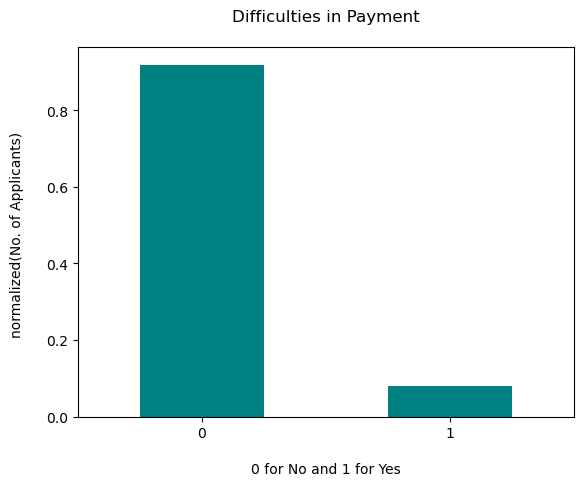

In [42]:
#Checking the spread of TARGET VARIABLE 
# 0. for the applicants with no difficulties in payment for the loan EMI.s
# 1. for the applicants with difficulties in payment for the loan EMI.s 
app['TARGET'].value_counts(normalize=True).plot.bar(color='teal')
plt.title('Difficulties in Payment\n')
plt.xlabel('\n0 for No and 1 for Yes')
plt.xticks(rotation=0)
#plt.xlabel()
plt.ylabel('normalized(No. of Applicants) \n')
plt.show()

In [43]:
#the above graph suggest that most of the applicants are going to be able to repay the loan without any difficulties
#finding the exact ratio to be sure since graph not pinpointing the exact ratio 
#but it does suggest close to 1 is to roughly every 10 applicant is going to have difficulties in repating the loan
round(app[app.TARGET==0].shape[0]/app[app.TARGET==1].shape[0],1)

11.4

#### observations : 
- the above Plot and Ratio suggest that 1 out of every 11 applicants is going to have difficulties in repaying the loan

#### Checking the catagorical columns


In [44]:
#Ploting the catagorical columns to understand the data spread
app.columns[app.dtypes=="object"].tolist()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

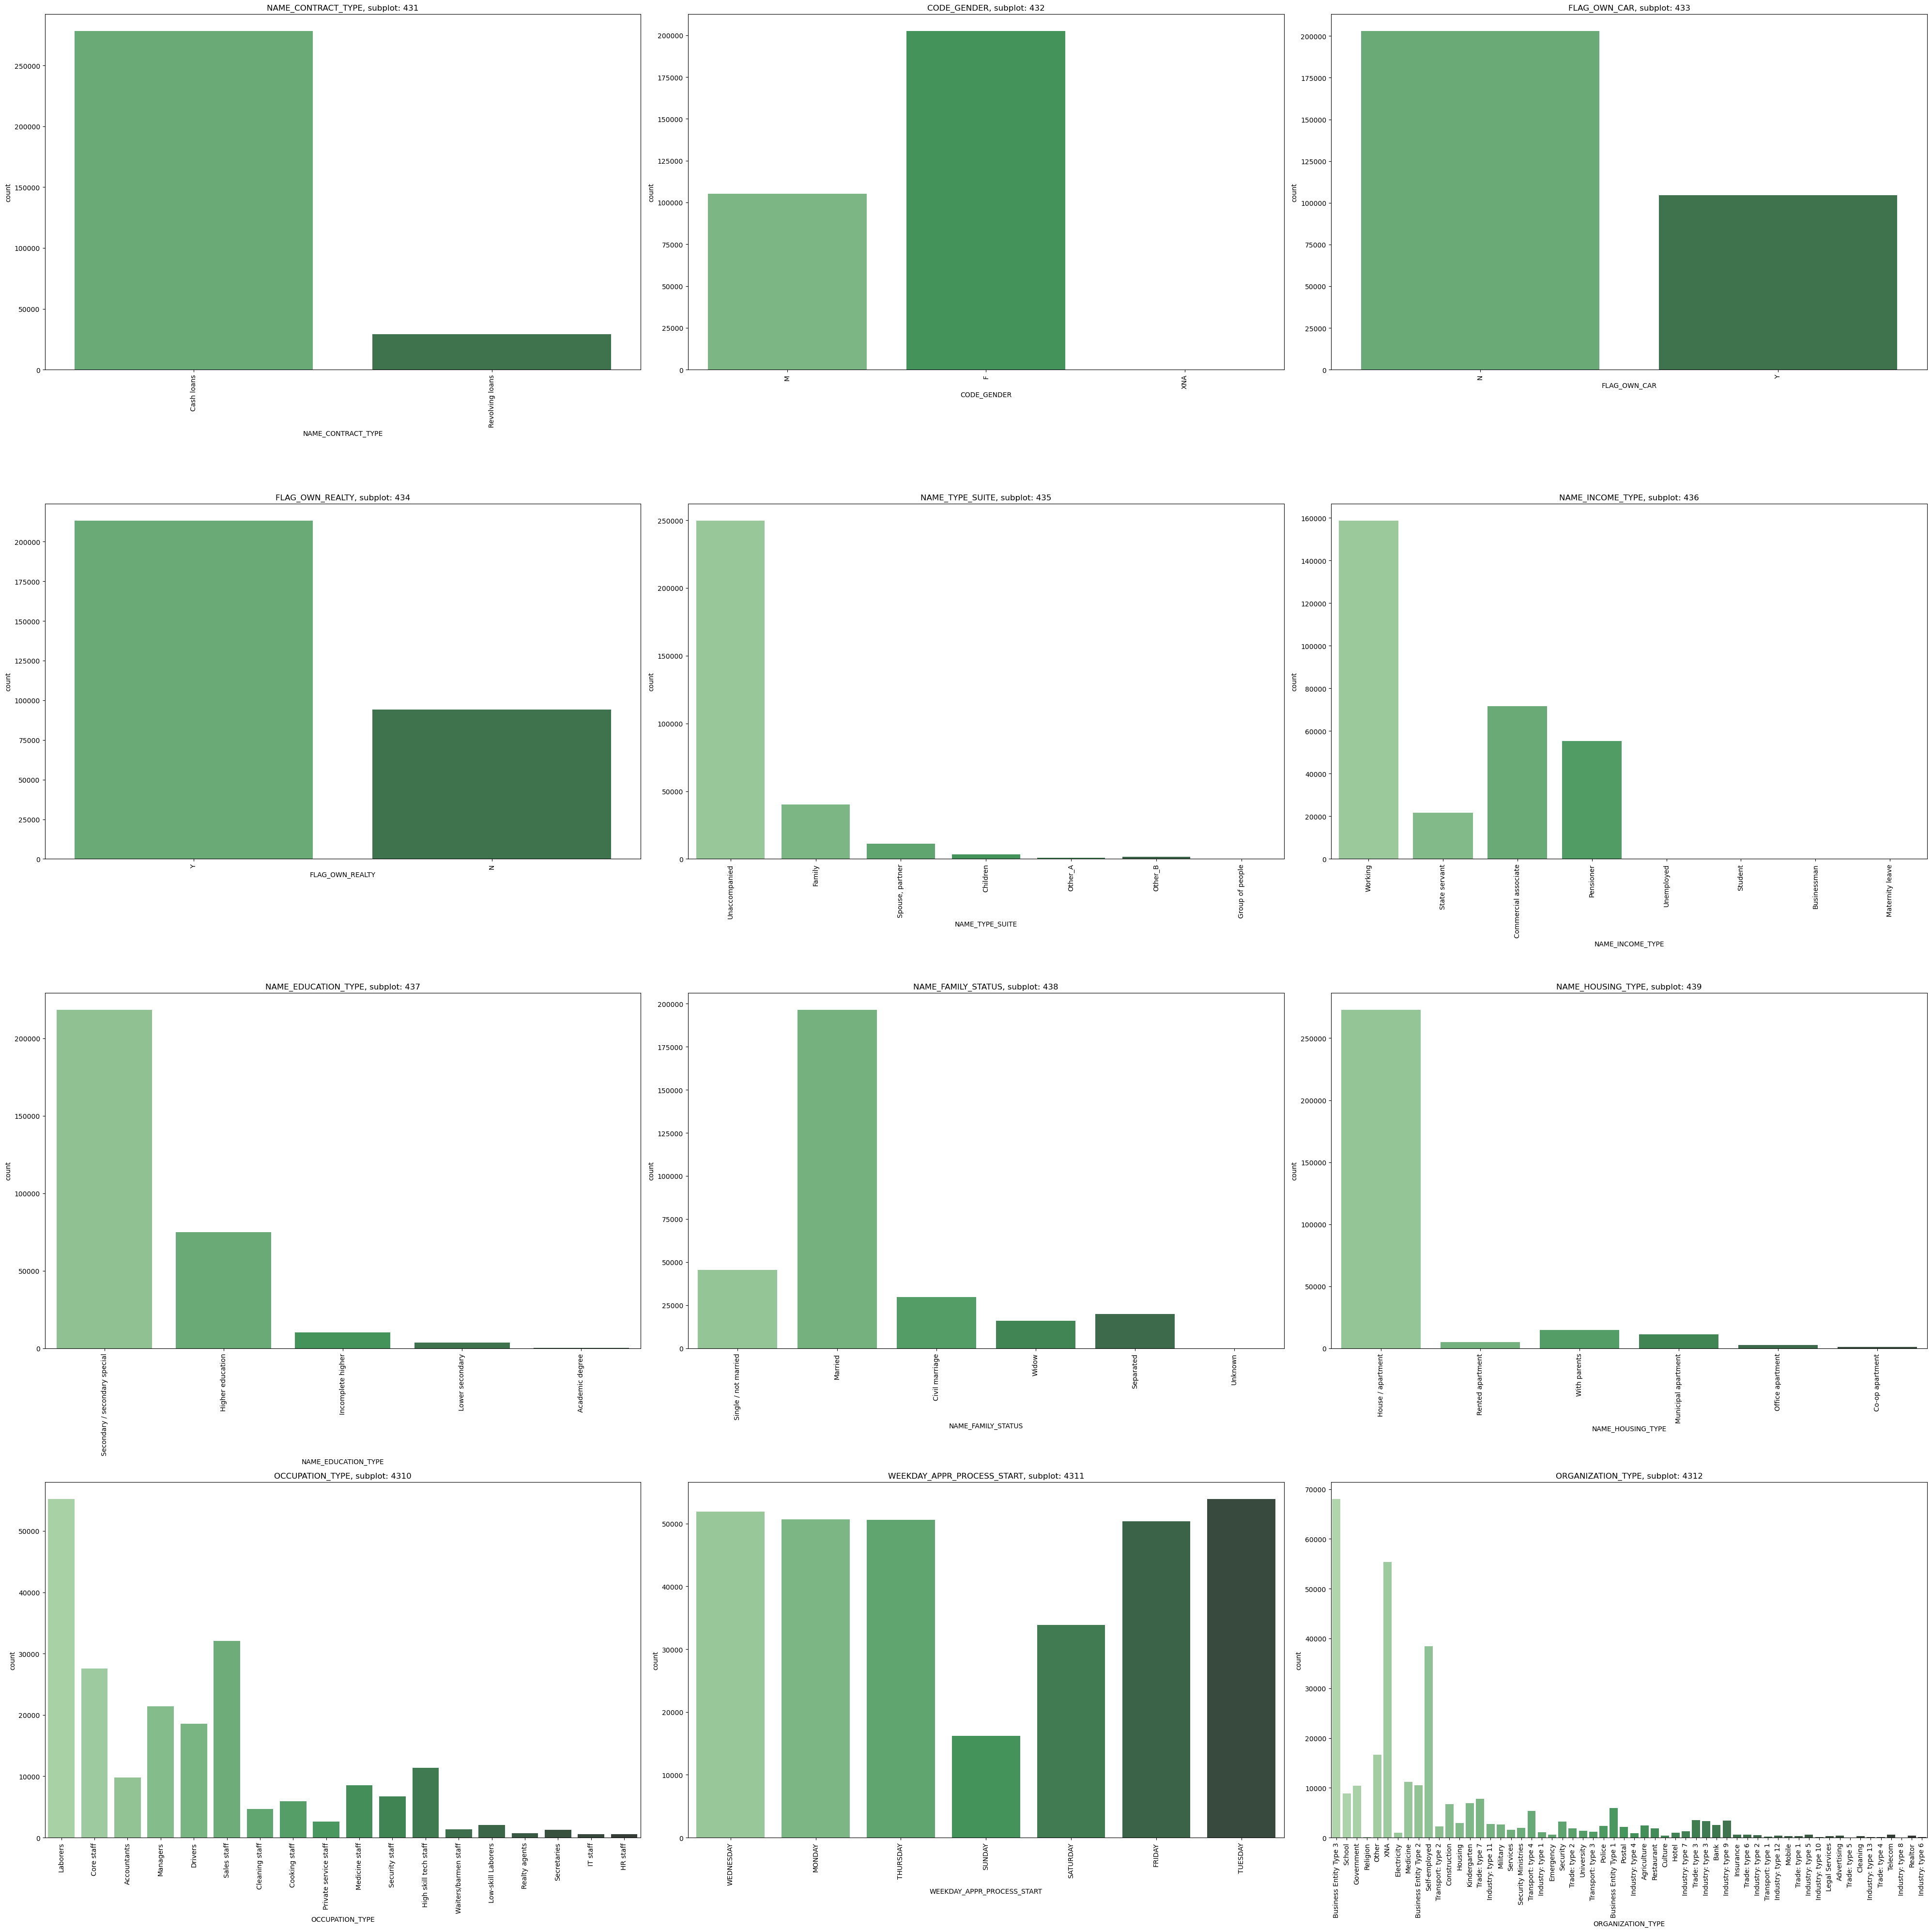

In [45]:
#using the sub plot to plot all the categorical columns
#the number of columns  = 12 
#a sublot with 4 rows and 3 cols should be fine
#designing a loop since ploting all the 12 columns manually 1 by 1 is very lengthy and time consuming task
rows = 4
cols = 3
plot_counter = 1

fig = plt.figure(figsize=(40,40))

for i in app.columns:
    if app[i].dtypes=="object":
        plt.subplot(rows, cols, plot_counter)
        plt.title('{}, subplot: {}{}{}'.format(i, rows, cols, plot_counter))
        plt.xlabel(i)
        plt.xticks(rotation=90)
        sns.countplot(x = i, data = app,palette="Greens_d")
        plot_counter = plot_counter + 1

fig.tight_layout()
plt.show()

#### observations
- Cashloans are offered Way more than revolving loans (close to 90%)
- Not all clients shared there gender (might have to check this later) and Females are offered loans way more than Males (roughly 50%-60%)
- Close to 60% applicants don't own a car
- Close to 50% applicants own a house/living quaters
- Working people are taking more loans
- Majority of the People who came for loan were unaccompanied (close to 85%)
- Majority of applicants are Married
- Majority of the applicants have secondary/secondary special education
- Close to 40% applicants have not provided the Organization type 
- Applicants with occupation type as laborers tend to apply for loan more

In [46]:
#changing the FLAG OWN CAR and FLAG OWN reality to interger from object to get the stats better
app['OWN_CAR_flag']=np.where(app.FLAG_OWN_CAR =="Y",1,0)
app['OWN_REALTY_flag']= np.where(app.FLAG_OWN_REALTY =="Y",1,0)
print(app['OWN_CAR_flag'].value_counts(),'\n')
print(app['OWN_REALTY_flag'].value_counts(),'\n')
print(app['OWN_CAR_flag'].describe(),'\n')
print(app['OWN_REALTY_flag'].describe())

0    202924
1    104586
Name: OWN_CAR_flag, dtype: int64 

1    213311
0     94199
Name: OWN_REALTY_flag, dtype: int64 

count    307510.000000
mean          0.340106
std           0.473745
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: OWN_CAR_flag, dtype: float64 

count    307510.000000
mean          0.693672
std           0.460968
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: OWN_REALTY_flag, dtype: float64


In [47]:
#correcting the columns with XNA values
print(app[app['CODE_GENDER']=='XNA'].shape[0])
print(app[app['ORGANIZATION_TYPE']=='XNA'].shape[0])
#already seen from the above plots that females are having more records
#deciding to impute the above 4 records with F
app.loc[app['CODE_GENDER']=='XNA','CODE_GENDER']='F'

4
55374


In [48]:
print(app[app['CODE_GENDER']=='XNA'].shape[0])

0


In [49]:
# as for then organization type
app['ORGANIZATION_TYPE'].describe()
# can see that roughly 18% of data is missing 
# 55374 rows having XNA out of 307510 total rows
# as noted from the above plot that the most applicants applying for the loan belong to 
# Business Entity Type 3 and imputing the XNA values with this (mode) is going to severly impact the spread and analysis
# deciding to drop these records to maintain an accurate dataset to work with
app=app.drop(app.loc[app['ORGANIZATION_TYPE']=='XNA'].index)
app[app['ORGANIZATION_TYPE']=='XNA'].shape

(0, 73)

#### Checking the numerical data

In [50]:
app.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [51]:
#Deciding to drop all the document provided columns since 
#they all do not provide any insight as to what all documents are necessary
#also deciding to drop the columns containing the personal information like FLAG_EMAIL,FLAG_MOBILE etc.
#as they also do not provide any insights on the analysis
#the two Important FLAG columns i.e. FLAG_OWN_CAR,FLAG_OWN_REALTY have been retained already 
#while convertion to INT from BOOL in form of OWN_CAR_flag and OWN_REALTY_flag

for i in app.columns:
    if i.startswith("FLAG"):
        app.drop(columns=i, inplace=True)
        
app.shape

(252136, 45)

In [52]:
app.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                  int32
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGIO

### Standardizing the numerical columns

In [53]:
print(app.DAYS_BIRTH.describe(),'\n\n')
#changing to +ve and converting to years for simplification
app.DAYS_BIRTH=app.DAYS_BIRTH.apply(lambda x: abs(x//365.25))
app.rename({'DAYS_BIRTH':'AGE_IN_YEARS'}, axis=1, inplace=True)
print(app.AGE_IN_YEARS.describe(),'\n\n')
print(app.DAYS_EMPLOYED.describe(),'\n\n')
#doing same treatment as above, converting days to years and changing negative values to positive
app.DAYS_EMPLOYED=app.DAYS_EMPLOYED.apply(lambda x: abs(x//365.25))
app.rename({'DAYS_EMPLOYED':'EMPLOYED_IN_YEARS'}, axis=1, inplace=True)
print(app.EMPLOYED_IN_YEARS.describe(),'\n\n')
print(app.DAYS_REGISTRATION.describe(),'\n\n')
print(app.DAYS_ID_PUBLISH.describe(),'\n\n')
#changing both these columns to years and correcting the negative values as well
app.DAYS_REGISTRATION=app.DAYS_REGISTRATION.apply(lambda x: abs(x//365.25))
app.rename({'DAYS_REGISTRATION':'REGISTRATION_IN_YEARS'}, axis=1, inplace=True)
app.DAYS_ID_PUBLISH=app.DAYS_ID_PUBLISH.apply(lambda x: abs(x//365.25))
app.rename({'DAYS_ID_PUBLISH':'ID_PUBLISH_IN_YEARS'}, axis=1, inplace=True)
print(app.REGISTRATION_IN_YEARS.describe(),'\n\n')
print(app.ID_PUBLISH_IN_YEARS.describe())

count    252136.000000
mean     -14769.157744
std        3662.560252
min      -25200.000000
25%      -17563.000000
50%      -14573.000000
75%      -11775.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64 


count    252136.000000
mean         40.934321
std          10.025757
min          21.000000
25%          33.000000
50%          40.000000
75%          49.000000
max          69.000000
Name: AGE_IN_YEARS, dtype: float64 


count    252136.000000
mean      -2384.177618
std        2338.361091
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64 


count    252136.000000
mean          7.031471
std           6.411552
min           0.000000
25%           3.000000
50%           5.000000
75%           9.000000
max          50.000000
Name: EMPLOYED_IN_YEARS, dtype: float64 


count    252136.000000
mean      -4635.430236
std        3252.175591
min      -22928.000000
25%       -6952.

- Binning the age and total income to understand what age group and income group do most applicants lie in

In [54]:
app['AGE_GROUP']= pd.cut(app.AGE_IN_YEARS,bins=[15,25,35,45,55,65,75])
app['AGE_GROUP'].value_counts(normalize=True)
#Using absolute values for age since aleady know the spread of age because of describe function
#used above while converting the age data

(35, 45]    0.330310
(25, 35]    0.286211
(45, 55]    0.256346
(55, 65]    0.075618
(15, 25]    0.048379
(65, 75]    0.003137
Name: AGE_GROUP, dtype: float64

In [55]:
app['INCOME_GROUP']= pd.qcut(app['AMT_INCOME_TOTAL'], q=[0,0.2,0.4,0.6,0.8,1],labels=['VL','L','M','H','VH'])
app['INCOME_GROUP'].value_counts(normalize=True)

VL    0.290383
M     0.224117
VH    0.169012
L     0.160429
H     0.156059
Name: INCOME_GROUP, dtype: float64

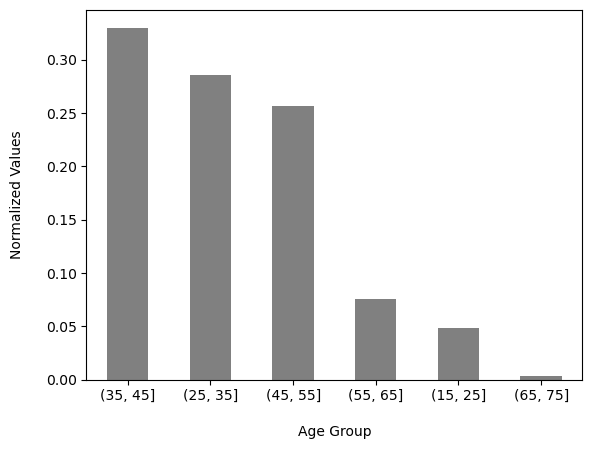

In [56]:
#Plotting the AGE_GROUP
app.AGE_GROUP.value_counts(normalize=True).plot.bar(color='Grey')
plt.xlabel('\nAge Group')
plt.ylabel('Normalized Values\n')
plt.xticks(rotation=0)
plt.show()

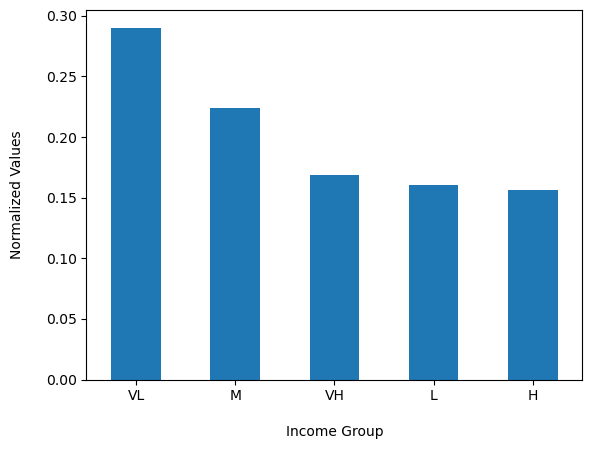

In [57]:
#Plotting the INCOME_GROUP
app.INCOME_GROUP.value_counts(normalize=True).plot.bar()
plt.xlabel('\nIncome Group')
plt.ylabel('Normalized Values\n')
plt.xticks(rotation=0)
plt.show()

Observations : 
1. People of age 25 to 55 are requesting for loan much more than older people 
2. out of the age of 25-55 people of age 35 - 45 are more prone to taking loans
3. Although all Income Groups are applying for loan but applicants following under VL Income Group are more prone
4. data checks out since we already saw that laberors were applying for loans more as compared to other groups

In [58]:
#using subplot for plotting the numerical data to understand the spread and outliers(if any)

In [59]:
app.dtypes
#ignoring the float type data since they represent data that 
#has been either already converted to category or not of significance as of now

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
AGE_IN_YEARS                    float64
EMPLOYED_IN_YEARS               float64
REGISTRATION_IN_YEARS           float64
ID_PUBLISH_IN_YEARS             float64
OCCUPATION_TYPE                  object
CNT_FAM_MEMBERS                   int32
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64
WEEKDAY_APPR_PROCESS_START       object
HOUR_APPR_PROCESS_START           int64


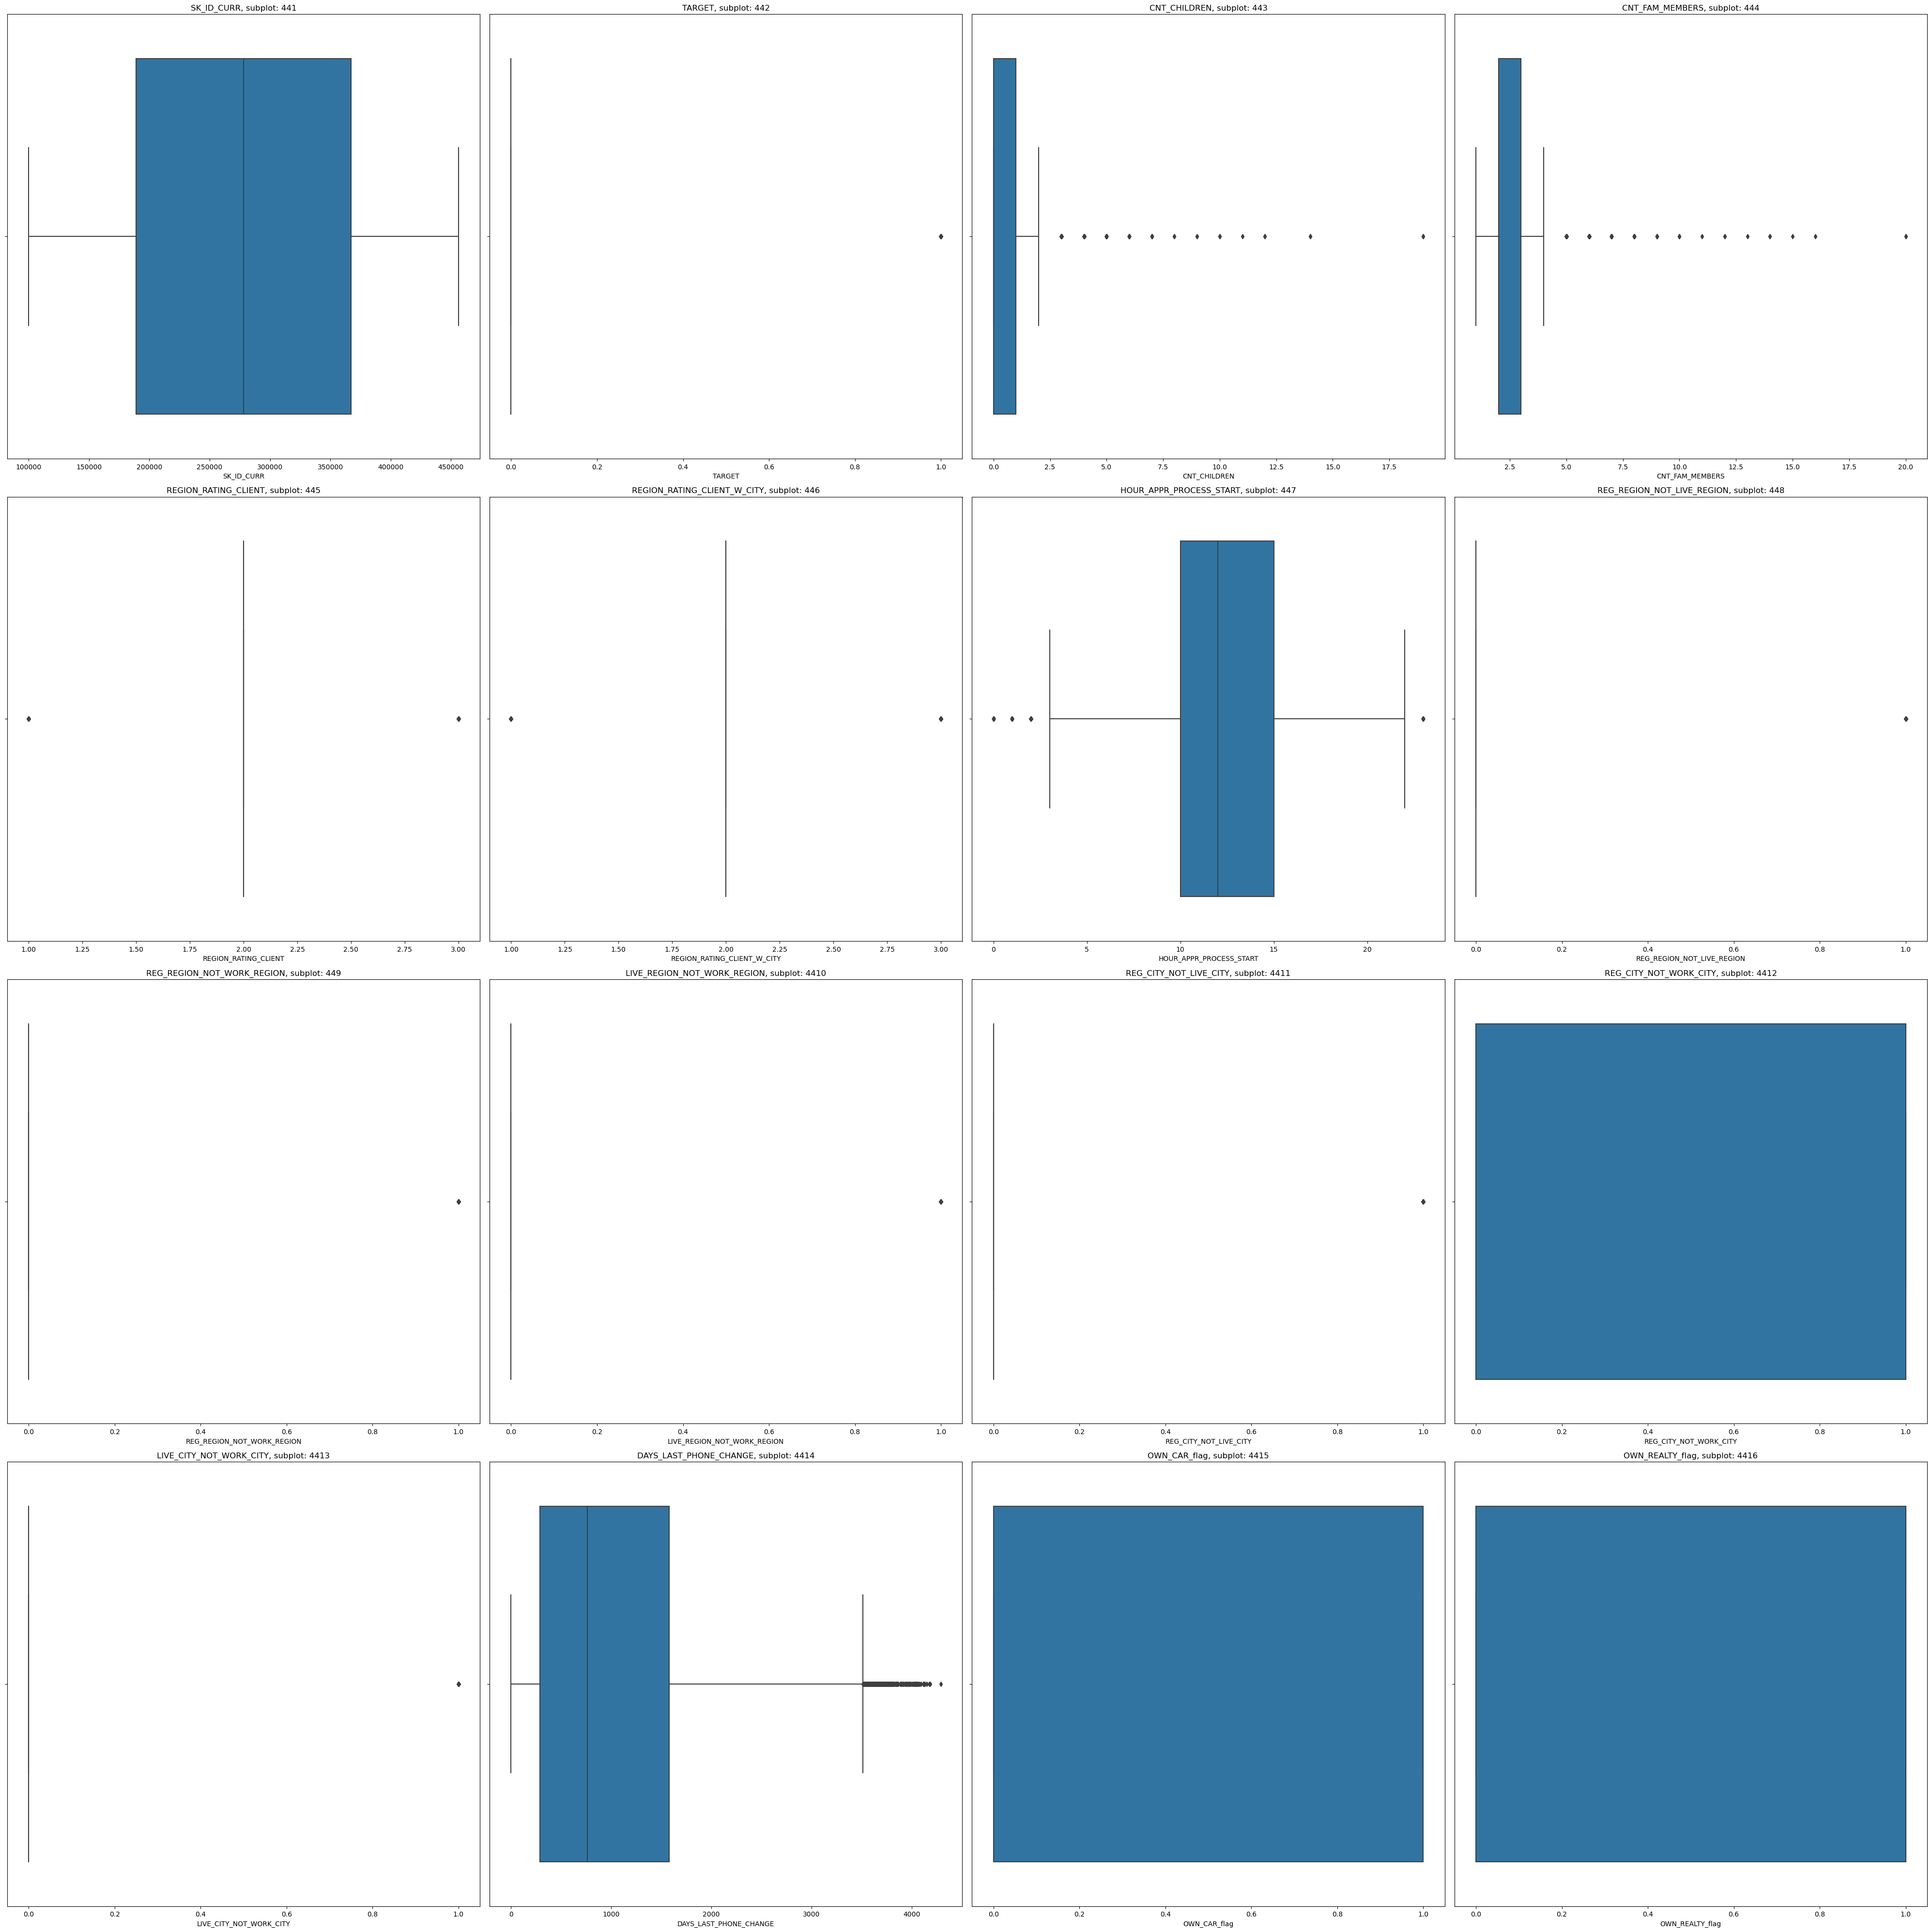

In [60]:
rows = 4
cols = 4
plot_counter = 1
fig = plt.figure(figsize=(40,40))
for i in app.columns:
    if app[i].dtypes=="int64" or app[i].dtypes=="int32" :
        plt.subplot(rows, cols, plot_counter)
        plt.title('{}, subplot: {}{}{}'.format(i, rows, cols, plot_counter))
        plt.xlabel(i)
        sns.boxplot(x = i,data = app)
        plot_counter = plot_counter + 1
fig.tight_layout()
plt.show()

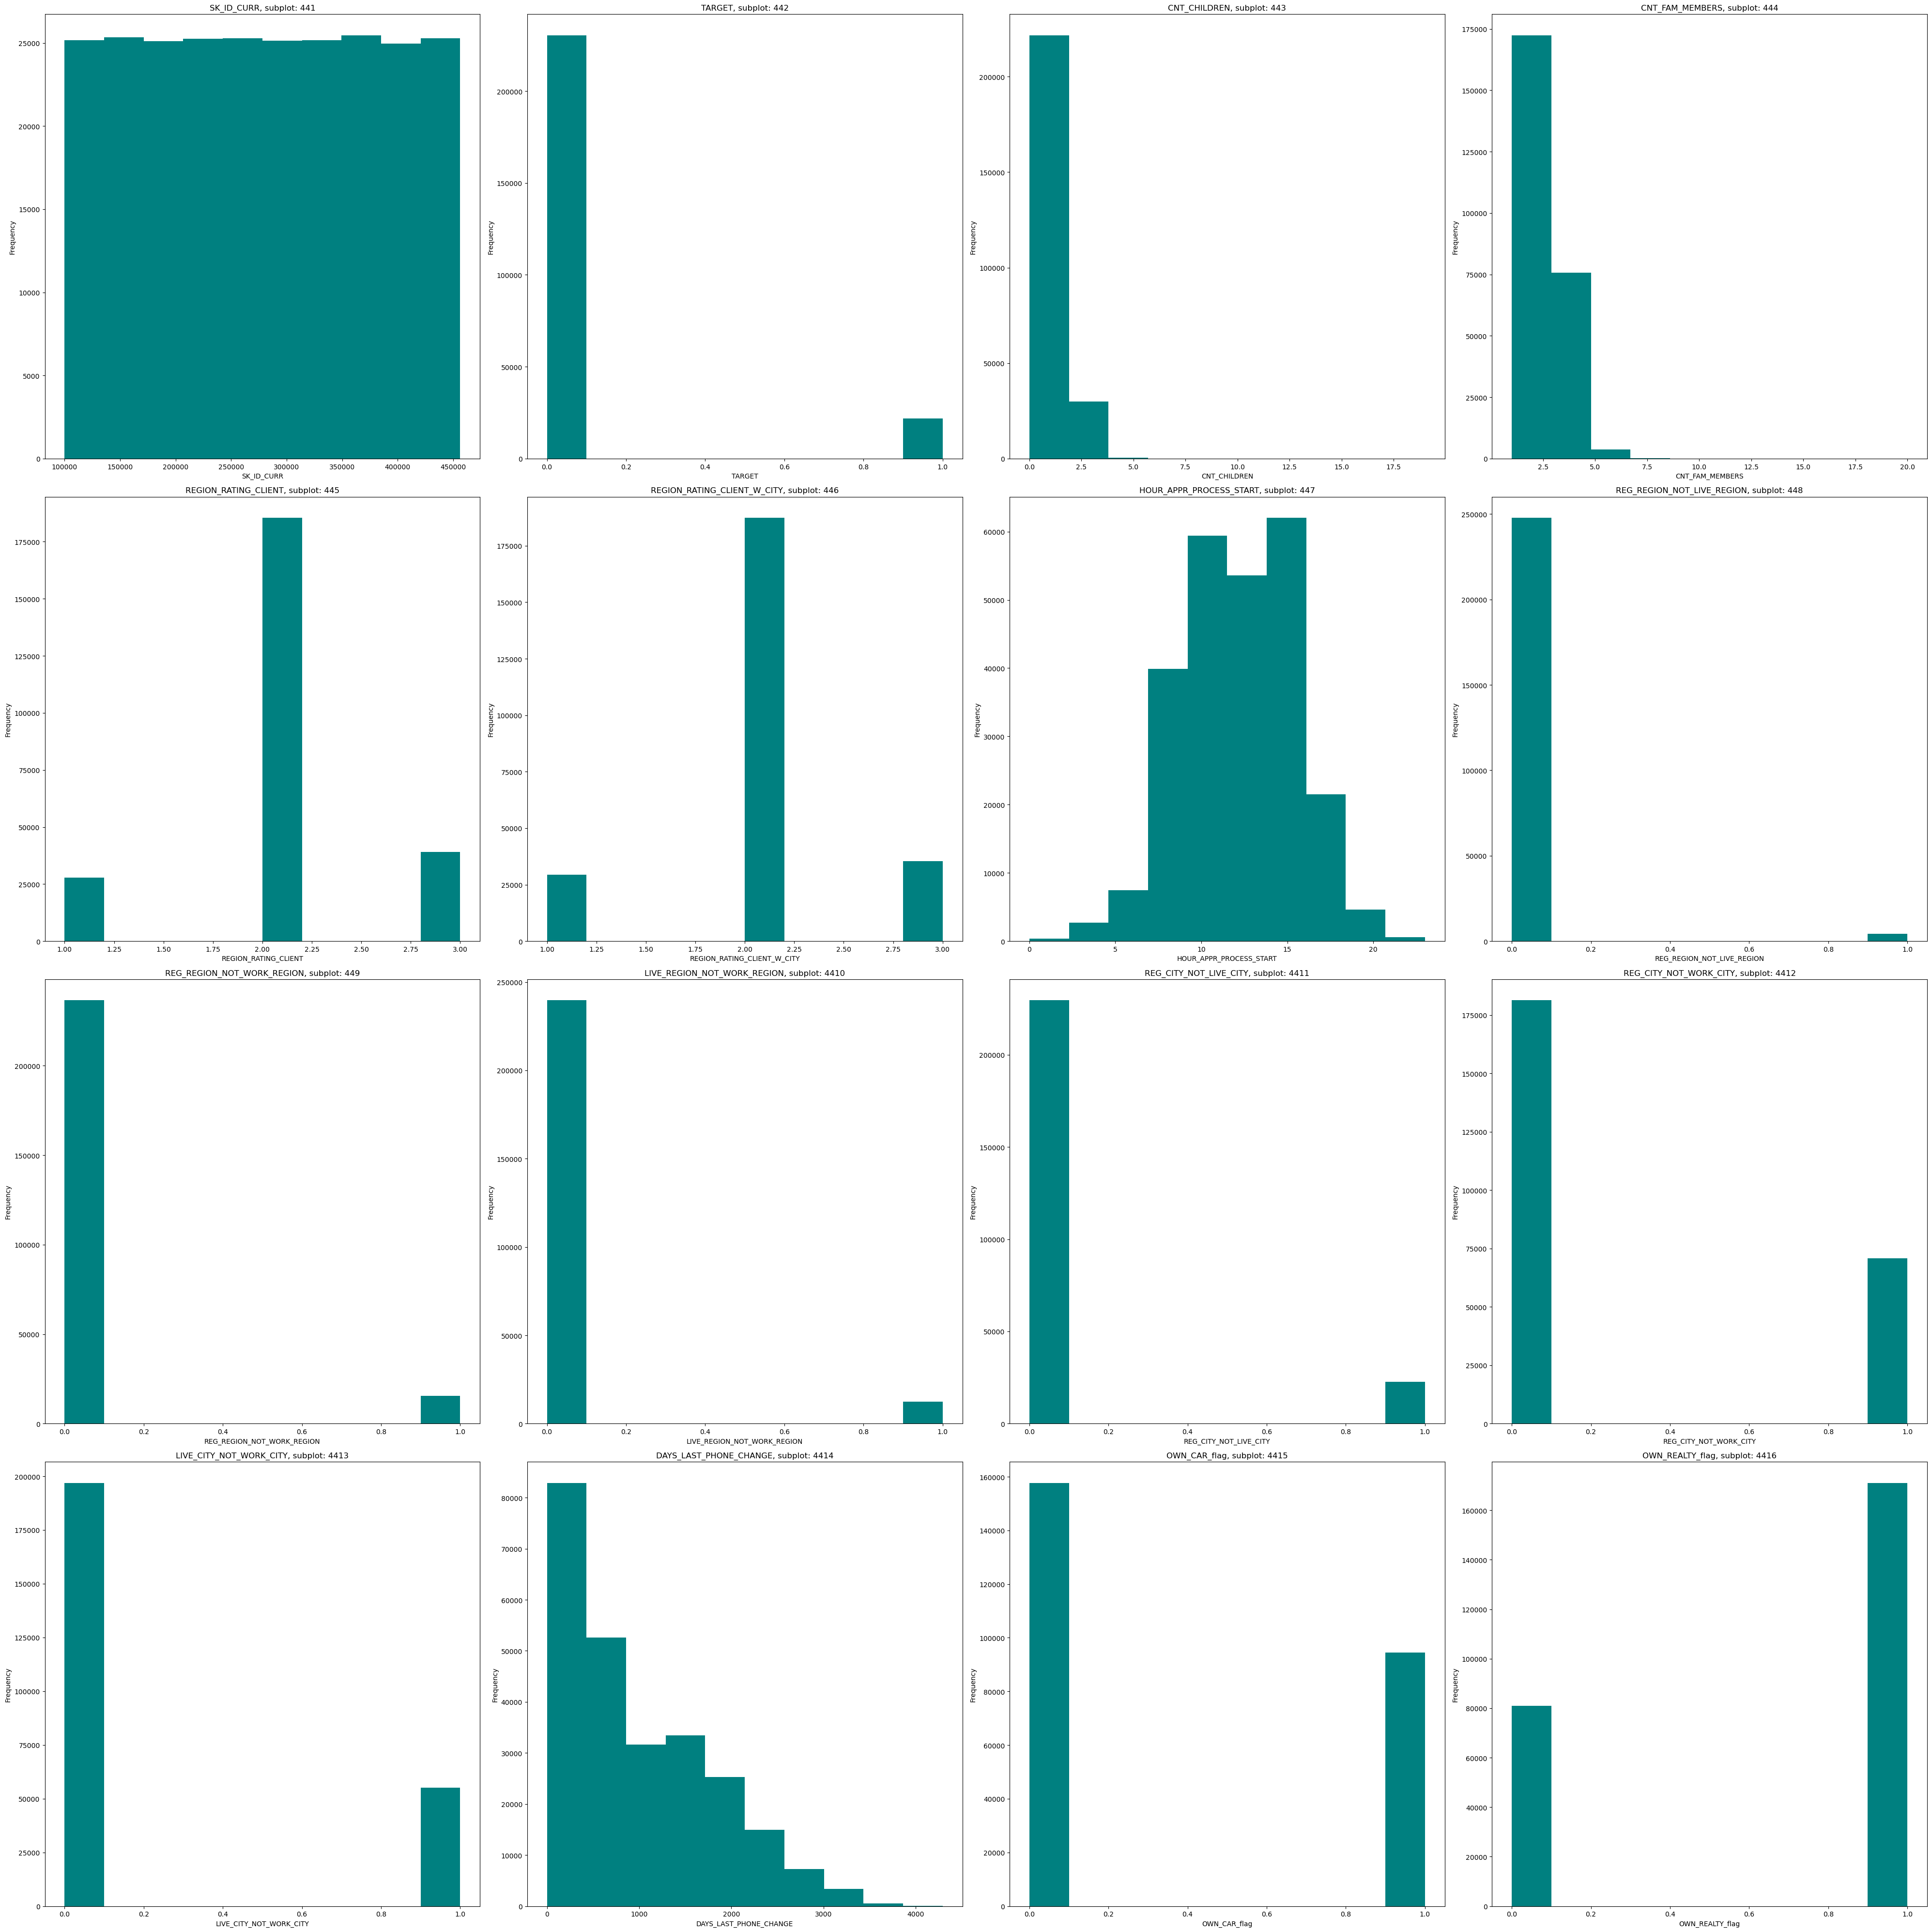

In [61]:
#box plot not providing enough clarity
#trying histplot for more clarity
rows = 4
cols = 4
plot_counter = 1
fig = plt.figure(figsize=(40,40))
for i in app.columns:
    if app[i].dtypes=="int64" or app[i].dtypes=="int32" :
        plt.subplot(rows, cols, plot_counter)
        plt.title('{}, subplot: {}{}{}'.format(i, rows, cols, plot_counter))
        plt.xlabel(i)
        app[i].plot.hist(color='teal')
        plot_counter = plot_counter + 1
fig.tight_layout()
plt.show()

Observations
1. Many columns are flag columns like REGION_POPULATION_RELATIVE,TARGET,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY
- Deciding to keep them as it is as they may be of significance later on.
2. CNT_FAM_MEMBERS and CNT_CHILDREN definitely has some outliers and will need to be rectified

In [62]:
print(app.CNT_CHILDREN.describe(),'\n')
print(app.CNT_CHILDREN.value_counts())
#Only 13 rows have childern more then 7,
#leaving this column the same since data seems to be genuinely high not any outlier

count    252136.000000
mean          0.498517
std           0.763162
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64 

0     161910
1      59698
2      26365
3       3629
4        414
5         81
6         19
7          7
8          2
9          2
12         2
10         2
19         2
14         2
11         1
Name: CNT_CHILDREN, dtype: int64


In [63]:
print(app.CNT_FAM_MEMBERS.describe(),'\n')
print(app.CNT_FAM_MEMBERS.value_counts())
#Only 19 rows have childern more then 8,
#leaving this column the same since data seems to be genuinely high not any outlier

count    252136.000000
mean          2.252522
std           0.942114
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64 

2     123331
3      51467
1      49049
4      24360
5       3417
6        396
7         78
8         19
9          6
10         3
14         2
12         2
20         2
13         1
15         1
16         1
11         1
Name: CNT_FAM_MEMBERS, dtype: int64


In [64]:
#using subplot for plotting the numerical(float) data to understand the spread and outliers(if any)

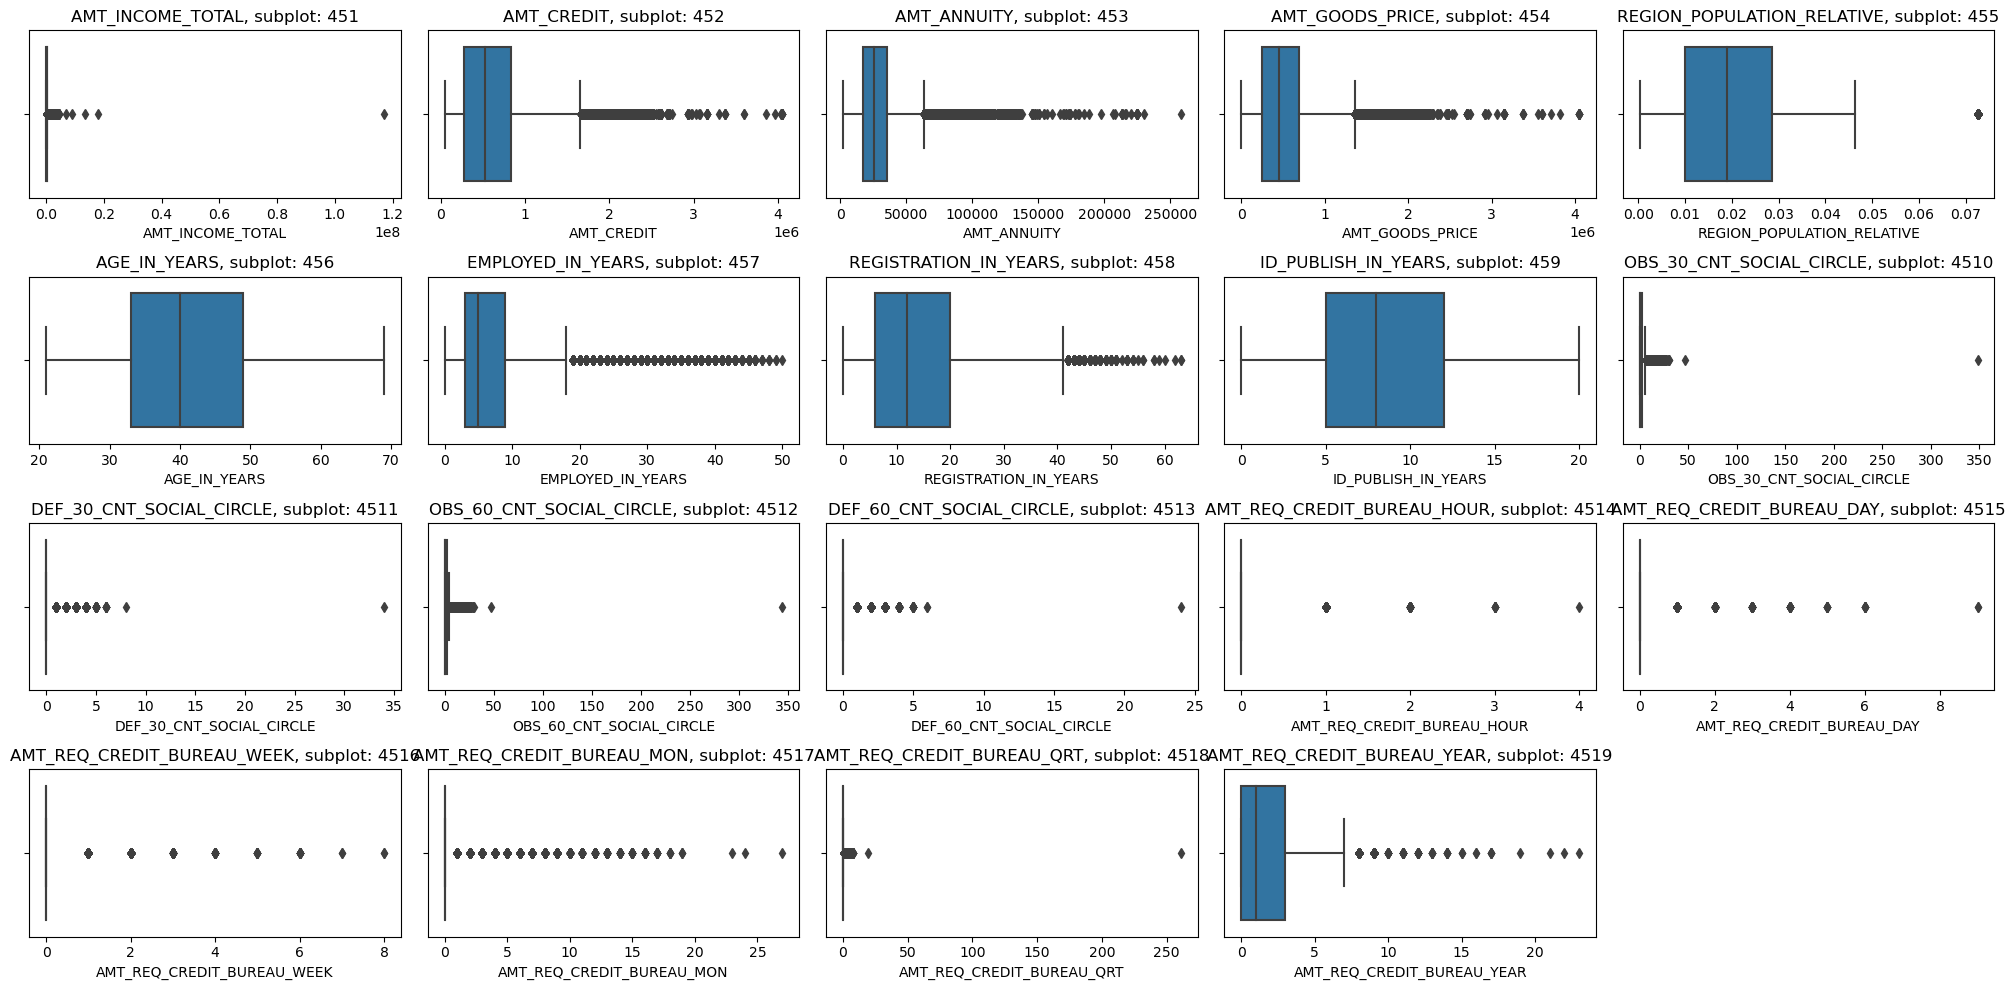

In [65]:
rows = 4
cols = 5
plot_counter = 1
fig = plt.figure(figsize=(20,10))
for i in app.columns:
    if app[i].dtypes=="float64" or app[i].dtypes=="float32" :
        plt.subplot(rows, cols, plot_counter)
        plt.title('{}, subplot: {}{}{}'.format(i, rows, cols, plot_counter))
        plt.xlabel(i)
        sns.boxplot(x =i,data = app)
        plot_counter = plot_counter + 1
fig.tight_layout()
plt.show()

Observations
1. Possible outliers present in
- AMT_INCOME_TOTAL
- AMT_CREDIT
- AMT_ANNUITY
- AMT_GOODS_PRICE
- EMPLOYED_IN_YEARS
- REGISTRATION_IN_YEARS
2. Data of following columns giving view of outliers but seems to be the factual data based on the column description.csv
- OBS_30_CNT_SOCIAL_CIRCLE
- DEF_30_CNT_SOCIAL_CIRCLE
- OBS_60_CNT_SOCIAL_CIRCLE
- DEF_60_CNT_SOCIAL_CIRCLE
- AMT_REQ_CREDIT_BUREAU_HOUR
- AMT_REQ_CREDIT_BUREAU_DAY
- AMT_REQ_CREDIT_BUREAU_WEEK
- AMT_REQ_CREDIT_BUREAU_MON
- AMT_REQ_CREDIT_BUREAU_QRT
- AMT_REQ_CREDIT_BUREAU_YEAR

In [66]:
#Checking the Outliers
out_list=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','EMPLOYED_IN_YEARS','REGISTRATION_IN_YEARS']
for i in out_list:
    print(i)
    print("STATS")
    print(app[i].describe(),'\n')
    print("VALUE_COUNTS")
    print(app[i].value_counts( dropna=False, normalize=True),'\n\n')
    
#the below information suggest the case of genuinly high cases rather than outliers
#deciding to not capping the outliers and leaving the data at it is

AMT_INCOME_TOTAL
STATS
count    2.521360e+05
mean     1.759143e+05
std      2.588521e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64 

VALUE_COUNTS
135000.0    0.119800
112500.0    0.099791
157500.0    0.090166
180000.0    0.086481
225000.0    0.073214
              ...   
117324.0    0.000004
64584.0     0.000004
142897.5    0.000004
109170.0    0.000004
440100.0    0.000004
Name: AMT_INCOME_TOTAL, Length: 2266, dtype: float64 


AMT_CREDIT
STATS
count    2.521360e+05
mean     6.113998e+05
std      4.065275e+05
min      4.500000e+04
25%      2.779695e+05
50%      5.212800e+05
75%      8.292240e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64 

VALUE_COUNTS
450000.0     0.034759
675000.0     0.028195
180000.0     0.027168
270000.0     0.026176
225000.0     0.025359
               ...   
1006888.5    0.000004
1689736.5    0.000004
296671.5     0.000004
495486.0     0.000004

In [67]:
# Dividing the dataset into two dataset based on the TARGET VARIABLE
target0=app.loc[app["TARGET"]==0]
target1=app.loc[app["TARGET"]==1]

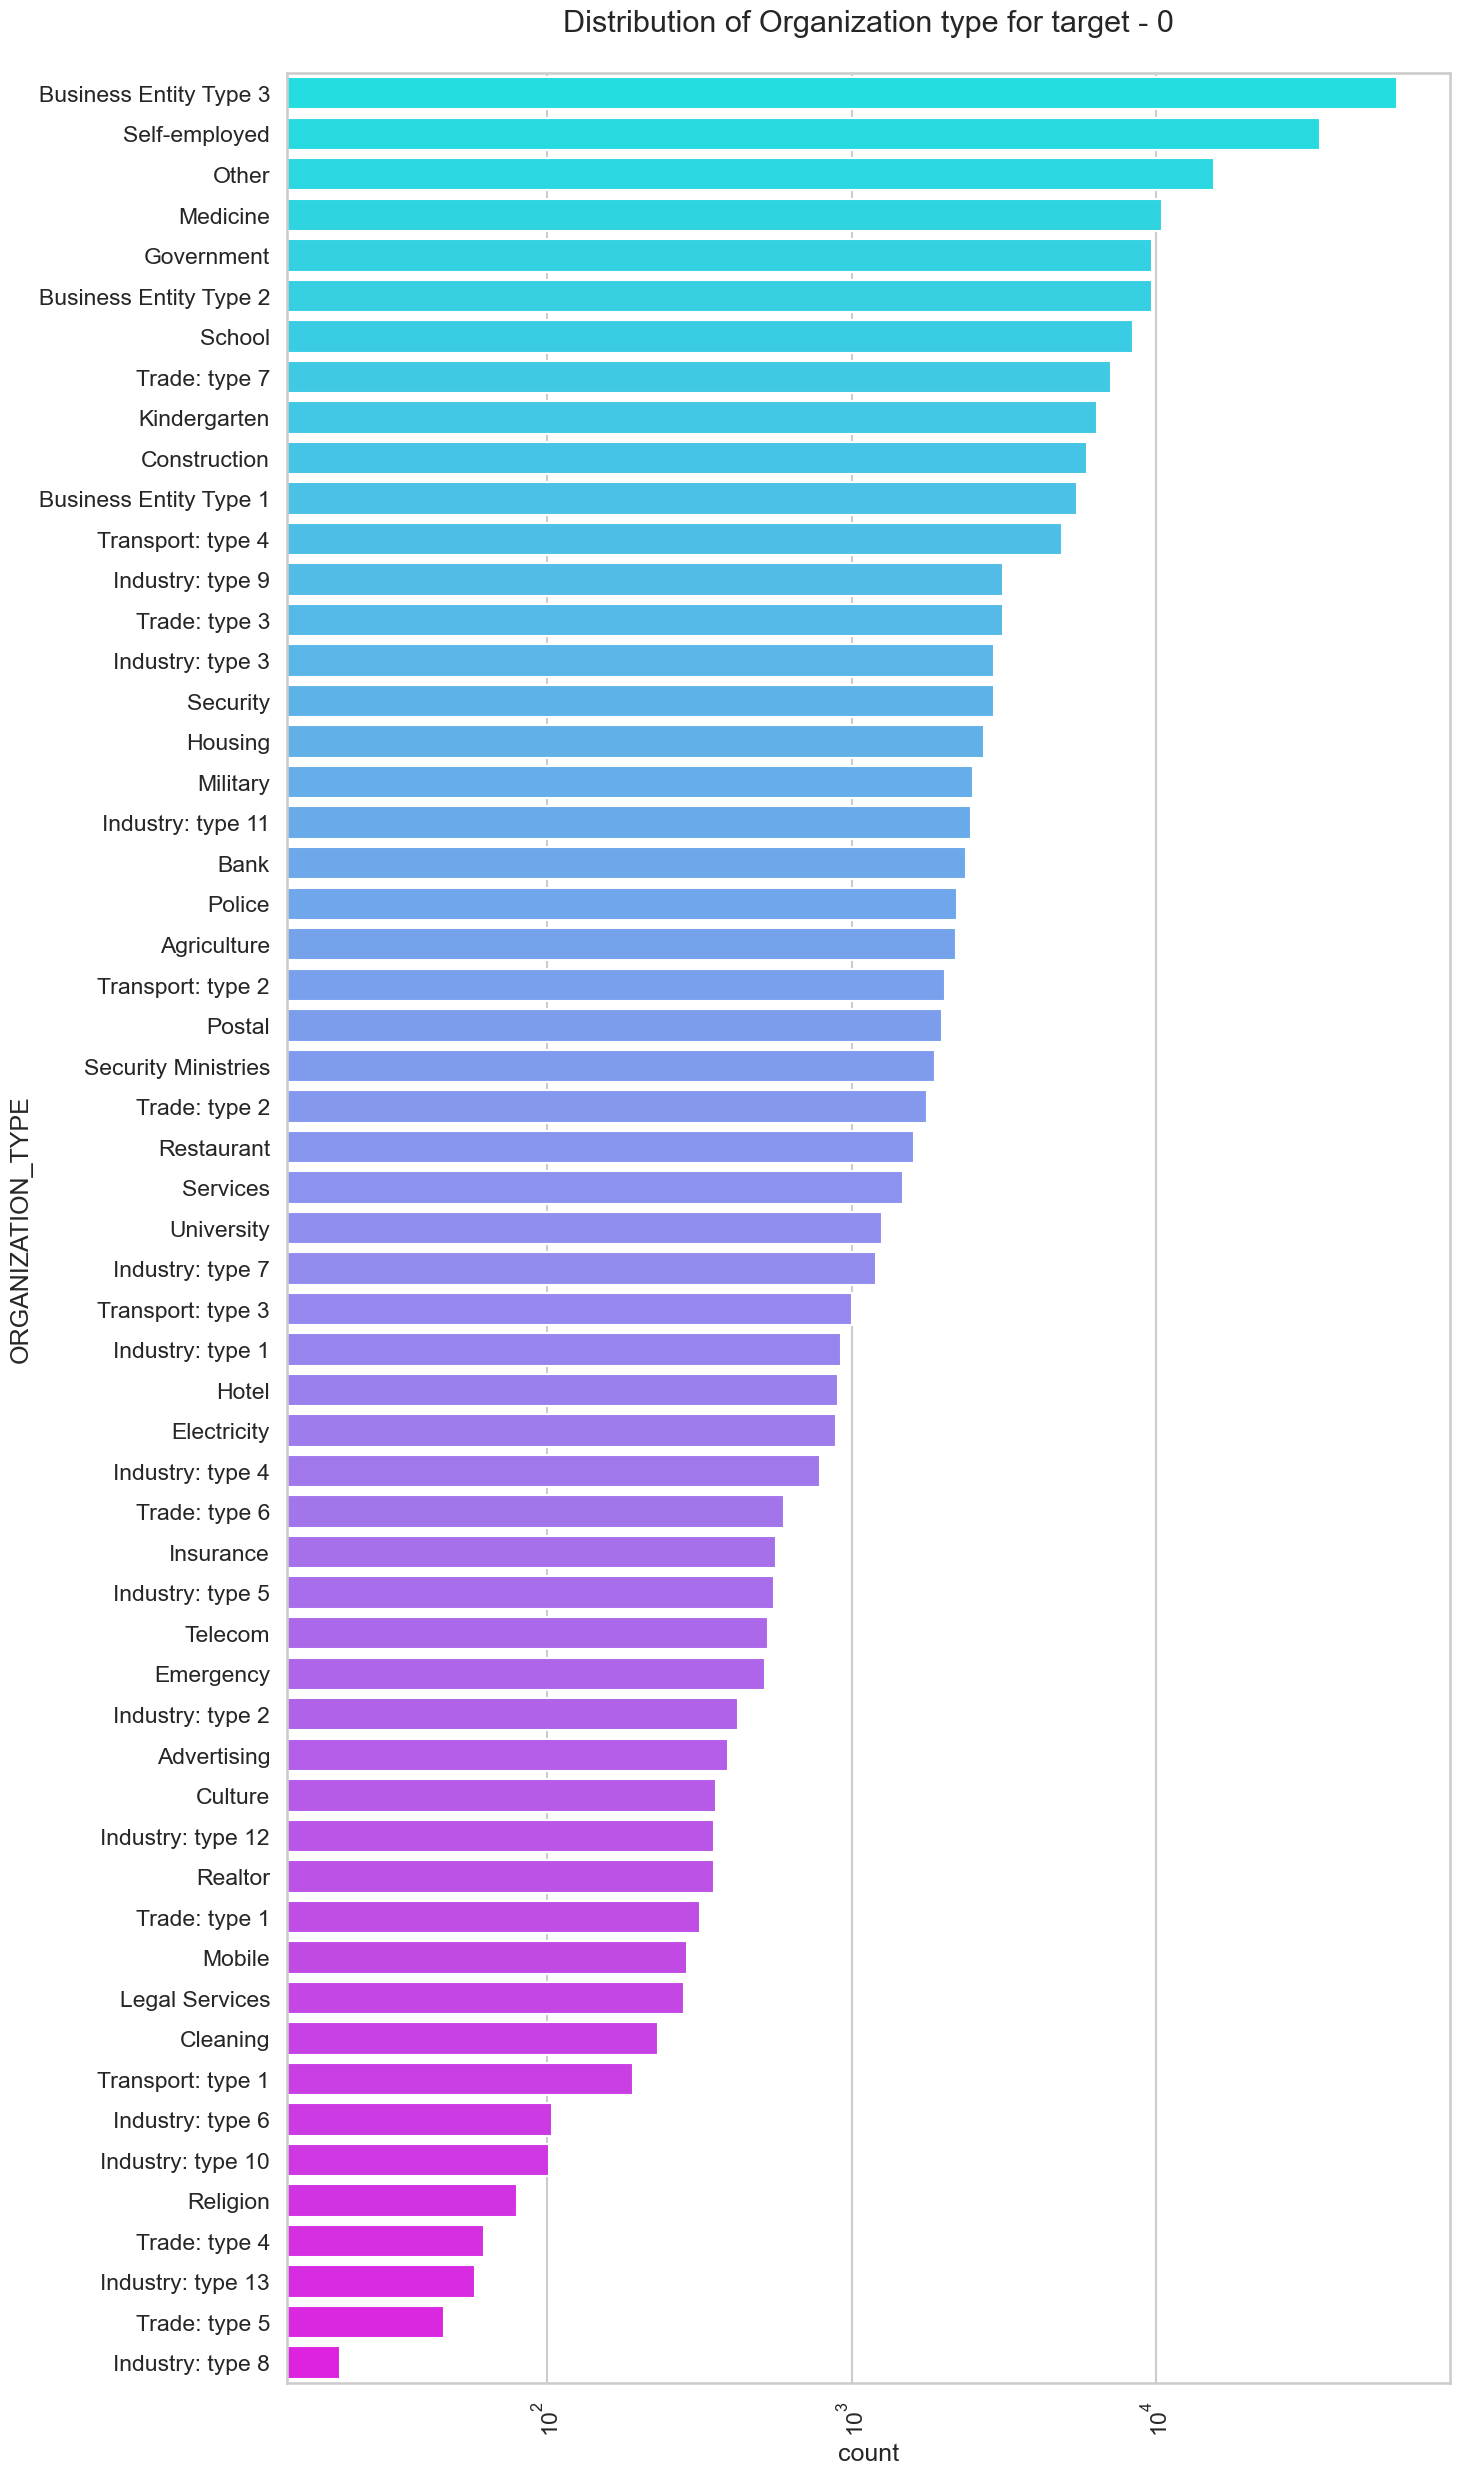

In [68]:
# Plotting for Organization type in logarithmic scale for Target 0
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.title("Distribution of Organization type for target - 0")
plt.xticks(rotation=90)
plt.xscale('log')
sns.countplot(data=target0,y='ORGANIZATION_TYPE',order=target0['ORGANIZATION_TYPE'].value_counts().index,palette='cool')
plt.show()

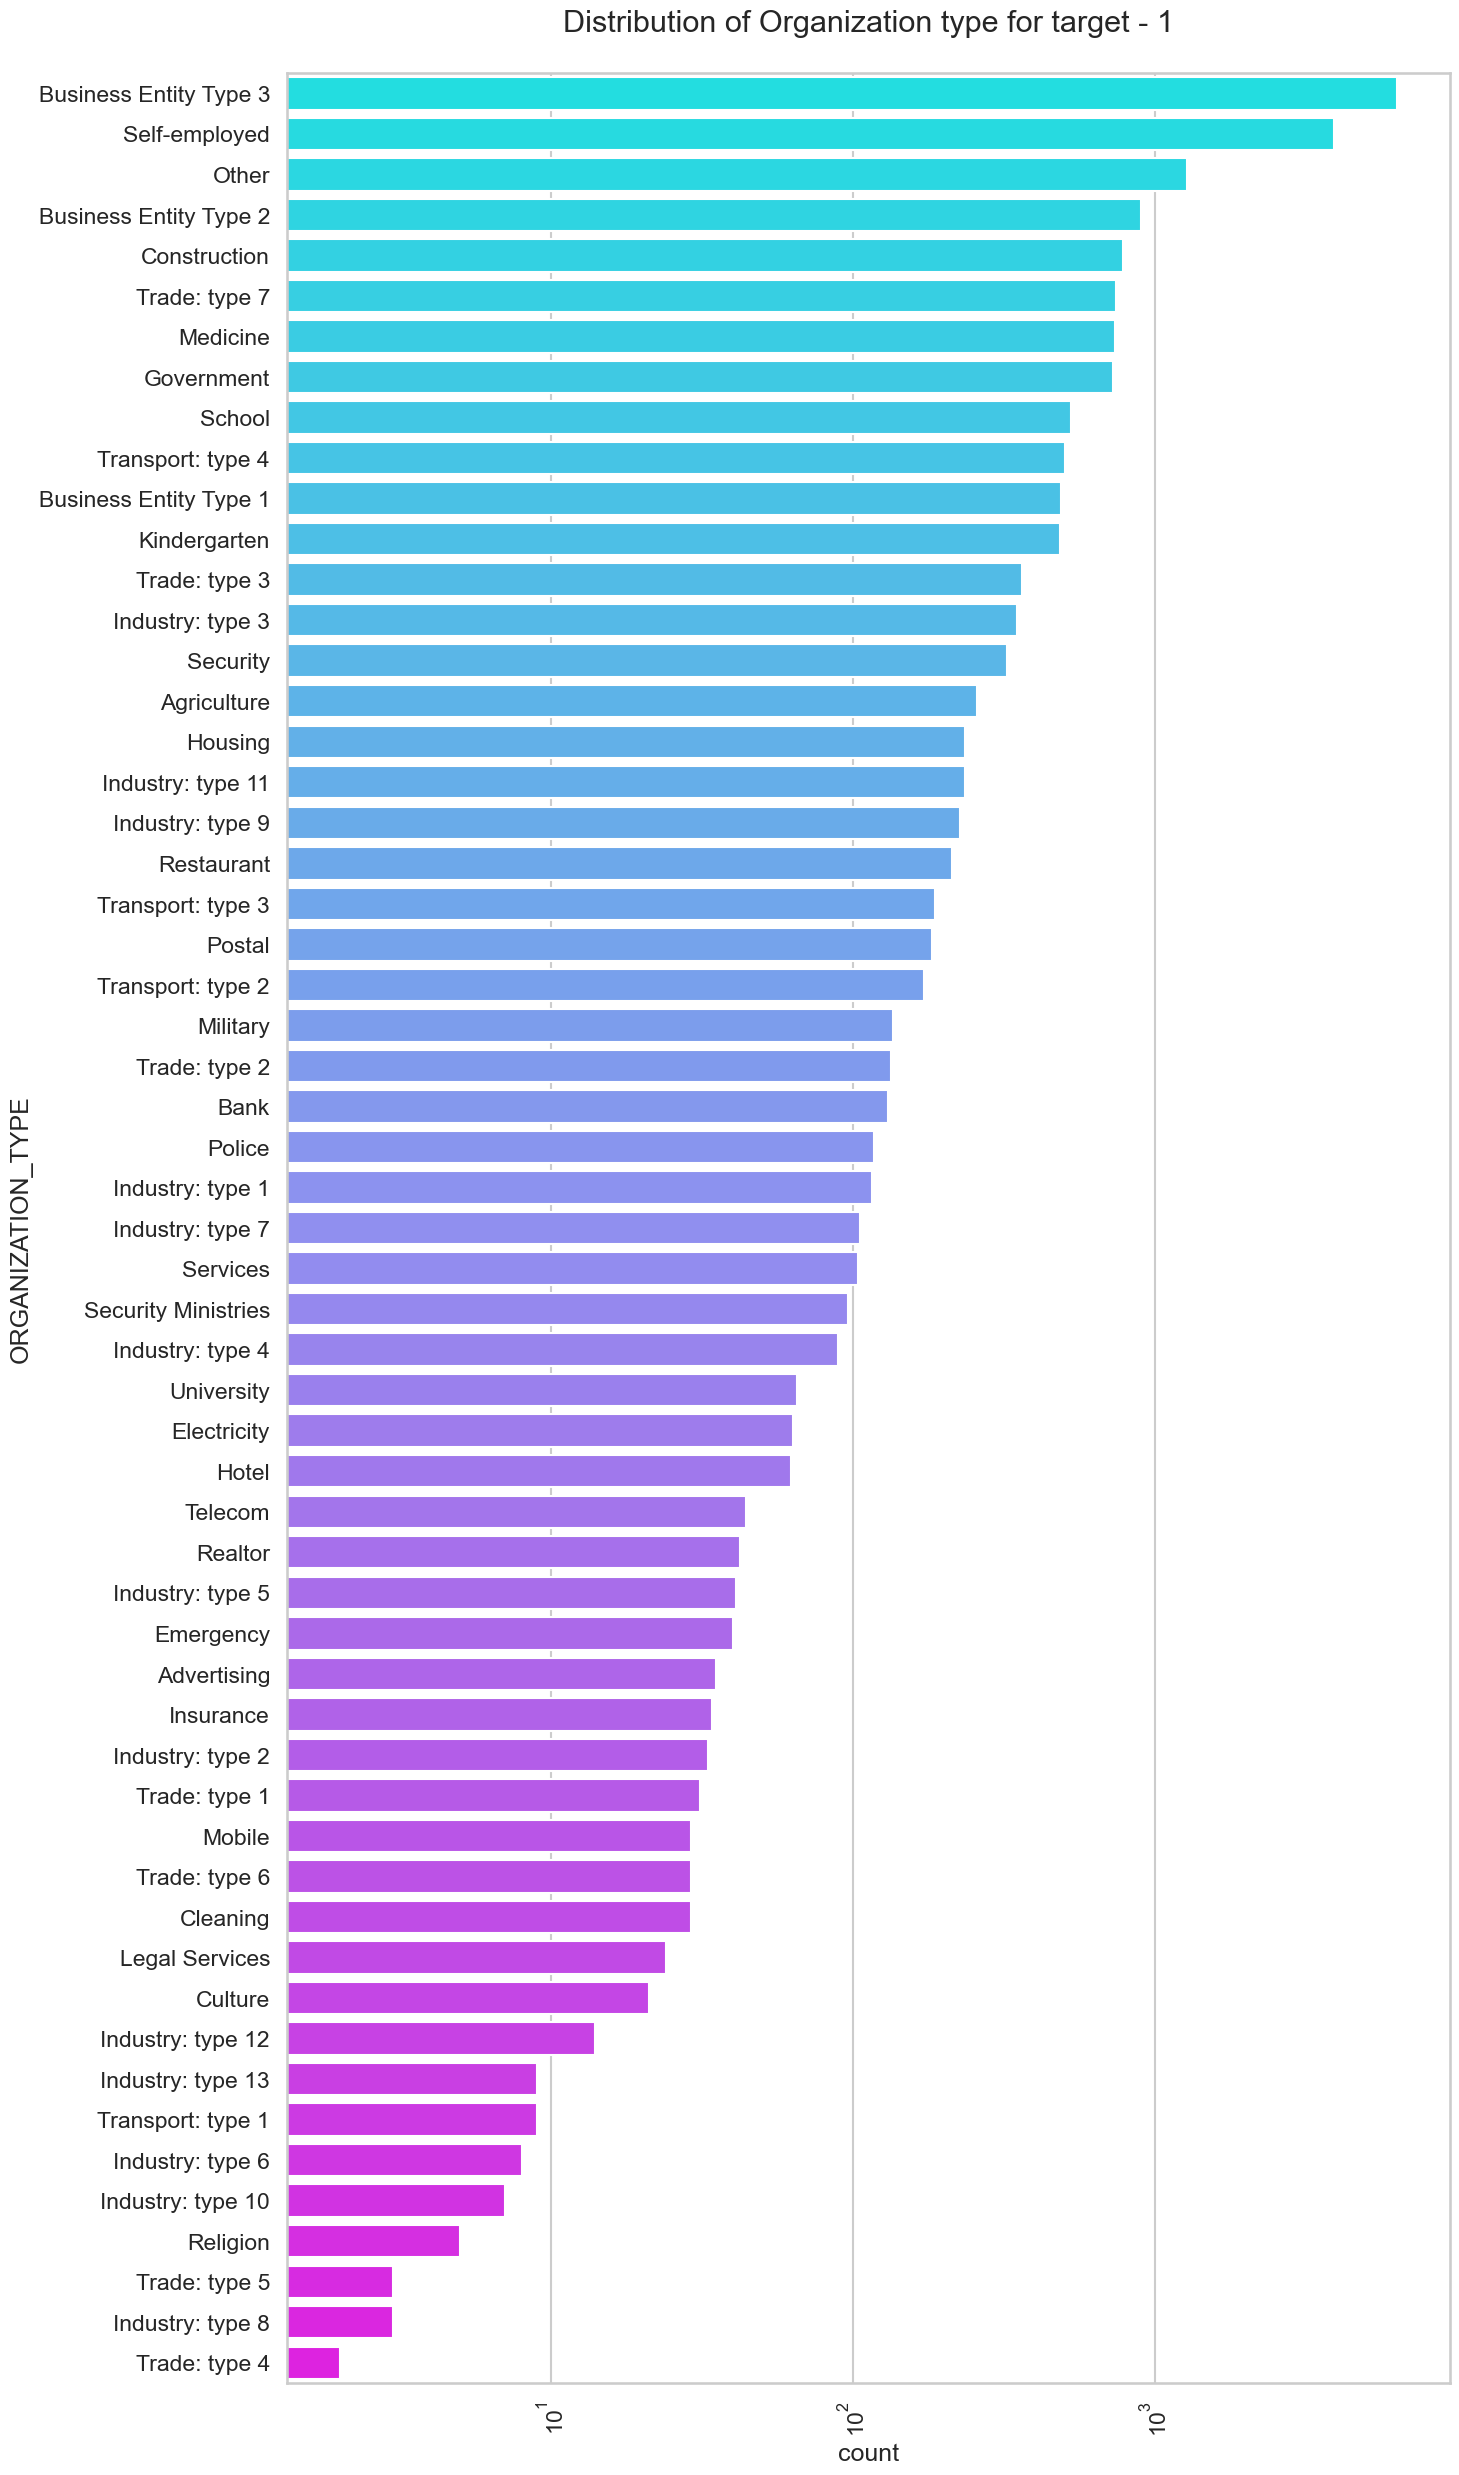

In [69]:
 # Plotting for Organization type in logarithmic scale for Target 1
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.title("Distribution of Organization type for target - 1")
plt.xticks(rotation=90)
plt.xscale('log')
sns.countplot(data=target1,y='ORGANIZATION_TYPE',order=target1['ORGANIZATION_TYPE'].value_counts().index,palette='cool')
plt.show()

#### Observation
Did not found any such concrete relation between the loan repayment and organization type

In [70]:
#Defining a function for plotting of graphs to avoid repatitve coding
def uniplot(df,col,title,hue =None):
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=0)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='magma') 
    plt.show()

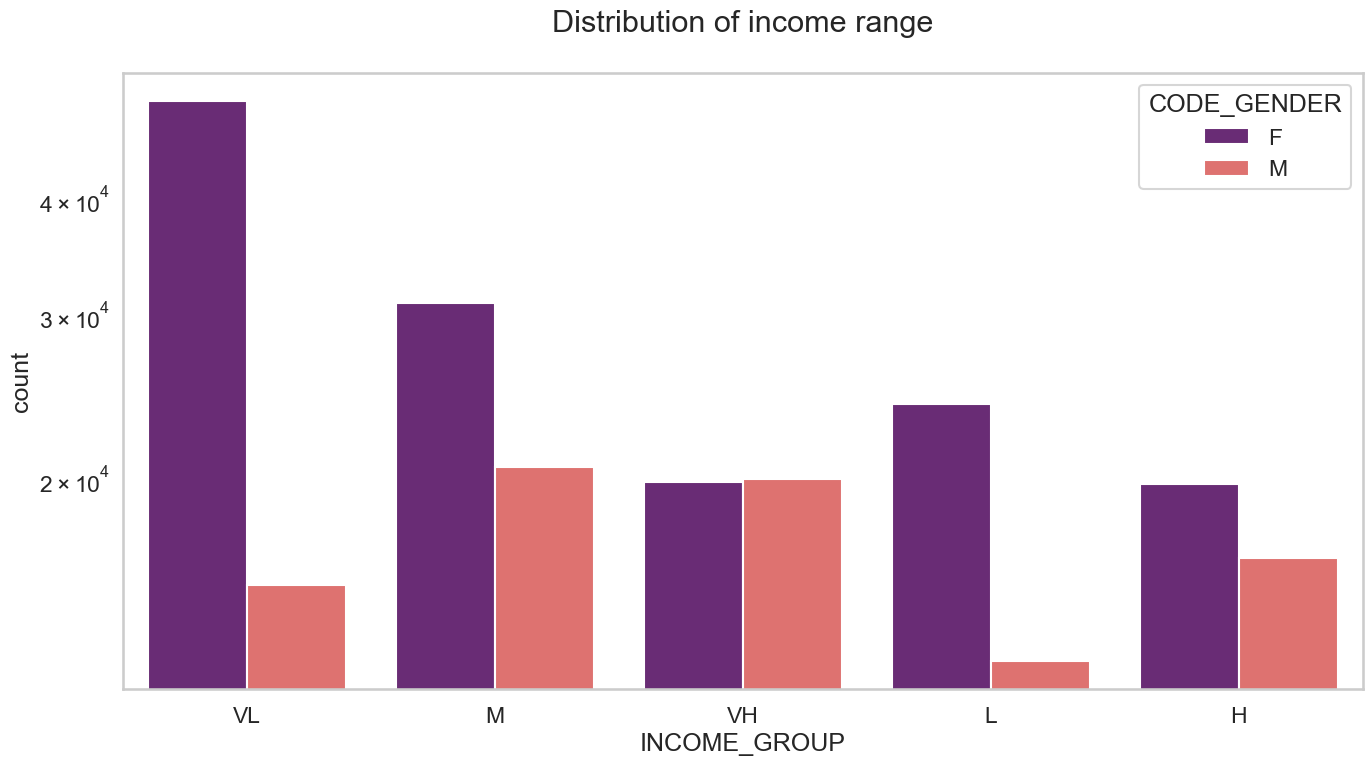

In [71]:
#Plotting the income range for target 0
uniplot(target0,col='INCOME_GROUP',title='Distribution of income range',hue='CODE_GENDER')

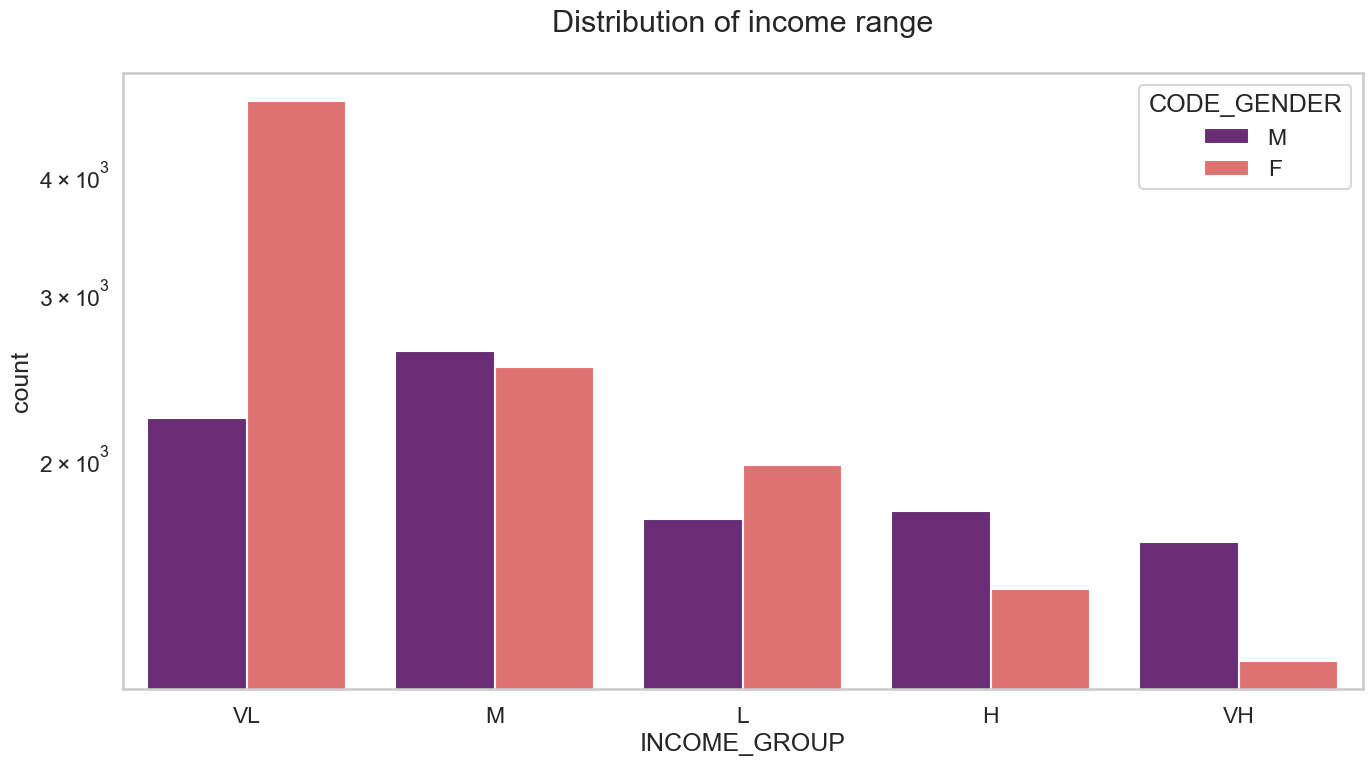

In [72]:
#Plotting the income range for target 0
uniplot(target1,col='INCOME_GROUP',title='Distribution of income range',hue='CODE_GENDER')

#### Observations 
- Female counts are higher in both the cases
- specific to target 1 can see that VL income group people(females specific) face difficulties in loan repayment more often

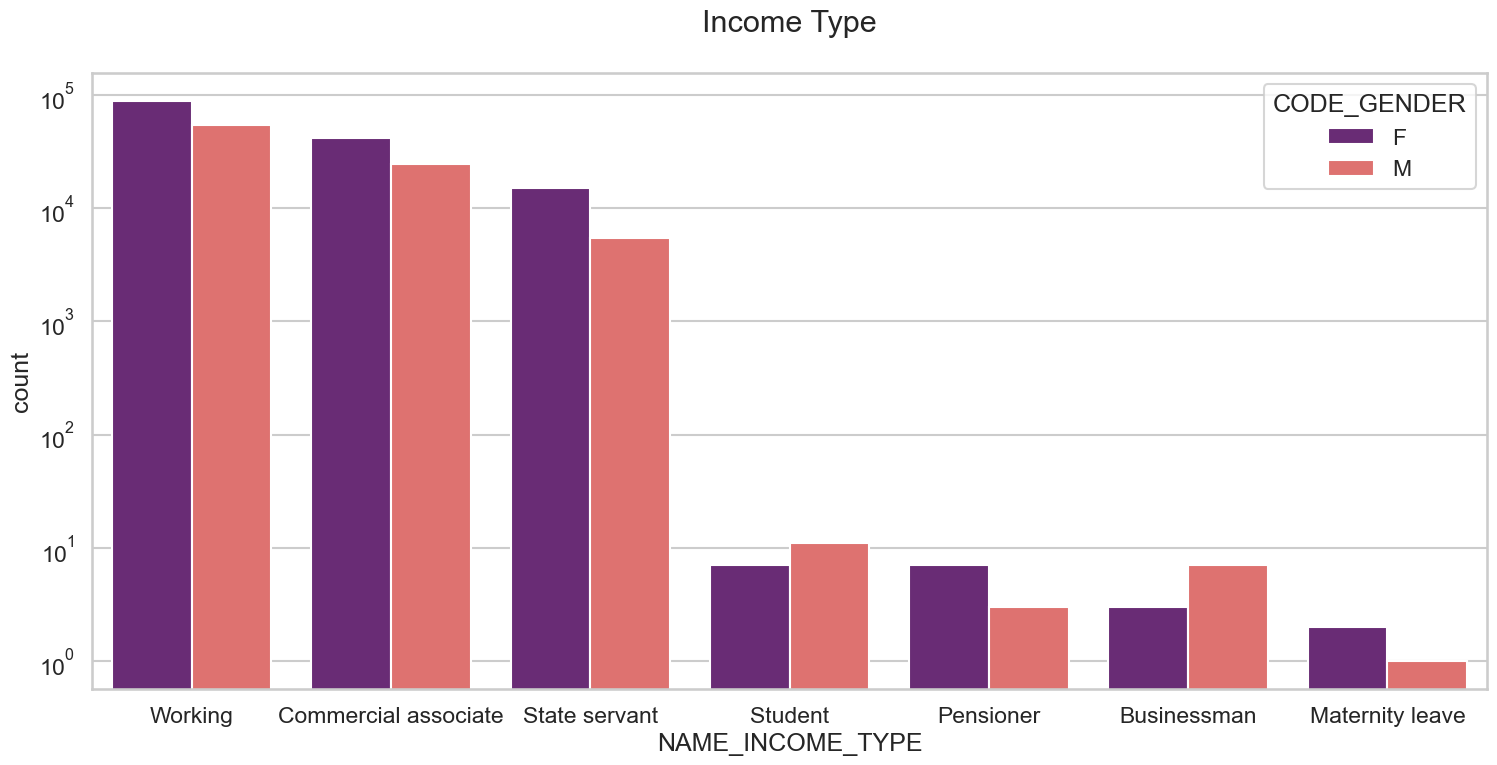

In [73]:
#Plotting for income type of target 0
uniplot(target0,col='NAME_INCOME_TYPE',title='Income Type',hue='CODE_GENDER')

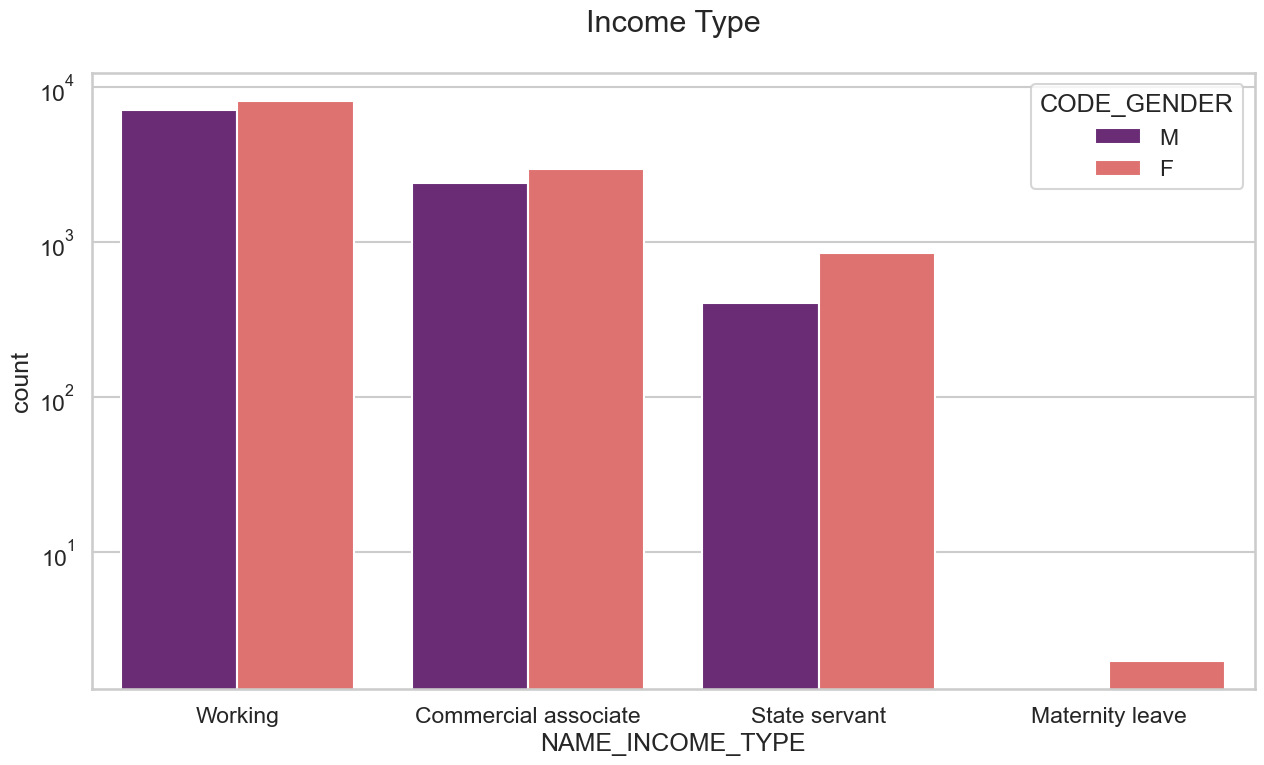

In [74]:
#Plotting for income type of target 1
uniplot(target1,col='NAME_INCOME_TYPE',title='Income Type',hue='CODE_GENDER')

#### Observations 
- Students pensioners and businessmen are more likely to repay the loan without any difficulties

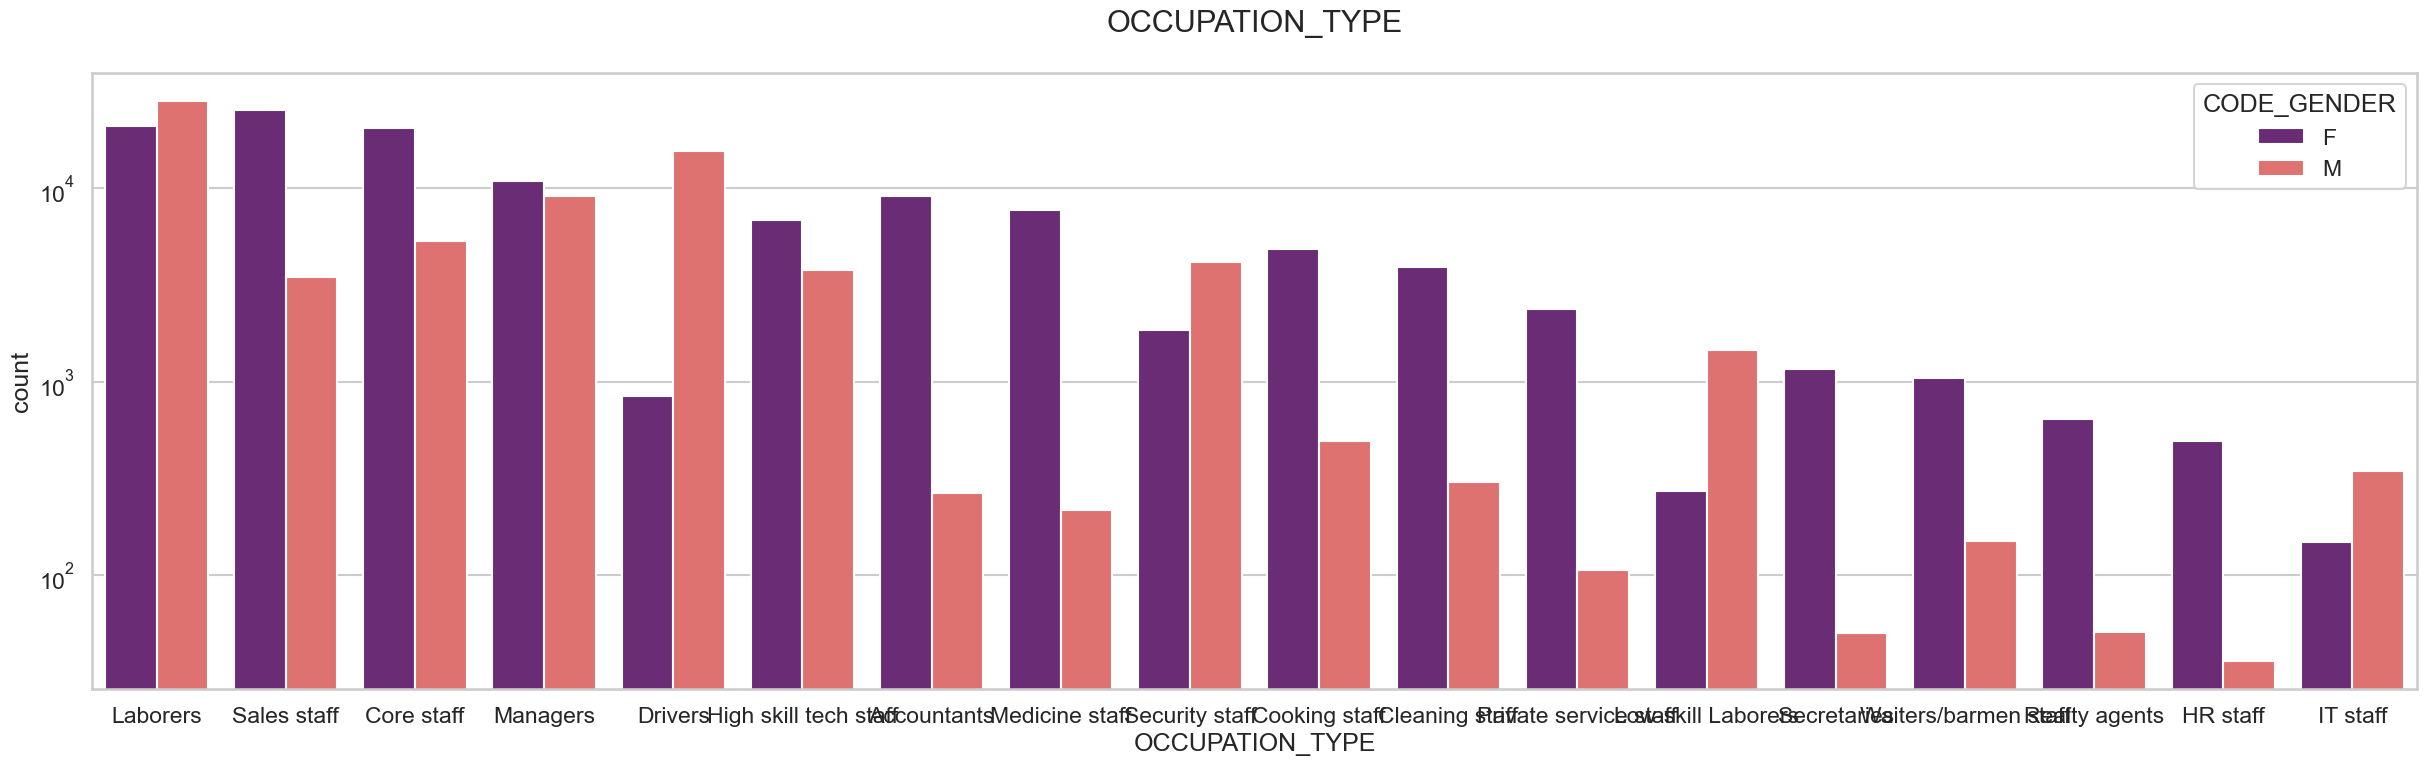

In [75]:
#Plotting to understand the occupation type of target 0 and 1
uniplot(target0,col='OCCUPATION_TYPE',title='OCCUPATION_TYPE',hue='CODE_GENDER')

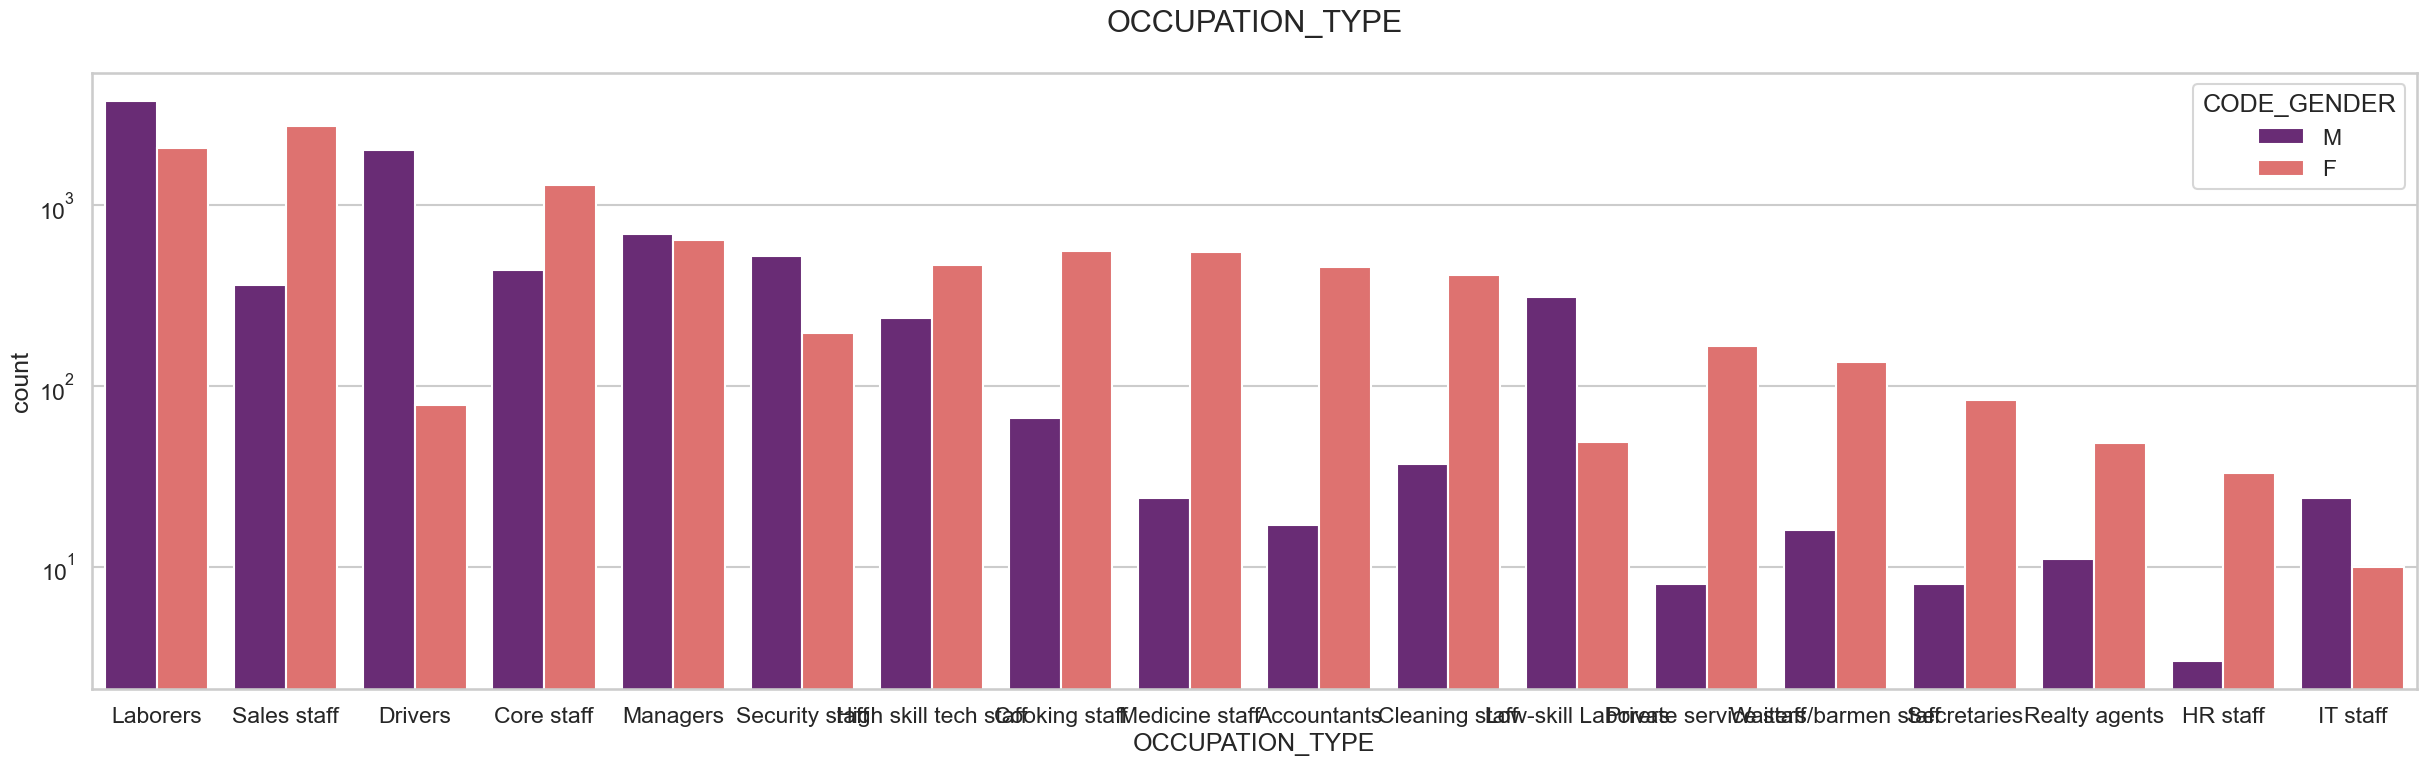

In [76]:
uniplot(target1,col='OCCUPATION_TYPE',title='OCCUPATION_TYPE',hue='CODE_GENDER')

#### Observations
- Don't see much of a difference between the occupation type of target 0 and 1

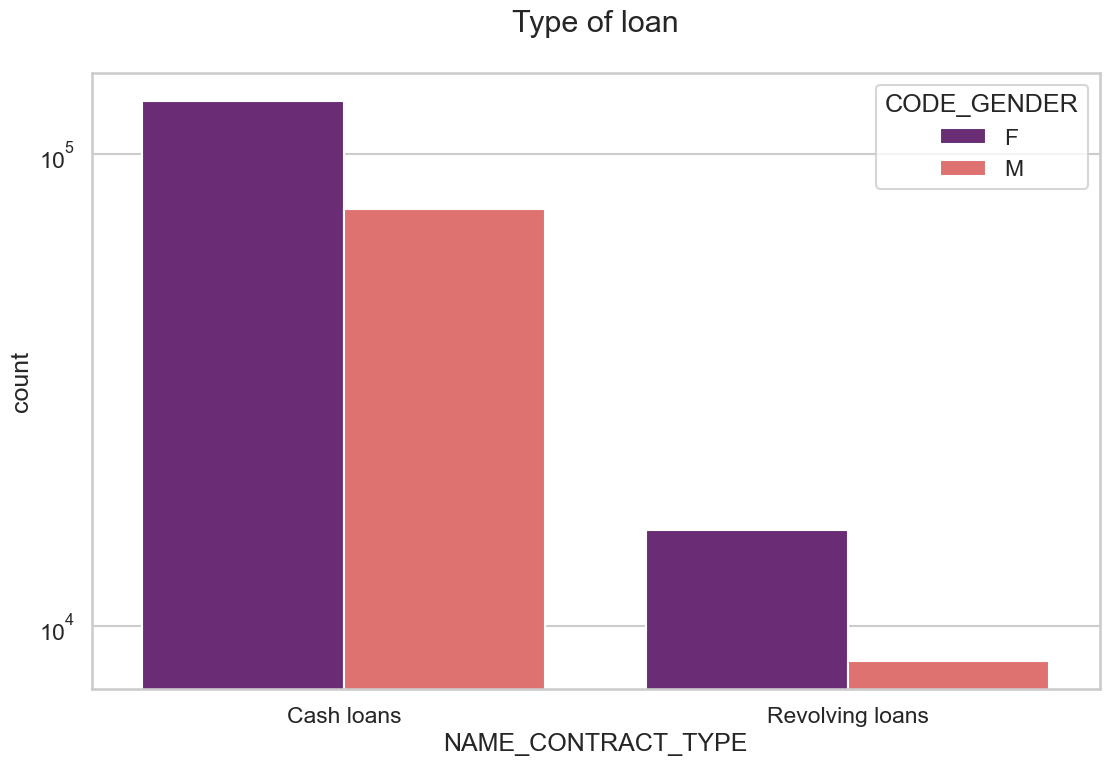

In [77]:
#Plotting against type of loan for both the targets
uniplot(target0,col='NAME_CONTRACT_TYPE',title='Type of loan',hue='CODE_GENDER')

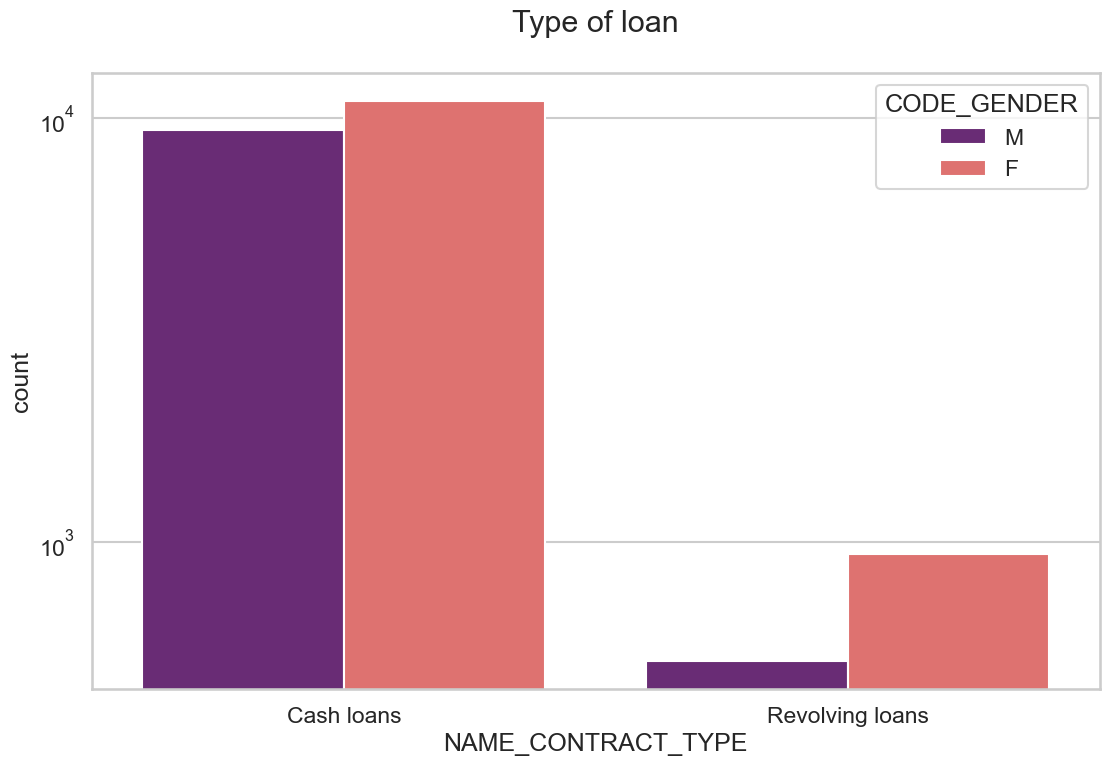

In [78]:
uniplot(target1,col='NAME_CONTRACT_TYPE',title='Type of loan',hue='CODE_GENDER')

#### Observations
- For both the targets it seems that cash loans are more preferred
- It does however suggest that the females with revolving loan are more likely to default as compared to males

In [79]:
#segregating the columns to a list with the names as categorical nominal , numerical and categorical oridnal variables. This is being done to make codes lesser repeatitive
objvarList=[]
numvarList=[]
for i in app.columns:
    if app[i].dtypes=="object":
        objvarList.append(i)
    else:
        numvarList.append(i)

catvarList=[]
for i in numvarList:
    if len(app[i].unique())<4:
        app[i].astype("category")
        catvarList.append(i)    

In [80]:
for i in catvarList:
    numvarList.remove(i)

print("Numercial Columns :", numvarList) 
print("\n")

print("obj Columns :", objvarList) 
print("\n")

print("cat Columns :", catvarList) 

Numercial Columns : ['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'AGE_IN_YEARS', 'EMPLOYED_IN_YEARS', 'REGISTRATION_IN_YEARS', 'ID_PUBLISH_IN_YEARS', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE_GROUP', 'INCOME_GROUP']


obj Columns : ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


cat Columns : ['TARGET', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE

In [81]:
# Removing income group and age group as these have binned data. Code_gender and Target are ordinal and hence move to differnt list
numvarList.remove('INCOME_GROUP')
numvarList.remove('AGE_GROUP')
numvarList.remove('SK_ID_CURR')
objvarList.remove('CODE_GENDER')

catvarList.append('CODE_GENDER')

catvarList.remove('TARGET')

print("Numercial Columns :", numvarList) 
print("\n")

print("obj Columns :", objvarList) 
print("\n")

print("cat Columns :", catvarList) 

Numercial Columns : ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'AGE_IN_YEARS', 'EMPLOYED_IN_YEARS', 'REGISTRATION_IN_YEARS', 'ID_PUBLISH_IN_YEARS', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


obj Columns : ['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


cat Columns : ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WO

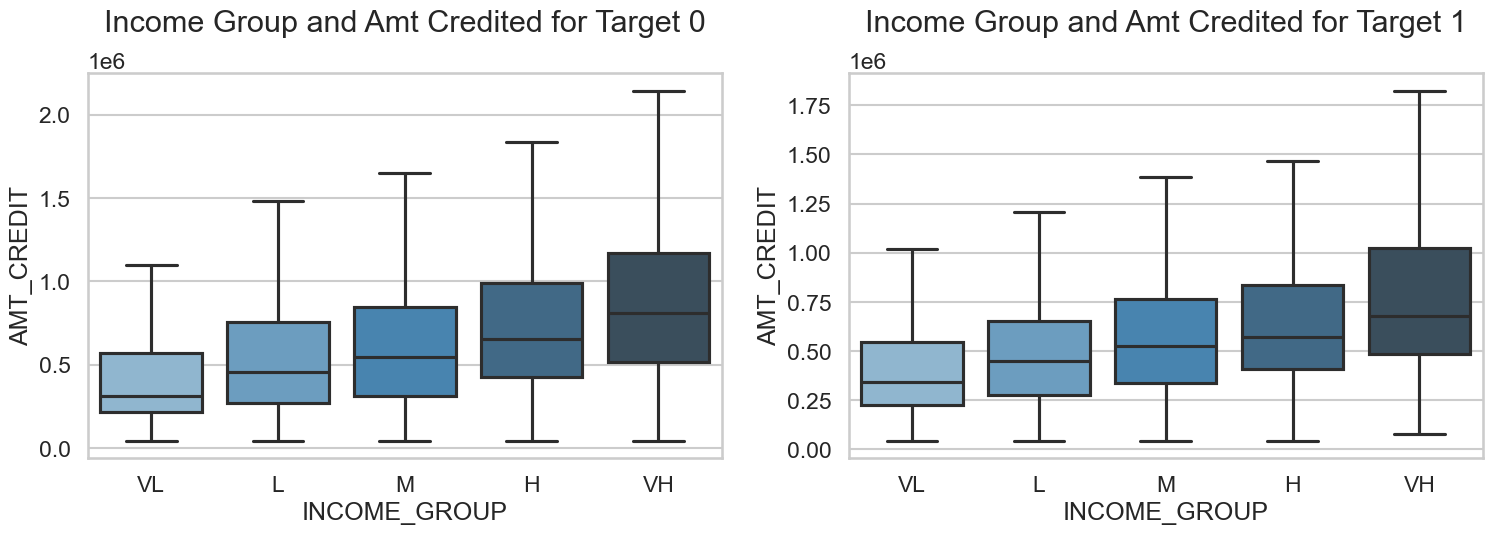

In [82]:
## Checking INCOME_GROUP vs AMT_CREDIT for both data frames

plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
plt.title("Income Group and Amt Credited for Target 0")
sns.boxplot(x = 'INCOME_GROUP', y = 'AMT_CREDIT', data =target0, showfliers=False, palette="Blues_d")

plt.subplot(1,2,2)
plt.title("Income Group and Amt Credited for Target 1")
sns.boxplot(x = 'INCOME_GROUP', y = 'AMT_CREDIT', data = target1, showfliers=False, palette="Blues_d")
plt.show()

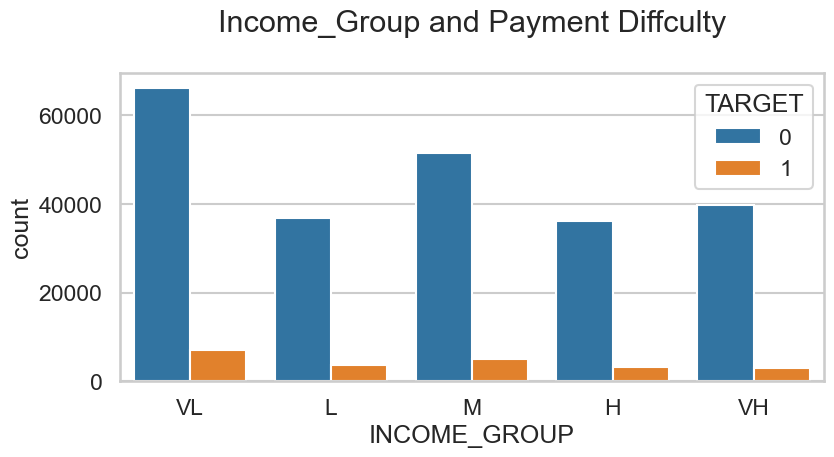

In [83]:
#Checking the same columns to see the affect of Very High Income group
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("Income_Group and Payment Diffculty")
sns.countplot(x = 'INCOME_GROUP', hue = 'TARGET', data =app)
plt.show()

In [84]:
#Checking absolute values
res=pd.pivot_table(data=app, index='INCOME_GROUP',columns='TARGET',values='AMT_CREDIT', aggfunc="mean")
round(res,2)

TARGET                0          1
INCOME_GROUP                      
VL            425924.61  420137.66
L             542042.38  511279.76
M             628950.50  592439.21
H             725759.90  655157.16
VH            887288.22  783312.85

##### Observations
1. Maximum no of loans is given to Medium income group. Default value per loan is highest in High income group as the AMT_CREDIT is higher too.
2. The company must devise a different set of rules and policies while approving higher income group loans because the loan book of the financial institution can get affected due to higher amount not being paid back.

In [85]:
#Analysing relationship of AMT_CREDIT with Gender and Income type for Target 1


res1=pd.pivot_table(data=target1, index="NAME_INCOME_TYPE",columns='CODE_GENDER',values='AMT_CREDIT', aggfunc="mean")
round(res1,0)

CODE_GENDER                  F         M
NAME_INCOME_TYPE                        
Commercial associate  613418.0  599682.0
Maternity leave       929250.0       NaN
State servant         614062.0  616407.0
Working               537035.0  533821.0

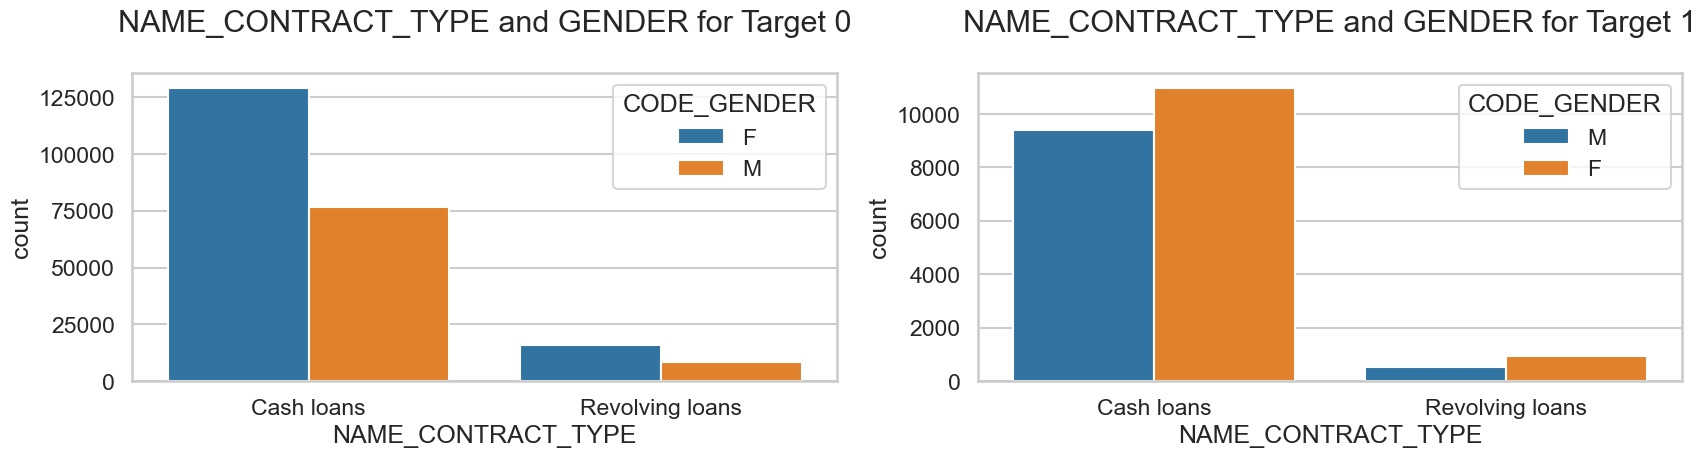

In [86]:
#Bivariate categorical and categorical

plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("NAME_CONTRACT_TYPE and GENDER for Target 0")

sns.countplot(x = 'NAME_CONTRACT_TYPE', hue = 'CODE_GENDER', data =target0)

plt.subplot(1,2,2)
plt.title("NAME_CONTRACT_TYPE and GENDER for Target 1")
sns.countplot(x = 'NAME_CONTRACT_TYPE', hue = 'CODE_GENDER', data =target1)

plt.show()

#### Observations : 
1. more females as loan applicant.
2. As seen in plot above, though male applicants are lower, ratio of male applicants deafulting seems to be higher. Need to crossverify

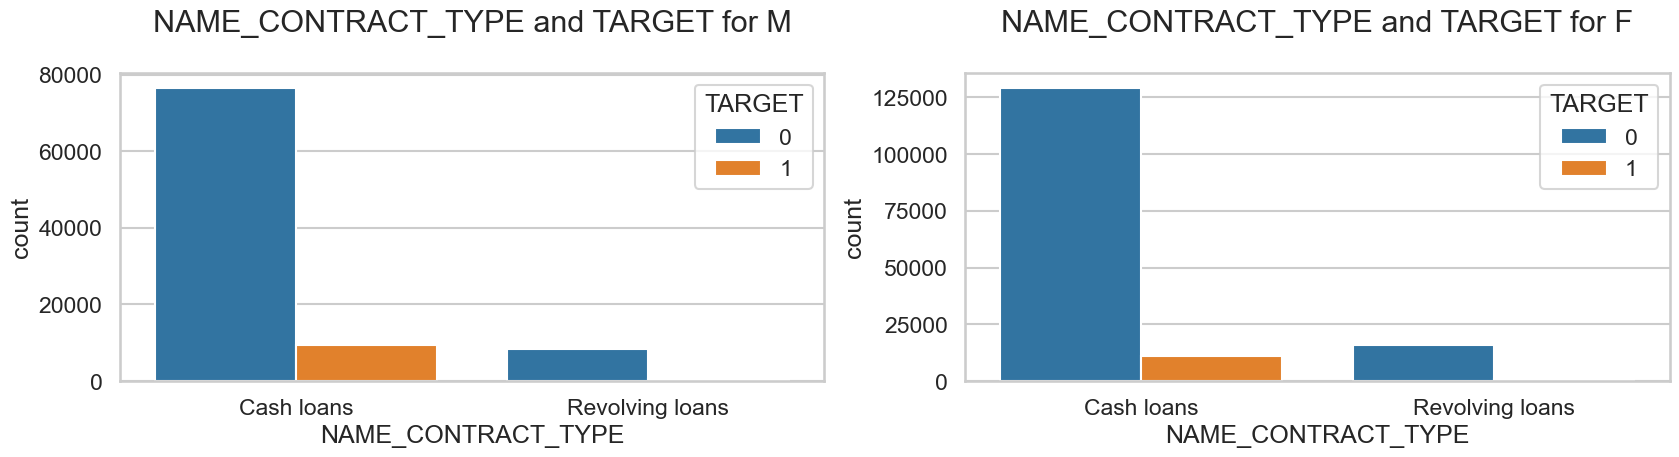

In [87]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("NAME_CONTRACT_TYPE and TARGET for M")

sns.countplot(x = 'NAME_CONTRACT_TYPE', hue = "TARGET", data=app[(app['CODE_GENDER']=="M")])

plt.subplot(1,2,2)
plt.title("NAME_CONTRACT_TYPE and TARGET for F")
sns.countplot(x = 'NAME_CONTRACT_TYPE', hue = "TARGET", data=app[(app['CODE_GENDER']=="F")])

plt.show()

#### Observation 
1. Male applicants are defaulting more that female applicants

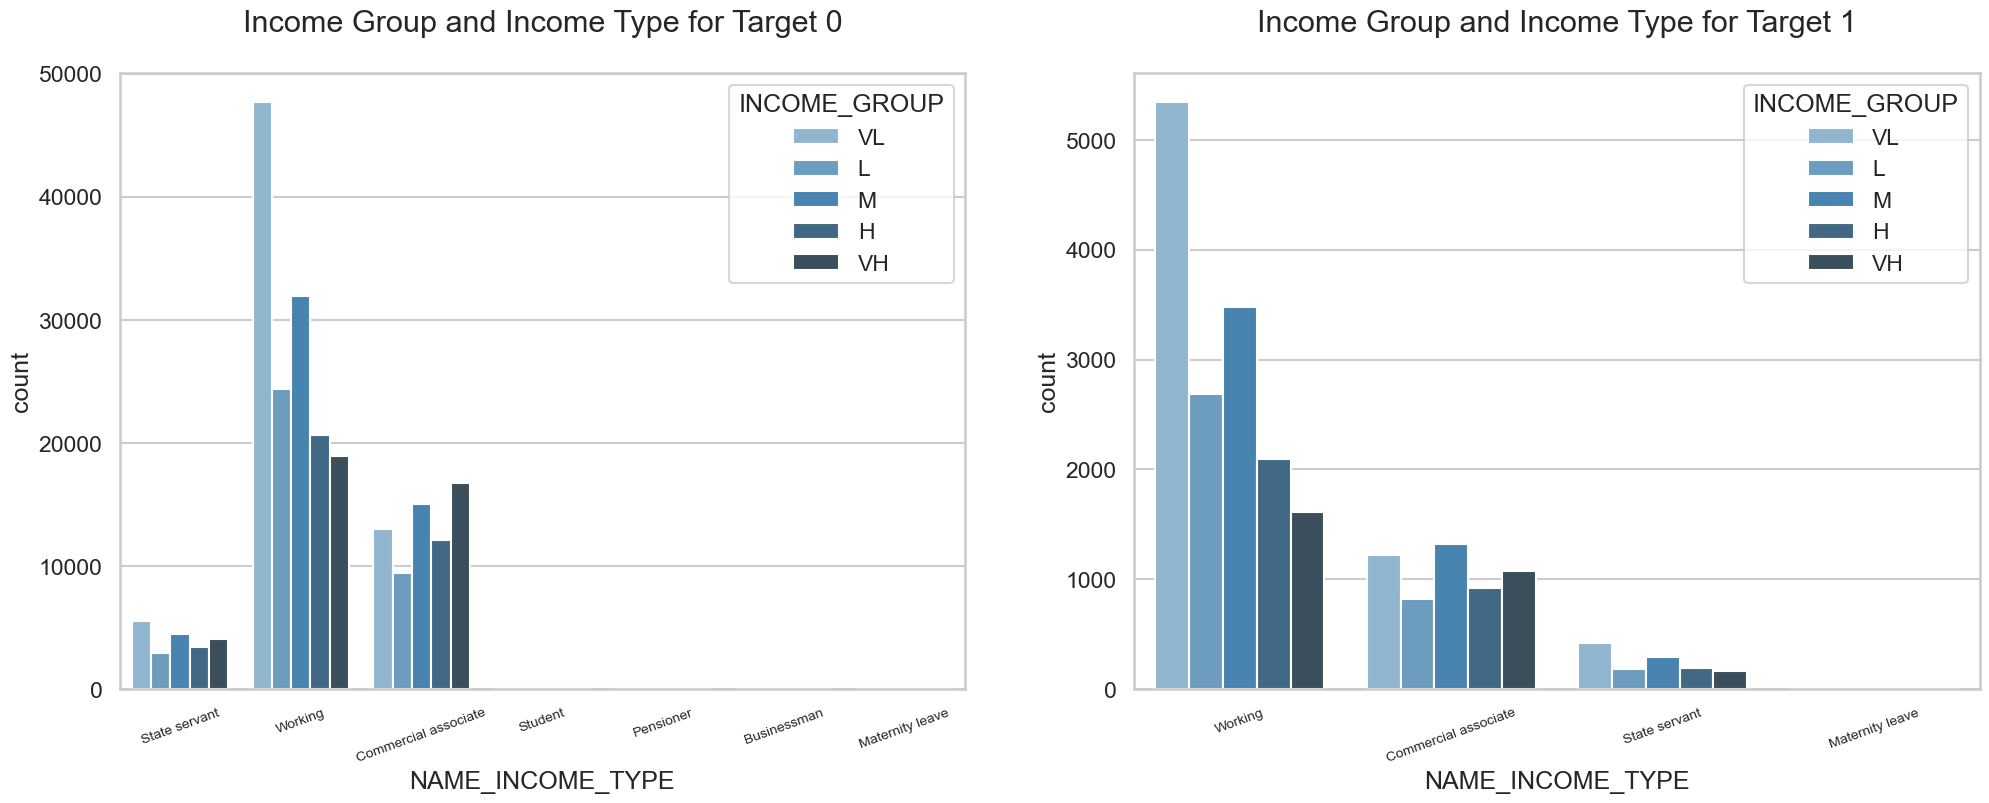

In [88]:
#Plotting a subplot to unstand what income group defaults more
plt.figure(figsize = (24,8))
plt.subplot(1,2,1)
plt.title("Income Group and Income Type for Target 0")
sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'INCOME_GROUP', data =target0, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.subplot(1,2,2)
plt.title("Income Group and Income Type for Target 1")
sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'INCOME_GROUP', data =target1, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)

plt.show()

#### Observation 
Medium income group with income type has almost 1 in 12 defaults. Higher than the avg 1 in 11 defaults.

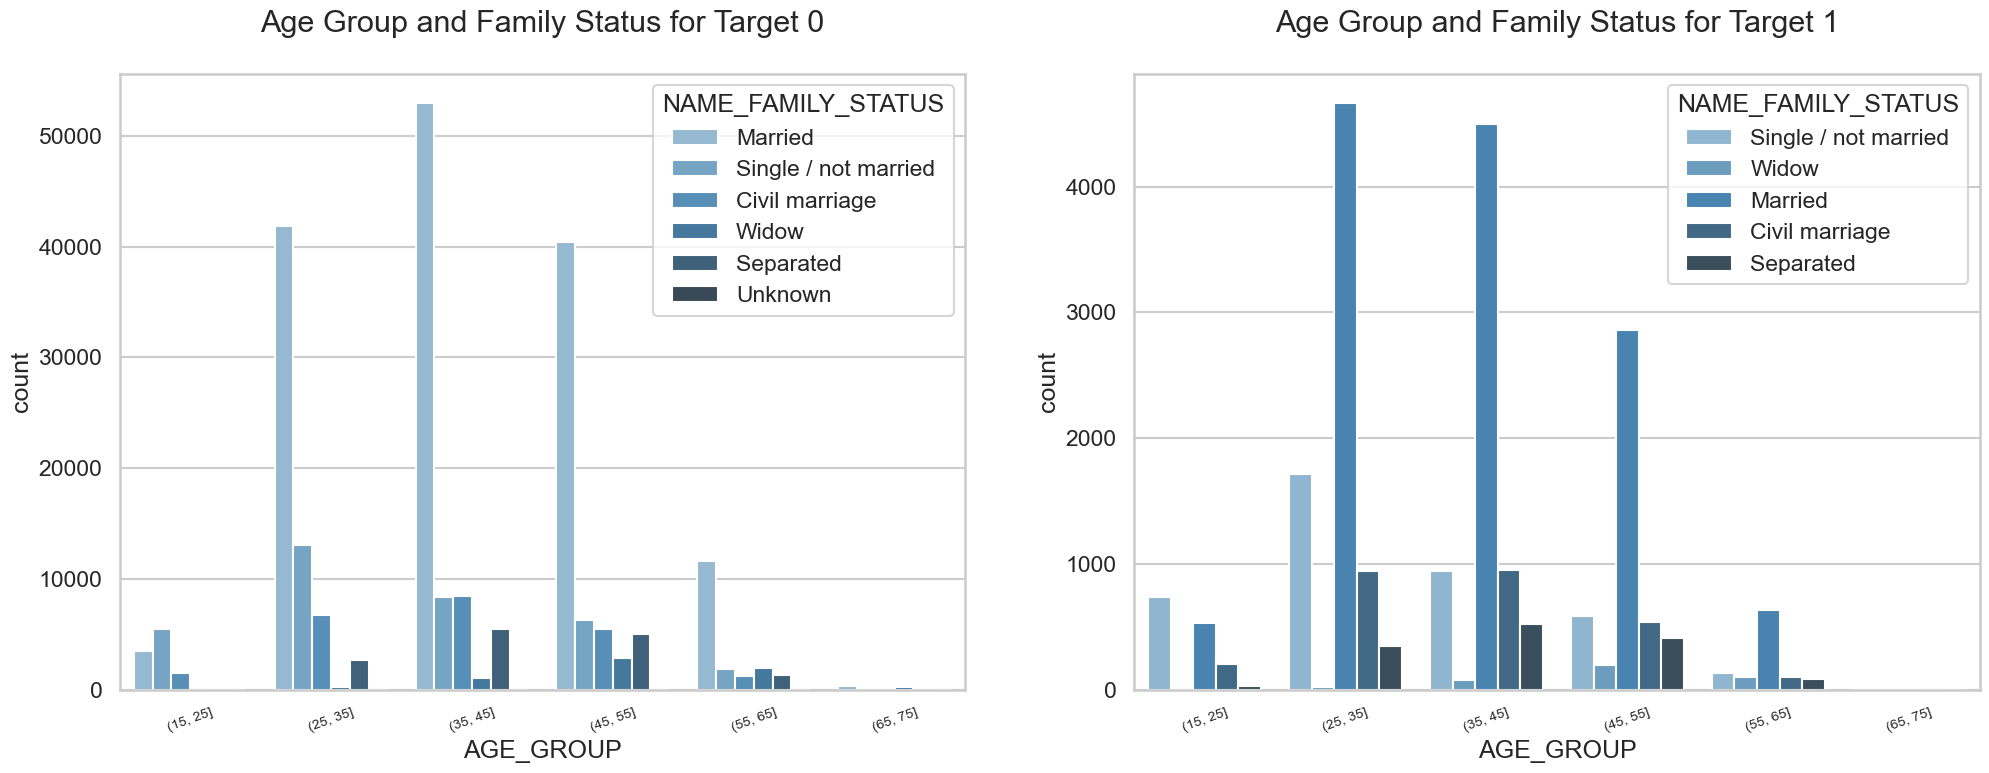

In [89]:
#Plotting to see what age group defaults more
plt.figure(figsize = (24,8))
plt.subplot(1,2,1)
plt.title("Age Group and Family Status for Target 0")
sns.countplot(x = 'AGE_GROUP', hue ='NAME_FAMILY_STATUS' , data =target0, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.subplot(1,2,2)
plt.title("Age Group and Family Status for Target 1")
sns.countplot(x='AGE_GROUP', hue ='NAME_FAMILY_STATUS' , data =target1, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)

plt.show()

#### Observation
- The above plot shows that married people of age 25-45 default way more that the others

#### Plotting and checking correlations in target 0  and 1

In [90]:
#Checking the top 10 corelations for target 0
corr_target_0=target0.drop(catvarList, axis=1)
correlation_target_0=corr_target_0.corr().abs()
corr_df = correlation_target_0.where(np.triu(np.ones(correlation_target_0.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset = ['Correlation'], inplace = True)
corr_df = corr_df.sort_values(by=['Correlation'], ascending=False)
corr_df.head(10)

Column1                   Column2  Correlation
414  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.998492
154           AMT_GOODS_PRICE                AMT_CREDIT     0.986402
302           CNT_FAM_MEMBERS              CNT_CHILDREN     0.893275
440  DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE     0.861492
155           AMT_GOODS_PRICE               AMT_ANNUITY     0.766963
129               AMT_ANNUITY                AMT_CREDIT     0.762104
128               AMT_ANNUITY          AMT_INCOME_TOTAL     0.400752
233         EMPLOYED_IN_YEARS              AGE_IN_YEARS     0.351923
415  OBS_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE     0.335765
389  DEF_30_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.333543

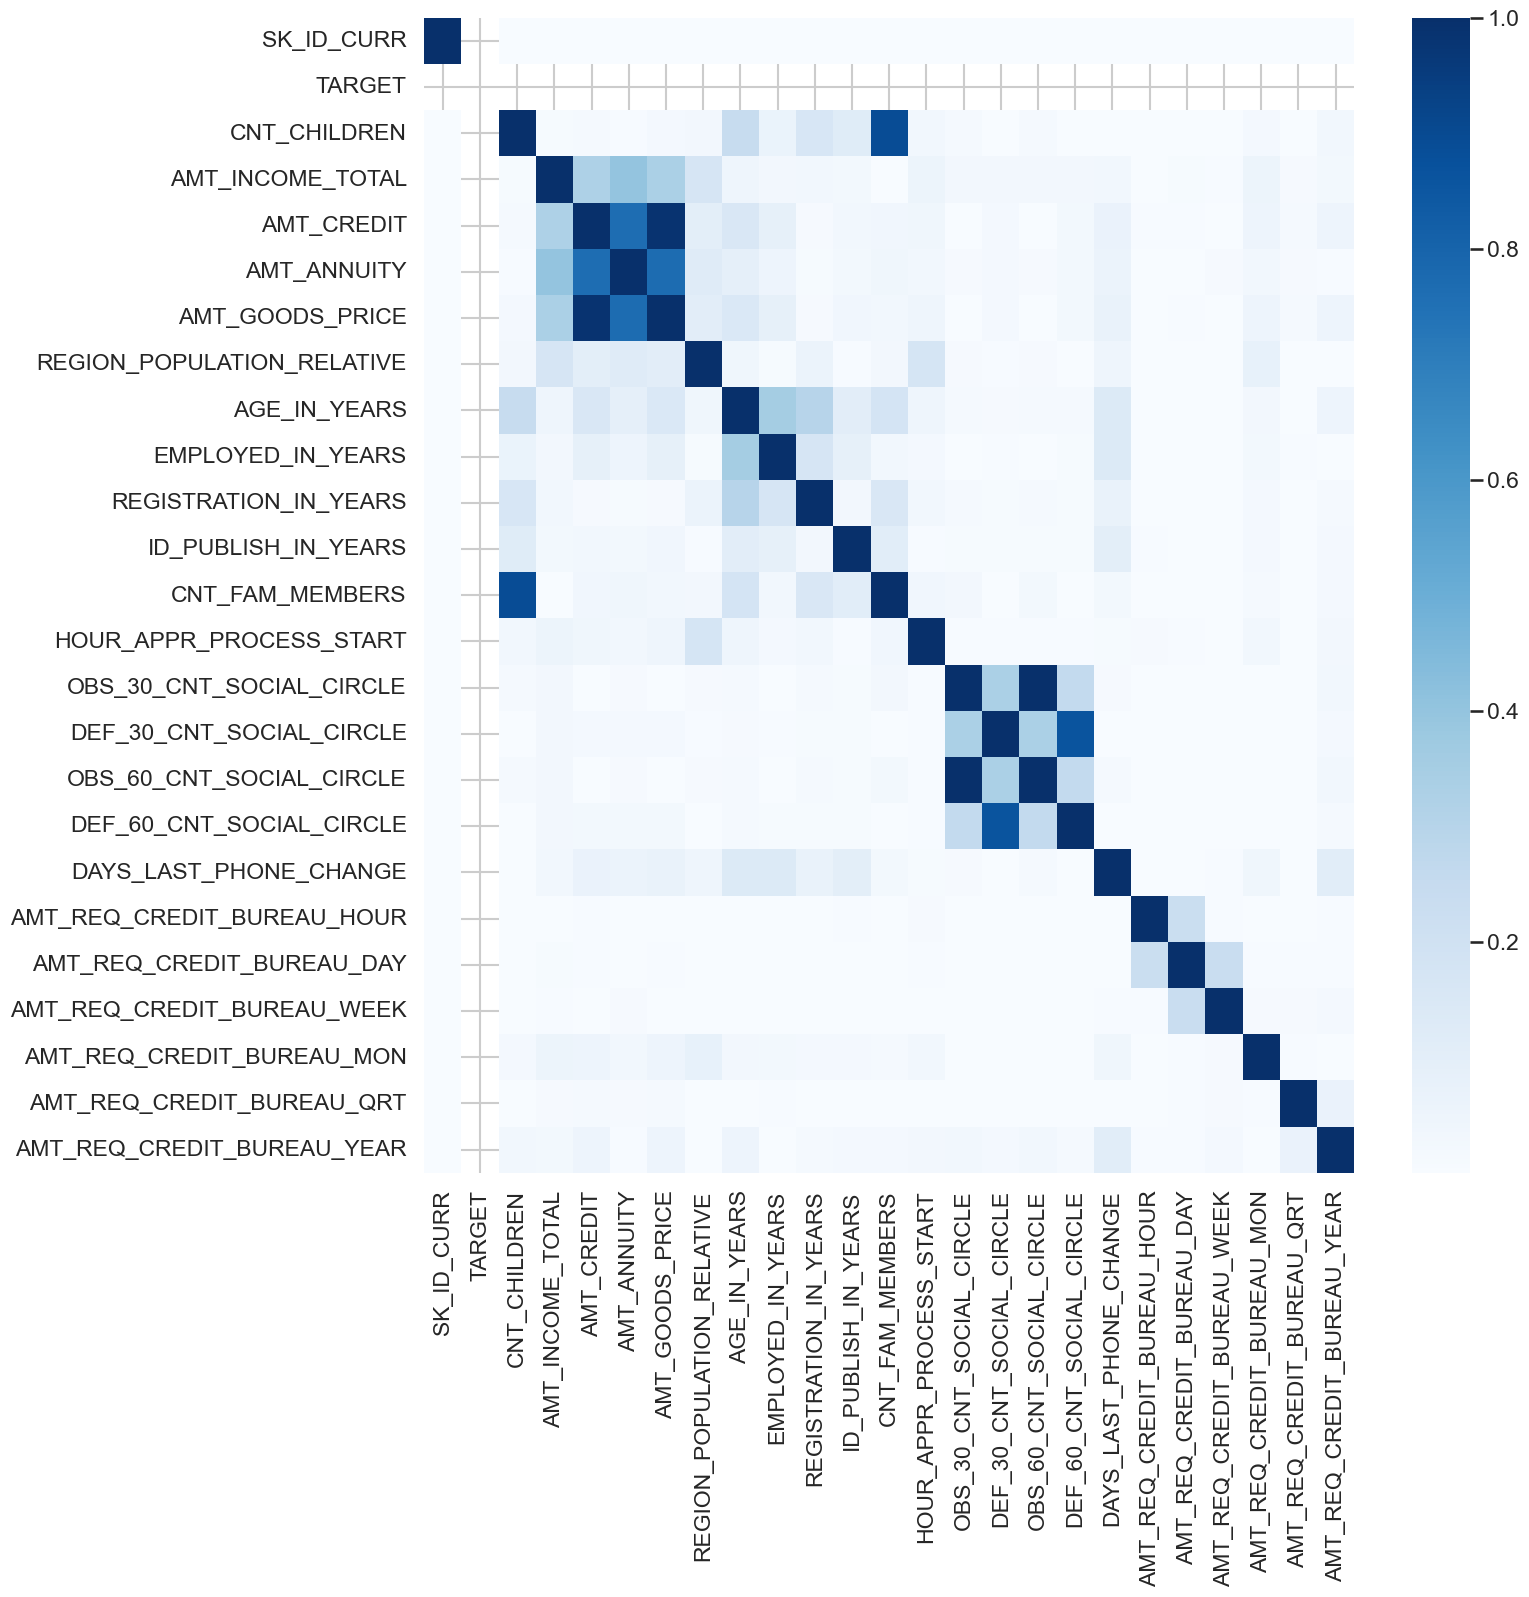

In [91]:
#Calculating the Correlation for the numerical Data of target 0 and plotting the heatmap
plt.figure(figsize=(15,15))
sns.heatmap(correlation_target_0, cmap='Blues')
plt.show()

In [92]:
#Checking the top 10 corelations for target 1
corr_target_1=target1.drop(catvarList, axis=1)
correlation_target_1=corr_target_1.corr().abs()
corr_df = correlation_target_1.where(np.triu(np.ones(correlation_target_1.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset = ['Correlation'], inplace = True)
corr_df = corr_df.sort_values(by=['Correlation'], ascending=False)
corr_df.head(10)

Column1                   Column2  Correlation
414  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.998289
154           AMT_GOODS_PRICE                AMT_CREDIT     0.982536
302           CNT_FAM_MEMBERS              CNT_CHILDREN     0.893829
440  DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE     0.867983
155           AMT_GOODS_PRICE               AMT_ANNUITY     0.749591
129               AMT_ANNUITY                AMT_CREDIT     0.748708
415  OBS_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE     0.331726
389  DEF_30_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.328381
233         EMPLOYED_IN_YEARS              AGE_IN_YEARS     0.306356
441  DEF_60_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE     0.257773

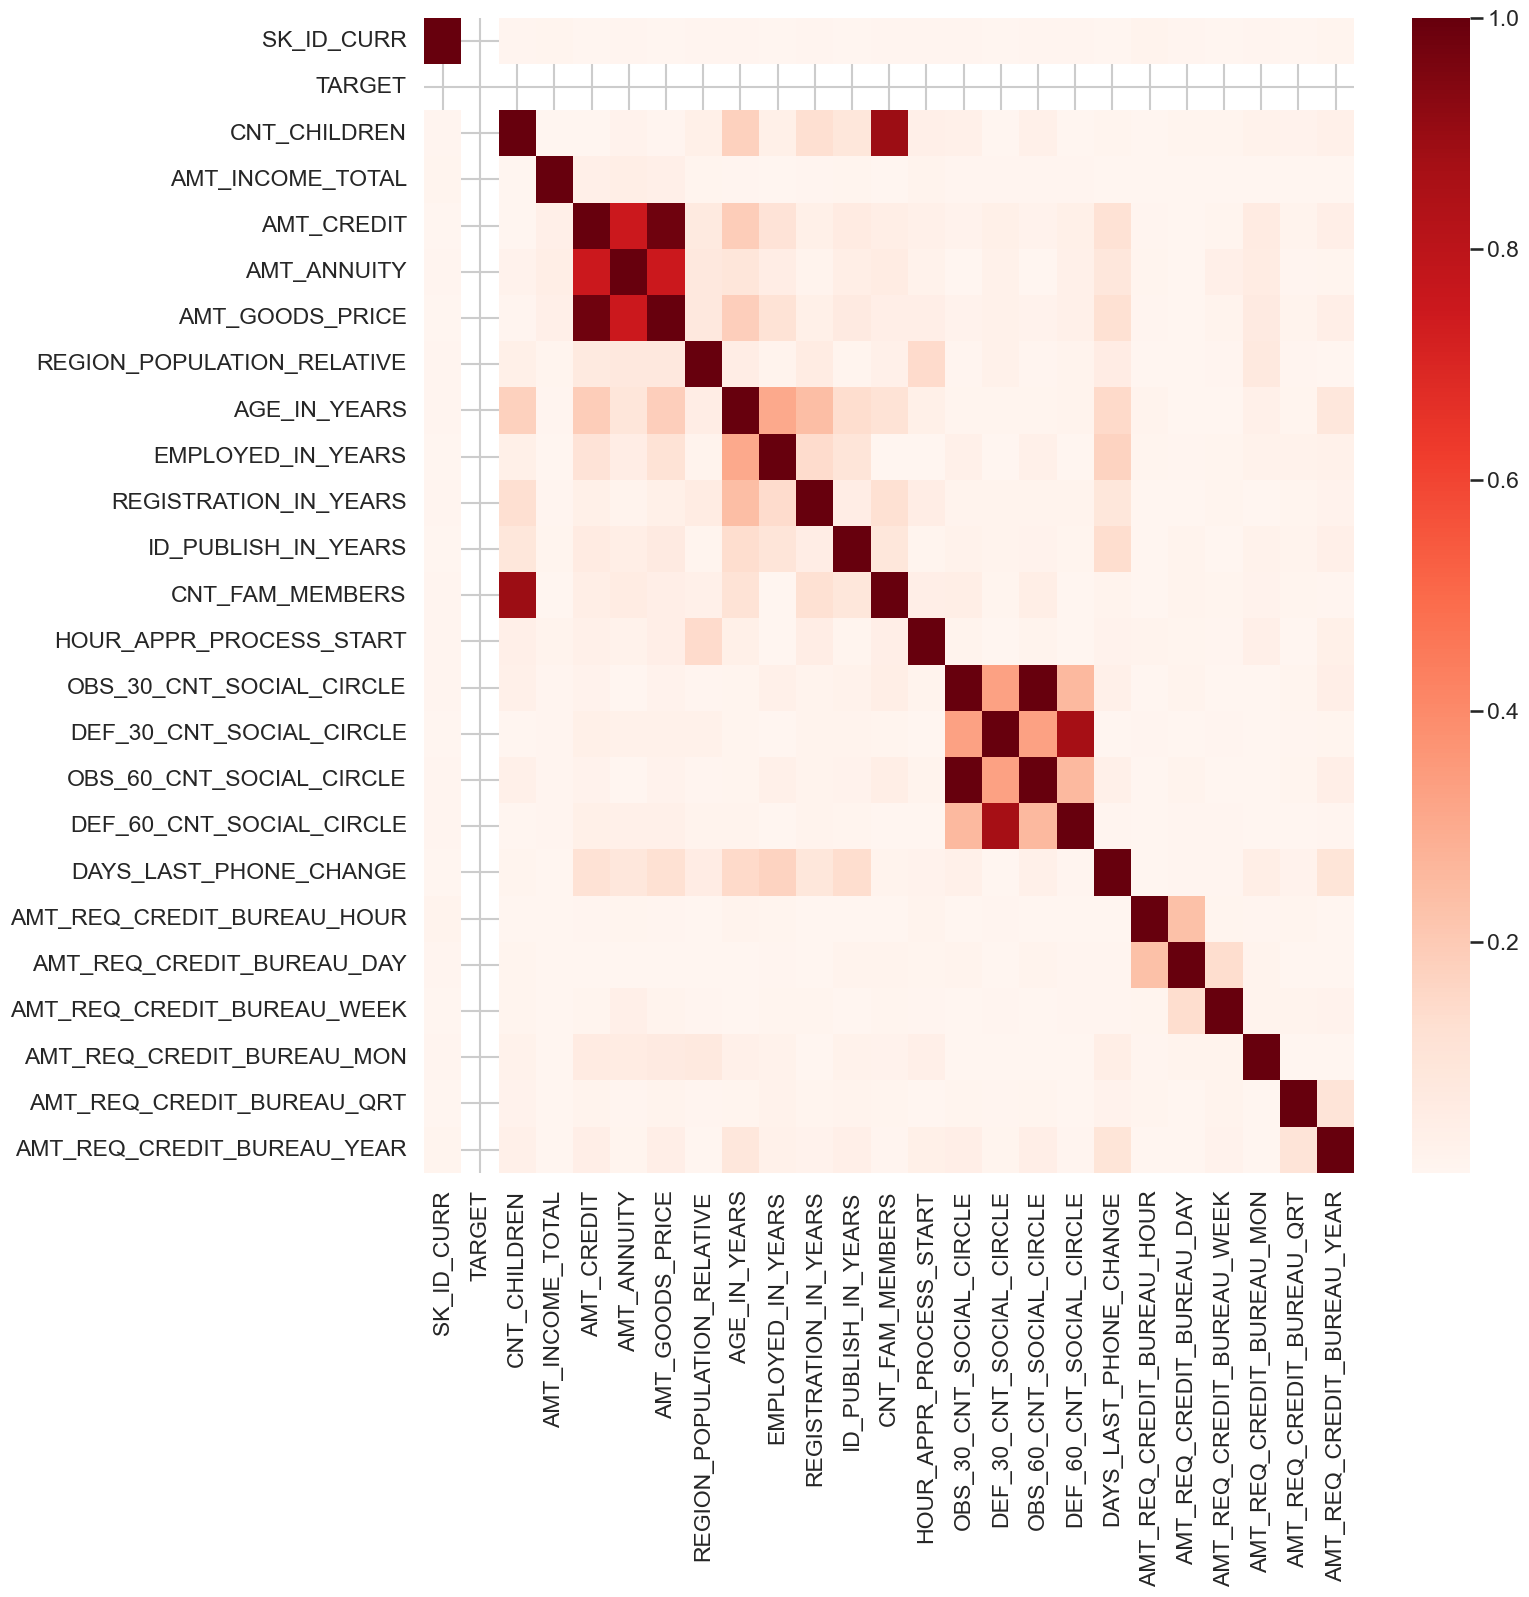

In [93]:
#Calculating the Correlation for the numerical Data of target 1 and plotting the heatmap
plt.figure(figsize=(15,15))
sns.heatmap(correlation_target_1, cmap='Reds')
plt.show()

#### Observations from the above correlations
1. OBS_30_CNT_SOCIAL_CIRCLE',OBS_60_CNT_SOCIAL_CIRCLE' are definetly correlated. We can also see that its higher and steeper for Target 1, signyfying that in approval process this parameter must be strongly looked into.
2. AMT_CREDIt and AMT_GOOD PRICE dont seem to be increasing proportionately with AMT_INCOME for TARGET 1, thus possibly leading to the target 1 applicants to be defaulters

### Pointers that the bank must consider while approving the loan based on application dataset : 
1. Females with revolving loans are more likely to default as compared to male clients
2. Maximum no. of loans are given to medium income group and there default value per loan is also on the higher side
3. Company must advice different rules for the higher income group loans since if they default they are bound to affect the company/bank more
4. Even though female loan applicants are higher the ratio of male applicants defaulting is higher
5. Married people of age 25-45 default way more that the others
6. Bank must look into the social circle of the applicant, People surrounded by defaulters are more suscesptible to default on loan repayment

### inspecting the prev applicant database

In [94]:
prev_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [95]:
prev_app.shape

(1670214, 37)

In [96]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [97]:
#Checking missing values
(prev_app.isnull().sum().sort_values()/prev_app.shape[0])*100

SK_ID_PREV                      0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
CODE_REJECT_REASON              0.000000
DAYS_DECISION                   0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_PAYMENT_TYPE               0.000000
AMT_APPLICATION                 0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
NAME_CONTRACT_TYPE              0.000000
SK_ID_CURR                      0.000000
AMT_CREDIT                      0.000060
PRODUCT_COMBINATION             0.020716
CNT_PAYMENT                    22.286366
AMT_ANNUITY     

In [98]:
#As this Dataset is massive, deciding to deleting rows with Null values for AMT_ANNUITY, AMT_GOODS_PRICE. 
#since need these columns for analysis as seen in application data frame and hence not deleting the columns

prev_app = prev_app.dropna(axis=0, subset=['AMT_ANNUITY'])
prev_app = prev_app.dropna(axis=0, subset=['AMT_GOODS_PRICE'])
(prev_app.isnull().sum().sort_values()/prev_app.shape[0])*100

SK_ID_PREV                      0.000000
PRODUCT_COMBINATION             0.000000
NAME_YIELD_GROUP                0.000000
CNT_PAYMENT                     0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
CODE_REJECT_REASON              0.000000
DAYS_DECISION                   0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_PAYMENT_TYPE               0.000000
AMT_CREDIT                      0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_GOODS_PRICE                 0.000000
SK_ID_CURR                      0.000000
AMT_APPLICATION                 0.000000
AMT_ANNUITY     

In [99]:
#Analysing the columns to understand the data spread and analysing the  columns with missing values
prev_app[(prev_app['NAME_CONTRACT_STATUS']!="Approved")]['NFLAG_INSURED_ON_APPROVAL'].value_counts(dropna=True)

Series([], Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64)

In [100]:
prev_app[(prev_app['NAME_CONTRACT_STATUS']=="Approved")]['NFLAG_INSURED_ON_APPROVAL'].value_counts(dropna=True)

0.0    624021
1.0    331064
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

In [101]:
prev_app[(prev_app['NAME_CONTRACT_STATUS']!="Approved")]['DAYS_FIRST_DRAWING'].value_counts(dropna=True)

Series([], Name: DAYS_FIRST_DRAWING, dtype: int64)

In [102]:
prev_app[(prev_app['NAME_CONTRACT_STATUS']!="Approved")]['DAYS_FIRST_DUE'].value_counts(dropna=True)

Series([], Name: DAYS_FIRST_DUE, dtype: int64)

In [103]:
prev_app[(prev_app['NAME_CONTRACT_STATUS']!="Approved")]['DAYS_LAST_DUE'].value_counts(dropna=True)

Series([], Name: DAYS_LAST_DUE, dtype: int64)

In [104]:
prev_app[(prev_app['NAME_CONTRACT_STATUS']!="Approved")]['DAYS_LAST_DUE_1ST_VERSION'].value_counts(dropna=True)

Series([], Name: DAYS_LAST_DUE_1ST_VERSION, dtype: int64)

In [105]:
prev_app[(prev_app['NAME_CONTRACT_STATUS']!="Approved")]['DAYS_TERMINATION'].value_counts(dropna=True)

Series([], Name: DAYS_TERMINATION, dtype: int64)

In [106]:
prev_app[prev_app['NAME_CONTRACT_STATUS']!="Approved"].shape

(252382, 37)

In [107]:
prev_app[prev_app['DAYS_LAST_DUE'].isna()].shape

(291235, 37)

- Deciding to drop the above columns since these columns are for the nonapproved cases which although is the genuine data since without a loan, applicant can't drwa and will not have the insaurance too.
- Droping because no bussiness point of view for these rows


In [108]:
temp=prev_app.columns[(prev_app.isnull().sum() * 100 / prev_app.shape[0]) > 20]
prev_app.drop(axis=1, columns=temp, inplace=True)
prev_app.shape

(1246320, 26)

In [109]:
#Checking the null values again to crosscheck and reverify the data
(prev_app.isnull().sum().sort_values()/prev_app.shape[0])*100

SK_ID_PREV                     0.0
CNT_PAYMENT                    0.0
NAME_SELLER_INDUSTRY           0.0
SELLERPLACE_AREA               0.0
CHANNEL_TYPE                   0.0
NAME_PRODUCT_TYPE              0.0
NAME_PORTFOLIO                 0.0
NAME_GOODS_CATEGORY            0.0
NAME_CLIENT_TYPE               0.0
CODE_REJECT_REASON             0.0
NAME_PAYMENT_TYPE              0.0
DAYS_DECISION                  0.0
NAME_CONTRACT_STATUS           0.0
NAME_CASH_LOAN_PURPOSE         0.0
NFLAG_LAST_APPL_IN_DAY         0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
HOUR_APPR_PROCESS_START        0.0
WEEKDAY_APPR_PROCESS_START     0.0
AMT_GOODS_PRICE                0.0
AMT_CREDIT                     0.0
AMT_APPLICATION                0.0
AMT_ANNUITY                    0.0
NAME_CONTRACT_TYPE             0.0
SK_ID_CURR                     0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
dtype: float64

In [110]:
#analysing the numerical data
prev_app.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.246320e+06  1.246320e+06  1.246320e+06     1.246320e+06   
mean   1.913834e+06  2.783561e+05  1.605938e+04     2.325942e+05   
std    5.340824e+05  1.027801e+05  1.492967e+04     3.186545e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.446936e+06  1.893740e+05  6.327990e+03     5.220000e+04   
50%    1.910148e+06  2.787420e+05  1.125000e+04     1.125000e+05   
75%    2.377944e+06  3.673812e+05  2.061227e+04     2.475000e+05   
max    2.845379e+06  4.562550e+05  4.180581e+05     5.850000e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count  1.246320e+06     1.246320e+06             1.246320e+06   
mean   2.492727e+05     2.326240e+05             1.258250e+01   
std    3.465843e+05     3.186729e+05             3.326113e+00   
min    0.000000e+00     0.000000e+00             0.000000e+00   
25%    5.157450e+04     5.220000e+04             1.000000e+01   
50%    1.161675e+05     1.125000e+05             1.200000e+01   
75%    2.700000e+05     2.475000e+05             1.500000e+01   
max    4.509688e+06     5.850000e+06             2.300000e+01   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  
count            1.246320e+06   1.246320e+06      1.246320e+06  1.246320e+06  
mean             9.978914e-01  -1.021855e+03      4.056201e+02  1.671954e+01  
std              4.587116e-02   7.864511e+02      8.246103e+03  1.448712e+01  
min              0.000000e+00  -2.922000e+03     -1.000000e+00  0.000000e+00  
25%              1.000000e+00  -1.534000e+03     -1.000000e+00  6.000000e+00  
50%              1.000000e+00  -7.660000e+02      2.700000e+01  1.200000e+01  
75%              1.000000e+00  -3.850000e+02      1.460000e+02  2.400000e+01  
max              1.000000e+00  -1.000000e+00      4.000000e+06  8.400000e+01

In [111]:
prev_app.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                    float64
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION      

In [112]:
#taking reference from the columns description cssv and analysing the columns that seem irrelevant from the business point of view
#'HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA',
#'WEEKDAY_APPR_PROCESS_START', 'NAME_PRODUCT_TYPE','NAME_CASH_LOAN_PURPOSE', 
#'NAME_GOODS_CATEGORY','NAME_PAYMENT_TYPE','CODE_REJECT_REASON'
temp = ['HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA','WEEKDAY_APPR_PROCESS_START', 'NAME_PRODUCT_TYPE','NAME_CASH_LOAN_PURPOSE','NAME_GOODS_CATEGORY','NAME_PAYMENT_TYPE','CODE_REJECT_REASON']
for i in temp:
    print(i)
    print(prev_app[i].describe(),'\n')
    print(prev_app[i].value_counts(normalize=True,dropna=False),'\n\n')

HOUR_APPR_PROCESS_START
count    1.246320e+06
mean     1.258250e+01
std      3.326113e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.500000e+01
max      2.300000e+01
Name: HOUR_APPR_PROCESS_START, dtype: float64 

11    0.114816
12    0.111969
10    0.105887
13    0.104432
14    0.095781
15    0.086508
16    0.073786
9     0.072932
17    0.058196
8     0.042792
18    0.040280
7     0.026059
19    0.022301
6     0.014634
20    0.009794
5     0.008567
4     0.005023
21    0.002633
3     0.002517
2     0.000475
22    0.000399
1     0.000092
23    0.000078
0     0.000049
Name: HOUR_APPR_PROCESS_START, dtype: float64 


NFLAG_LAST_APPL_IN_DAY
count    1.246320e+06
mean     9.978914e-01
std      4.587116e-02
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: NFLAG_LAST_APPL_IN_DAY, dtype: float64 

1    0.997891
0    0.002109
Name: NFLAG_LAST_APPL_IN_DAY, dtype: float64 


DAYS_DECISION
count  

deciding to drop the above columns since 
1. for the numerical columns, the data is of no business point of view,
2. WEEKDAY_APPR_PROCESS_START is not relevant ot the analysis,
3. NAME_PRODUCT_TYPE has 55% XNA(equivalent to NaN) values,
4. NAME_CASH_LOAN_PURPOSE has 90% NNA/XAP(equivalent to NaN) values, 
5. NAME_GOODS_CATEGORY has High XNA(equivalent to NaN) values,
6. NAME_PAYMENT_TYPE has 19% XAP(equivalent to NaN) values,
7. CODE_REJECT_REASON has 80% XAP(equivalent to NaN) values

In [113]:
prev_app.drop(axis=1, columns=temp, inplace=True)
prev_app.shape

(1246320, 16)

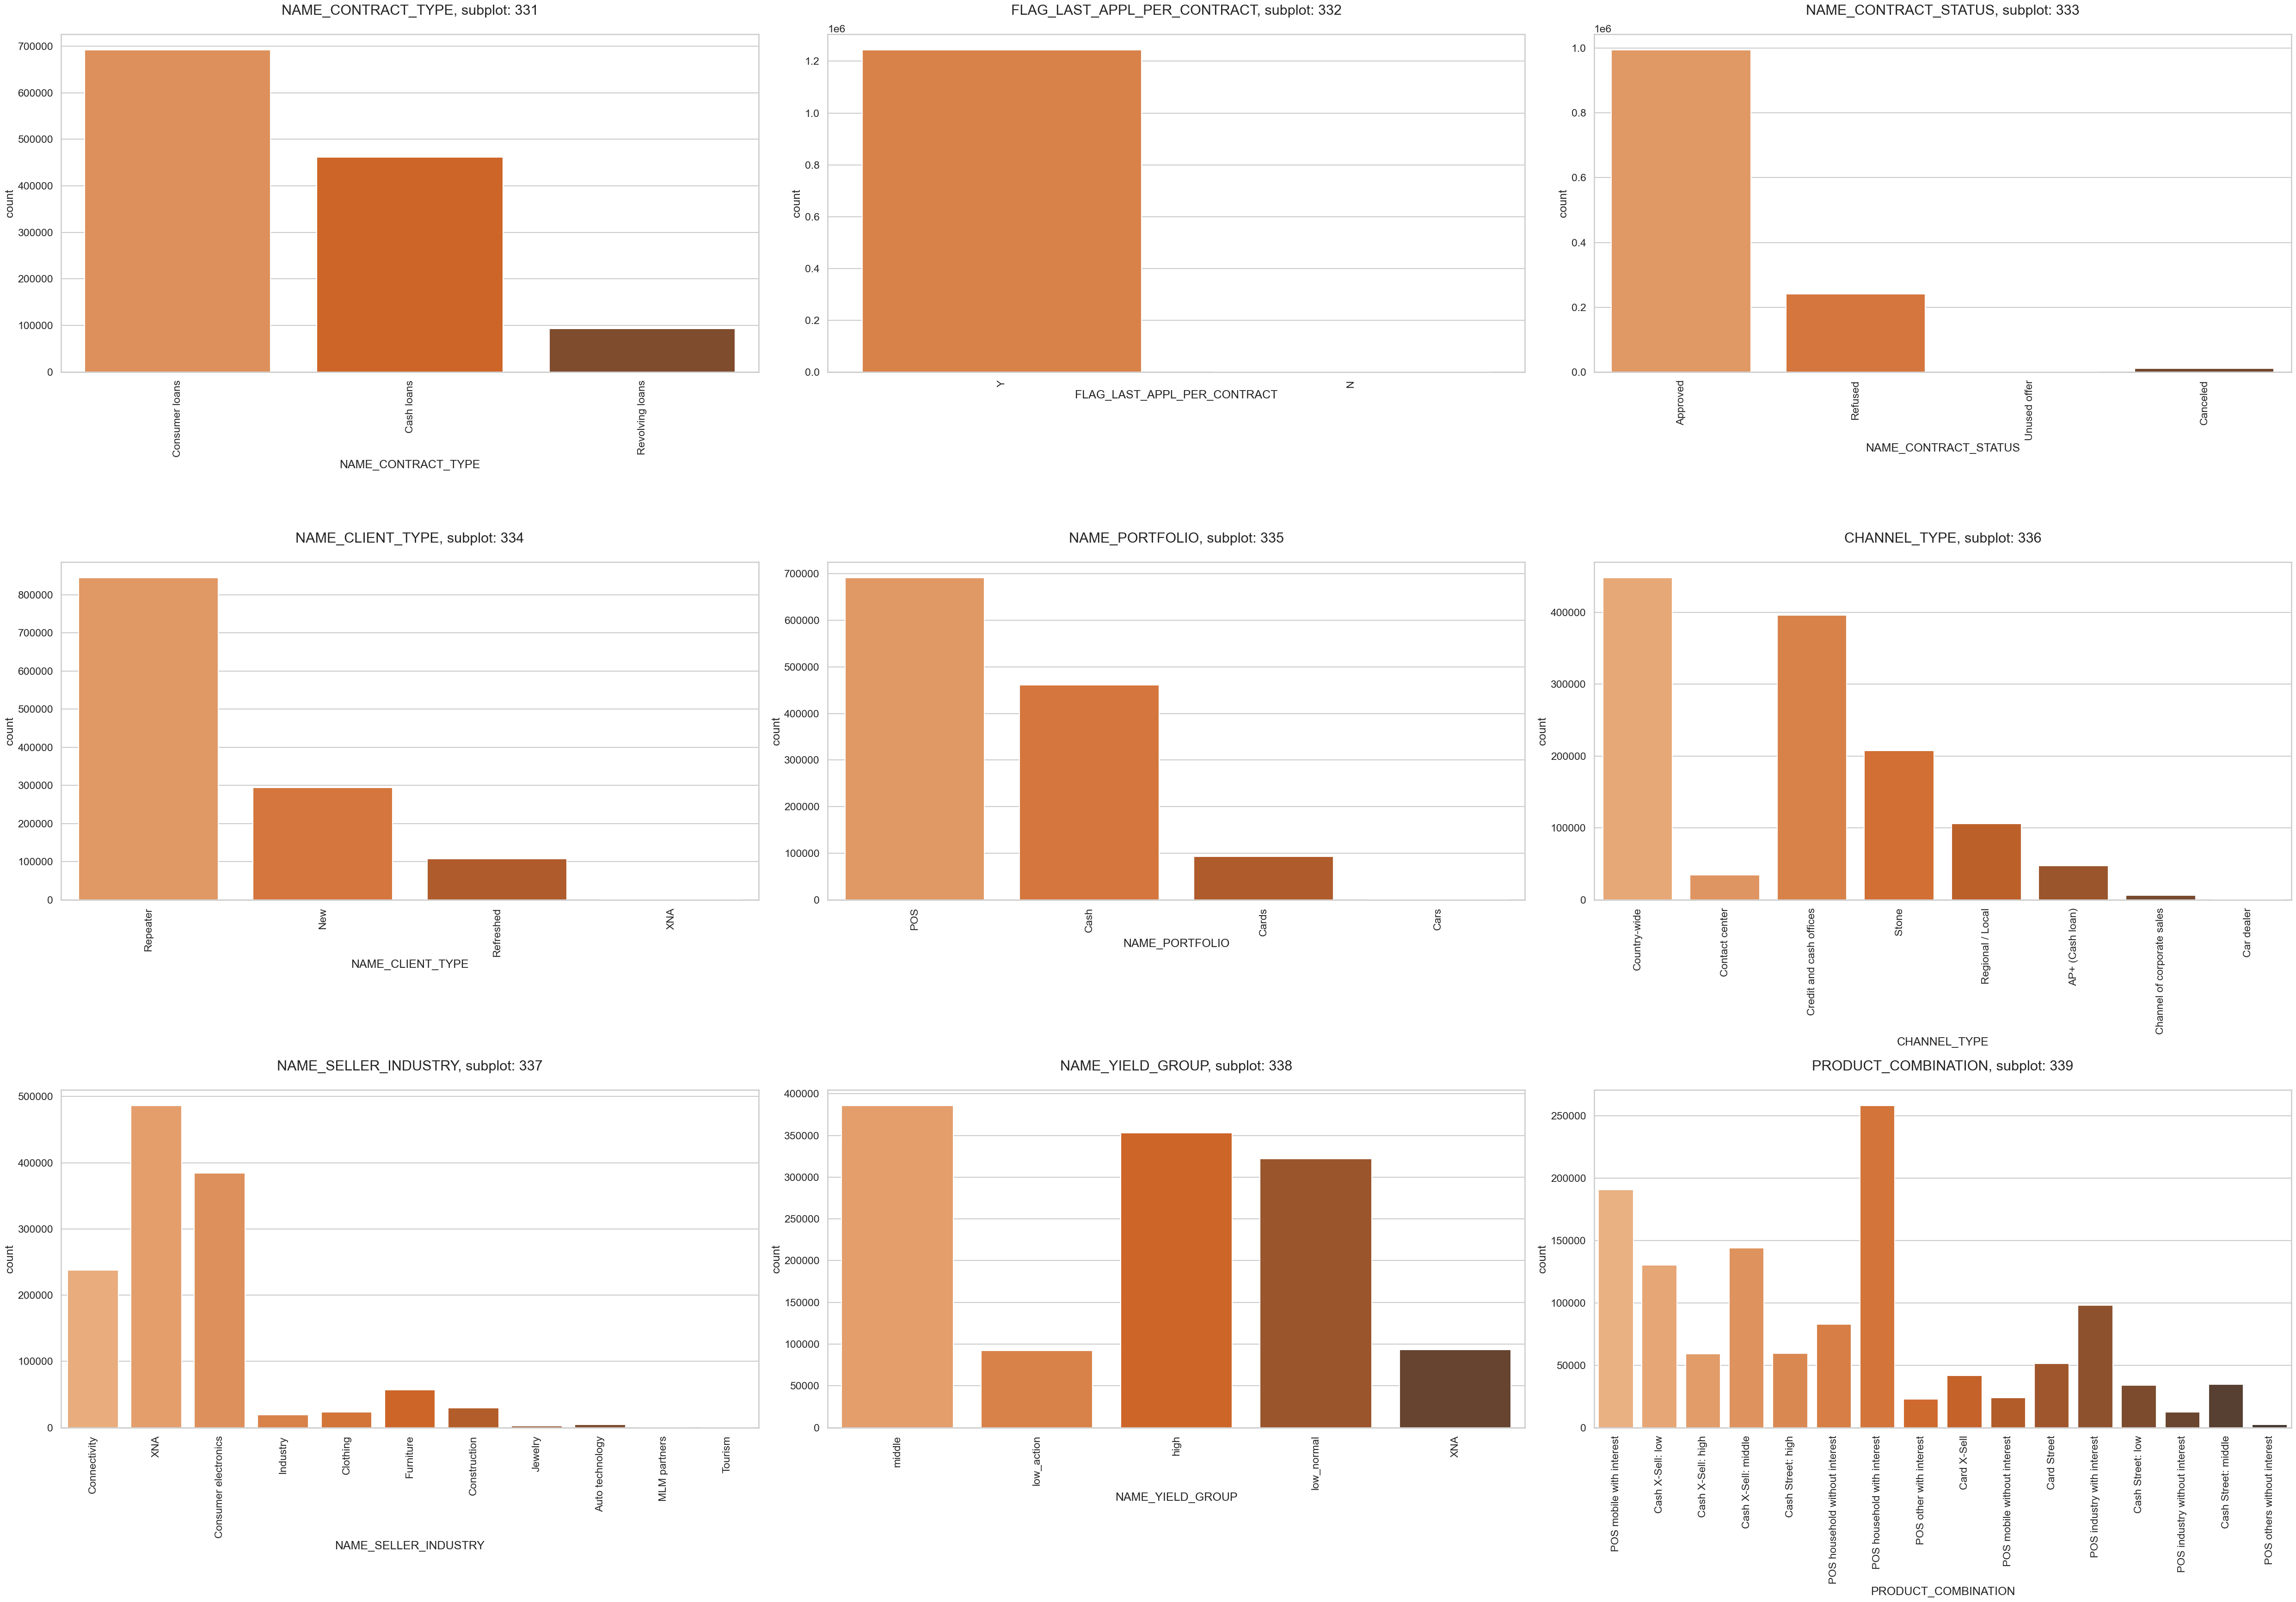

In [114]:
#Plotting the data for the categorical columns   
rows = 3
cols = 3
plot_counter = 1
fig = plt.figure(figsize=(50,35))
for i in prev_app.columns:
    if prev_app[i].dtypes=="object":
        plt.subplot(rows, cols, plot_counter)
        plt.title('{}, subplot: {}{}{}'.format(i, rows, cols, plot_counter))
        plt.xlabel(i)
        plt.xticks(rotation=90)
        sns.countplot(x = i, data = prev_app,palette="Oranges_d")
        plot_counter = plot_counter + 1
fig.tight_layout()
plt.show()

### Observations
1. 55% of loans are consumer loan which was absent from the application.csv, 37% are cash loans and rest are revolving
2. Most records of approved loans(roughly 80%) and rest data is distributed in refused, cancelled and unused
3. Many are repeaters, NAME_CLIENT_TYPE also has some null values showing as XNA as per the plot
4. 55% of the applicants have taken loan for POS purchase.
5. Name seller industry has 37% XNA values, Consumer electronics is next highest category at 30%




In [115]:
#rechecking the now left columns to understand the data spread
prev_app.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.246320e+06  1.246320e+06  1.246320e+06     1.246320e+06   
mean   1.913834e+06  2.783561e+05  1.605938e+04     2.325942e+05   
std    5.340824e+05  1.027801e+05  1.492967e+04     3.186545e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.446936e+06  1.893740e+05  6.327990e+03     5.220000e+04   
50%    1.910148e+06  2.787420e+05  1.125000e+04     1.125000e+05   
75%    2.377944e+06  3.673812e+05  2.061227e+04     2.475000e+05   
max    2.845379e+06  4.562550e+05  4.180581e+05     5.850000e+06   

         AMT_CREDIT  AMT_GOODS_PRICE   CNT_PAYMENT  
count  1.246320e+06     1.246320e+06  1.246320e+06  
mean   2.492727e+05     2.326240e+05  1.671954e+01  
std    3.465843e+05     3.186729e+05  1.448712e+01  
min    0.000000e+00     0.000000e+00  0.000000e+00  
25%    5.157450e+04     5.220000e+04  6.000000e+00  
50%    1.161675e+05     1.125000e+05  1.200000e+01  
75%    2.700000e+05     2.475000e+05  2.400000e+01  
max    4.509688e+06     5.850000e+06  8.400000e+01

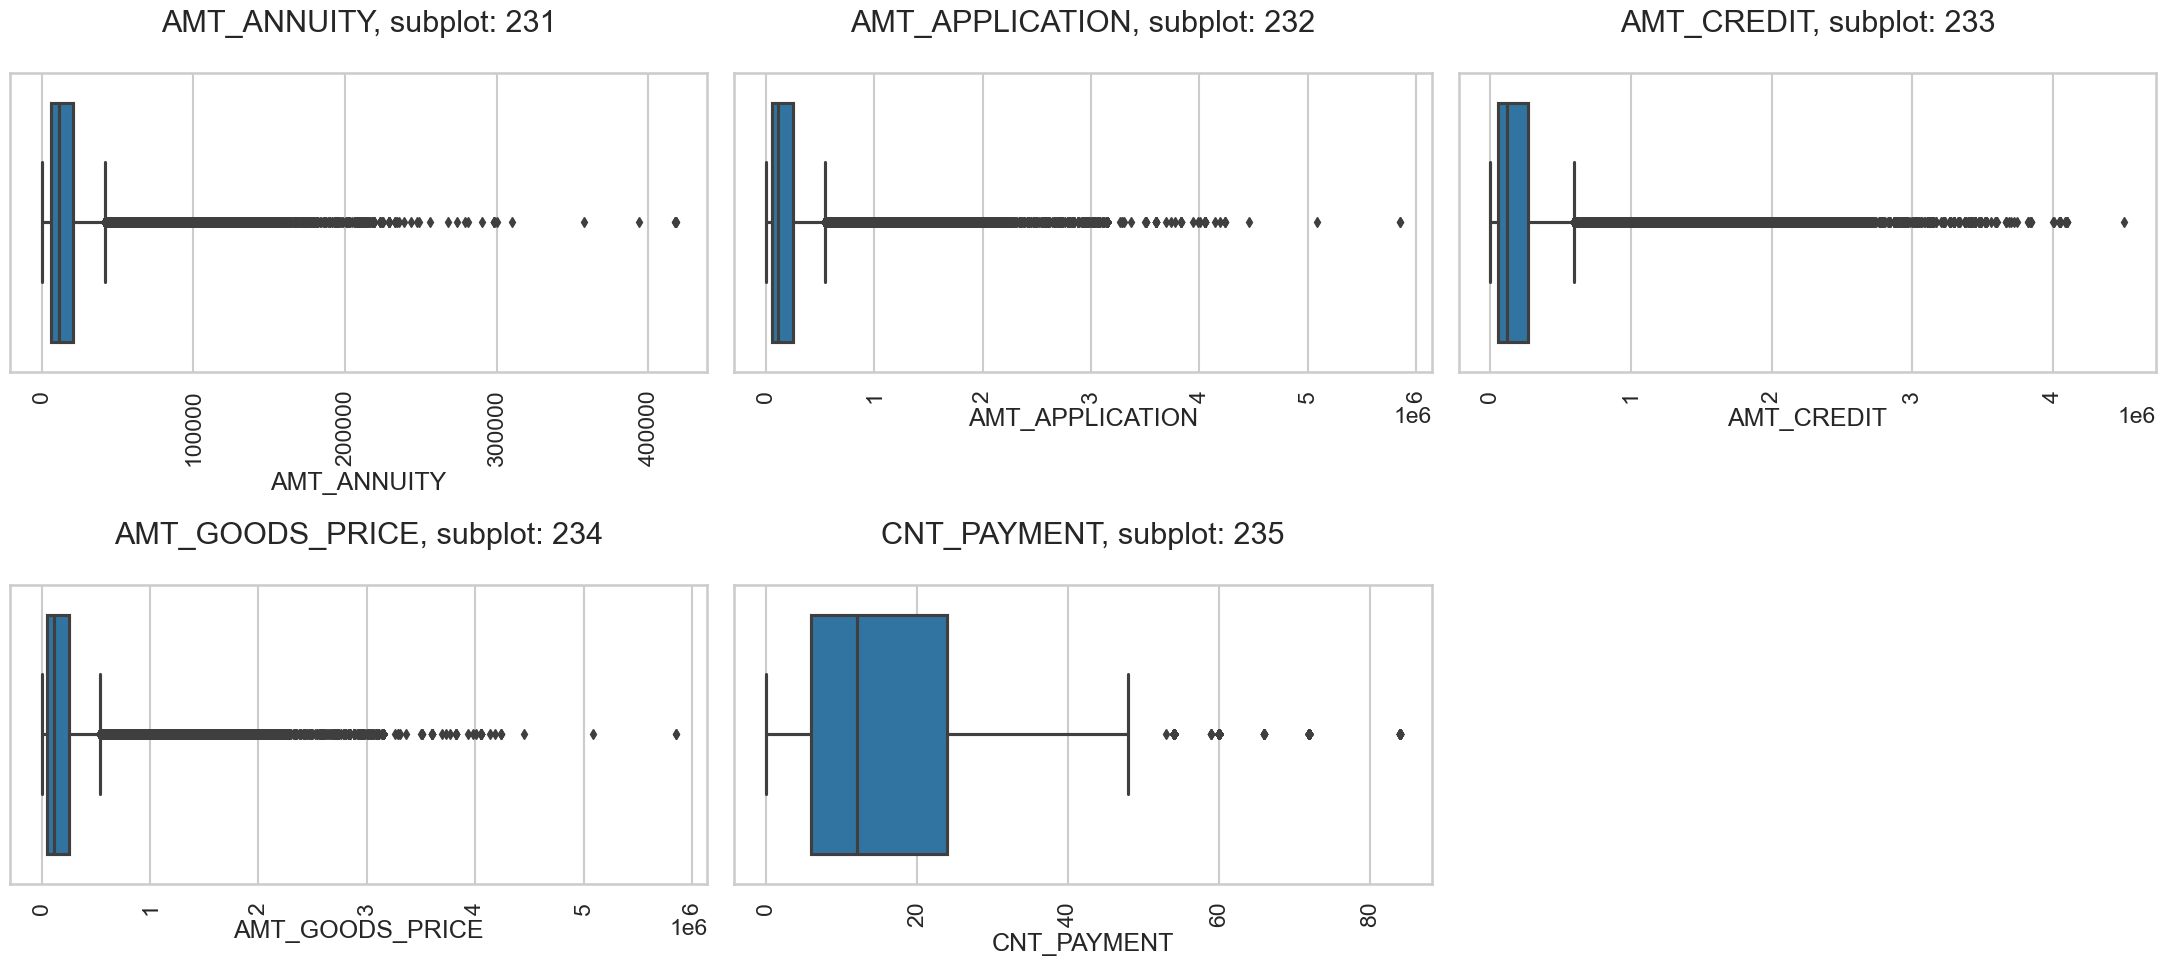

In [116]:
#Plotting the data for the float type columns   
rows = 2
cols = 3
plot_counter = 1
fig = plt.figure(figsize=(22,10))
for i in prev_app.columns:
    if prev_app[i].dtypes=="float64":
        plt.subplot(rows, cols, plot_counter)
        plt.title('{}, subplot: {}{}{}'.format(i, rows, cols, plot_counter))
        plt.xlabel(i)
        plt.xticks(rotation=90)
        sns.boxplot(x = i, data = prev_app)
        plot_counter = plot_counter + 1
fig.tight_layout()
plt.show()

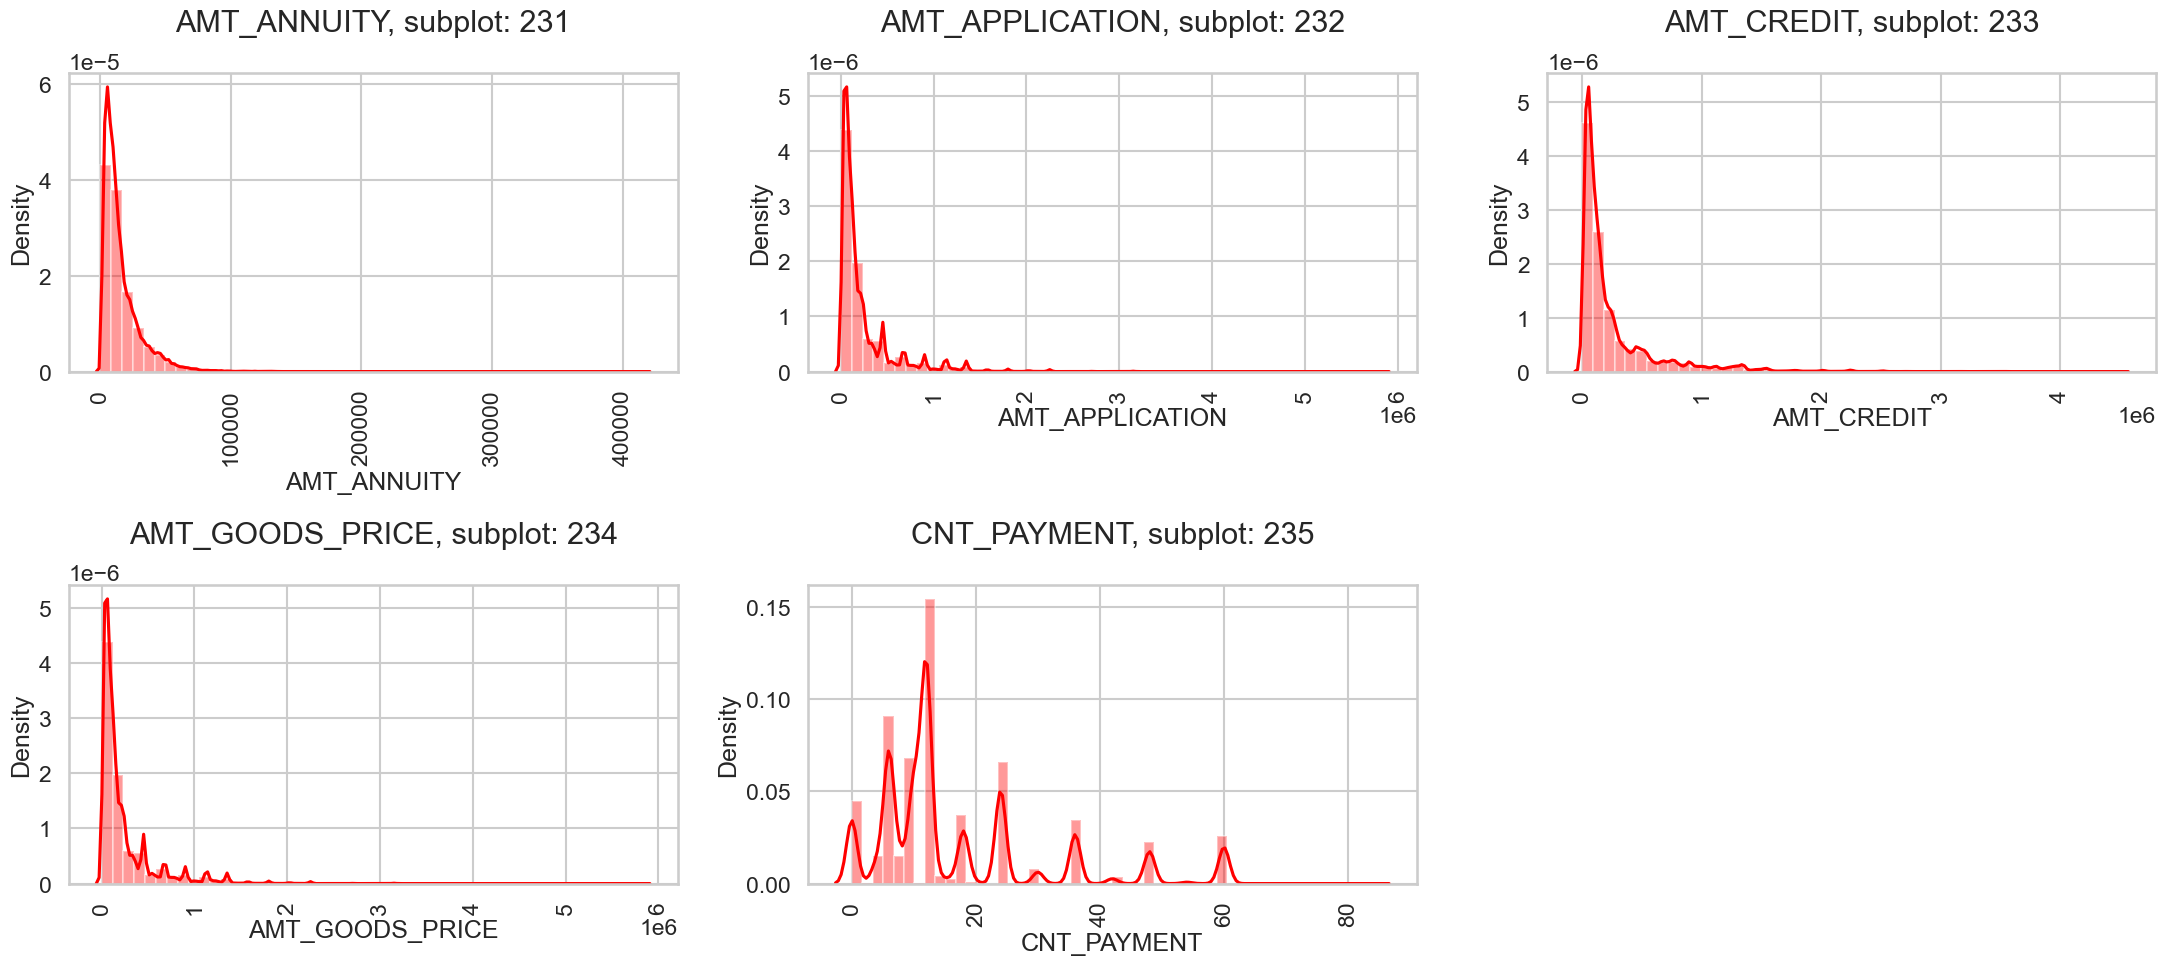

In [117]:
# checking with another plot(distplot), the boxplot suggests the presense of outliers
rows = 2
cols = 3
plot_counter = 1
fig = plt.figure(figsize=(22,10))
for i in prev_app.columns:
    if prev_app[i].dtypes=="float64":
        plt.subplot(rows, cols, plot_counter)
        plt.title('{}, subplot: {}{}{}'.format(i, rows, cols, plot_counter))
        plt.xlabel(i)
        plt.xticks(rotation=90)
        sns.distplot(prev_app[i],color ='red')
        plot_counter = plot_counter + 1
fig.tight_layout()
plt.show()

The above dist and boxplot suggesting presence of potential outliers.

In [118]:
#Analysing the datasets with the help of zscore concept to find out the 97th percentile outliers

for i in prev_app.columns:
    if prev_app[i].dtypes=="float64" or prev_app[i].dtypes=="float32":
        print( i, ":", end= " ")
        print(prev_app.iloc[np.where(np.abs(ss.zscore(prev_app[i])>2))].shape, end=" ")
        print("Percentage of Outlier rows: ", round((prev_app.iloc[np.where(np.abs(ss.zscore(prev_app[i])>2))].shape[0]/prev_app.shape[0]*100), 2))          

AMT_ANNUITY : (61959, 16) Percentage of Outlier rows:  4.97
AMT_APPLICATION : (75698, 16) Percentage of Outlier rows:  6.07
AMT_CREDIT : (69957, 16) Percentage of Outlier rows:  5.61
AMT_GOODS_PRICE : (75714, 16) Percentage of Outlier rows:  6.08
CNT_PAYMENT : (103224, 16) Percentage of Outlier rows:  8.28


In [119]:
#Ideally based on zscore(97th percentile) value, these rows can be deleted.
#not doing so at the moment to understand there impact on the analysis, will make decision later on

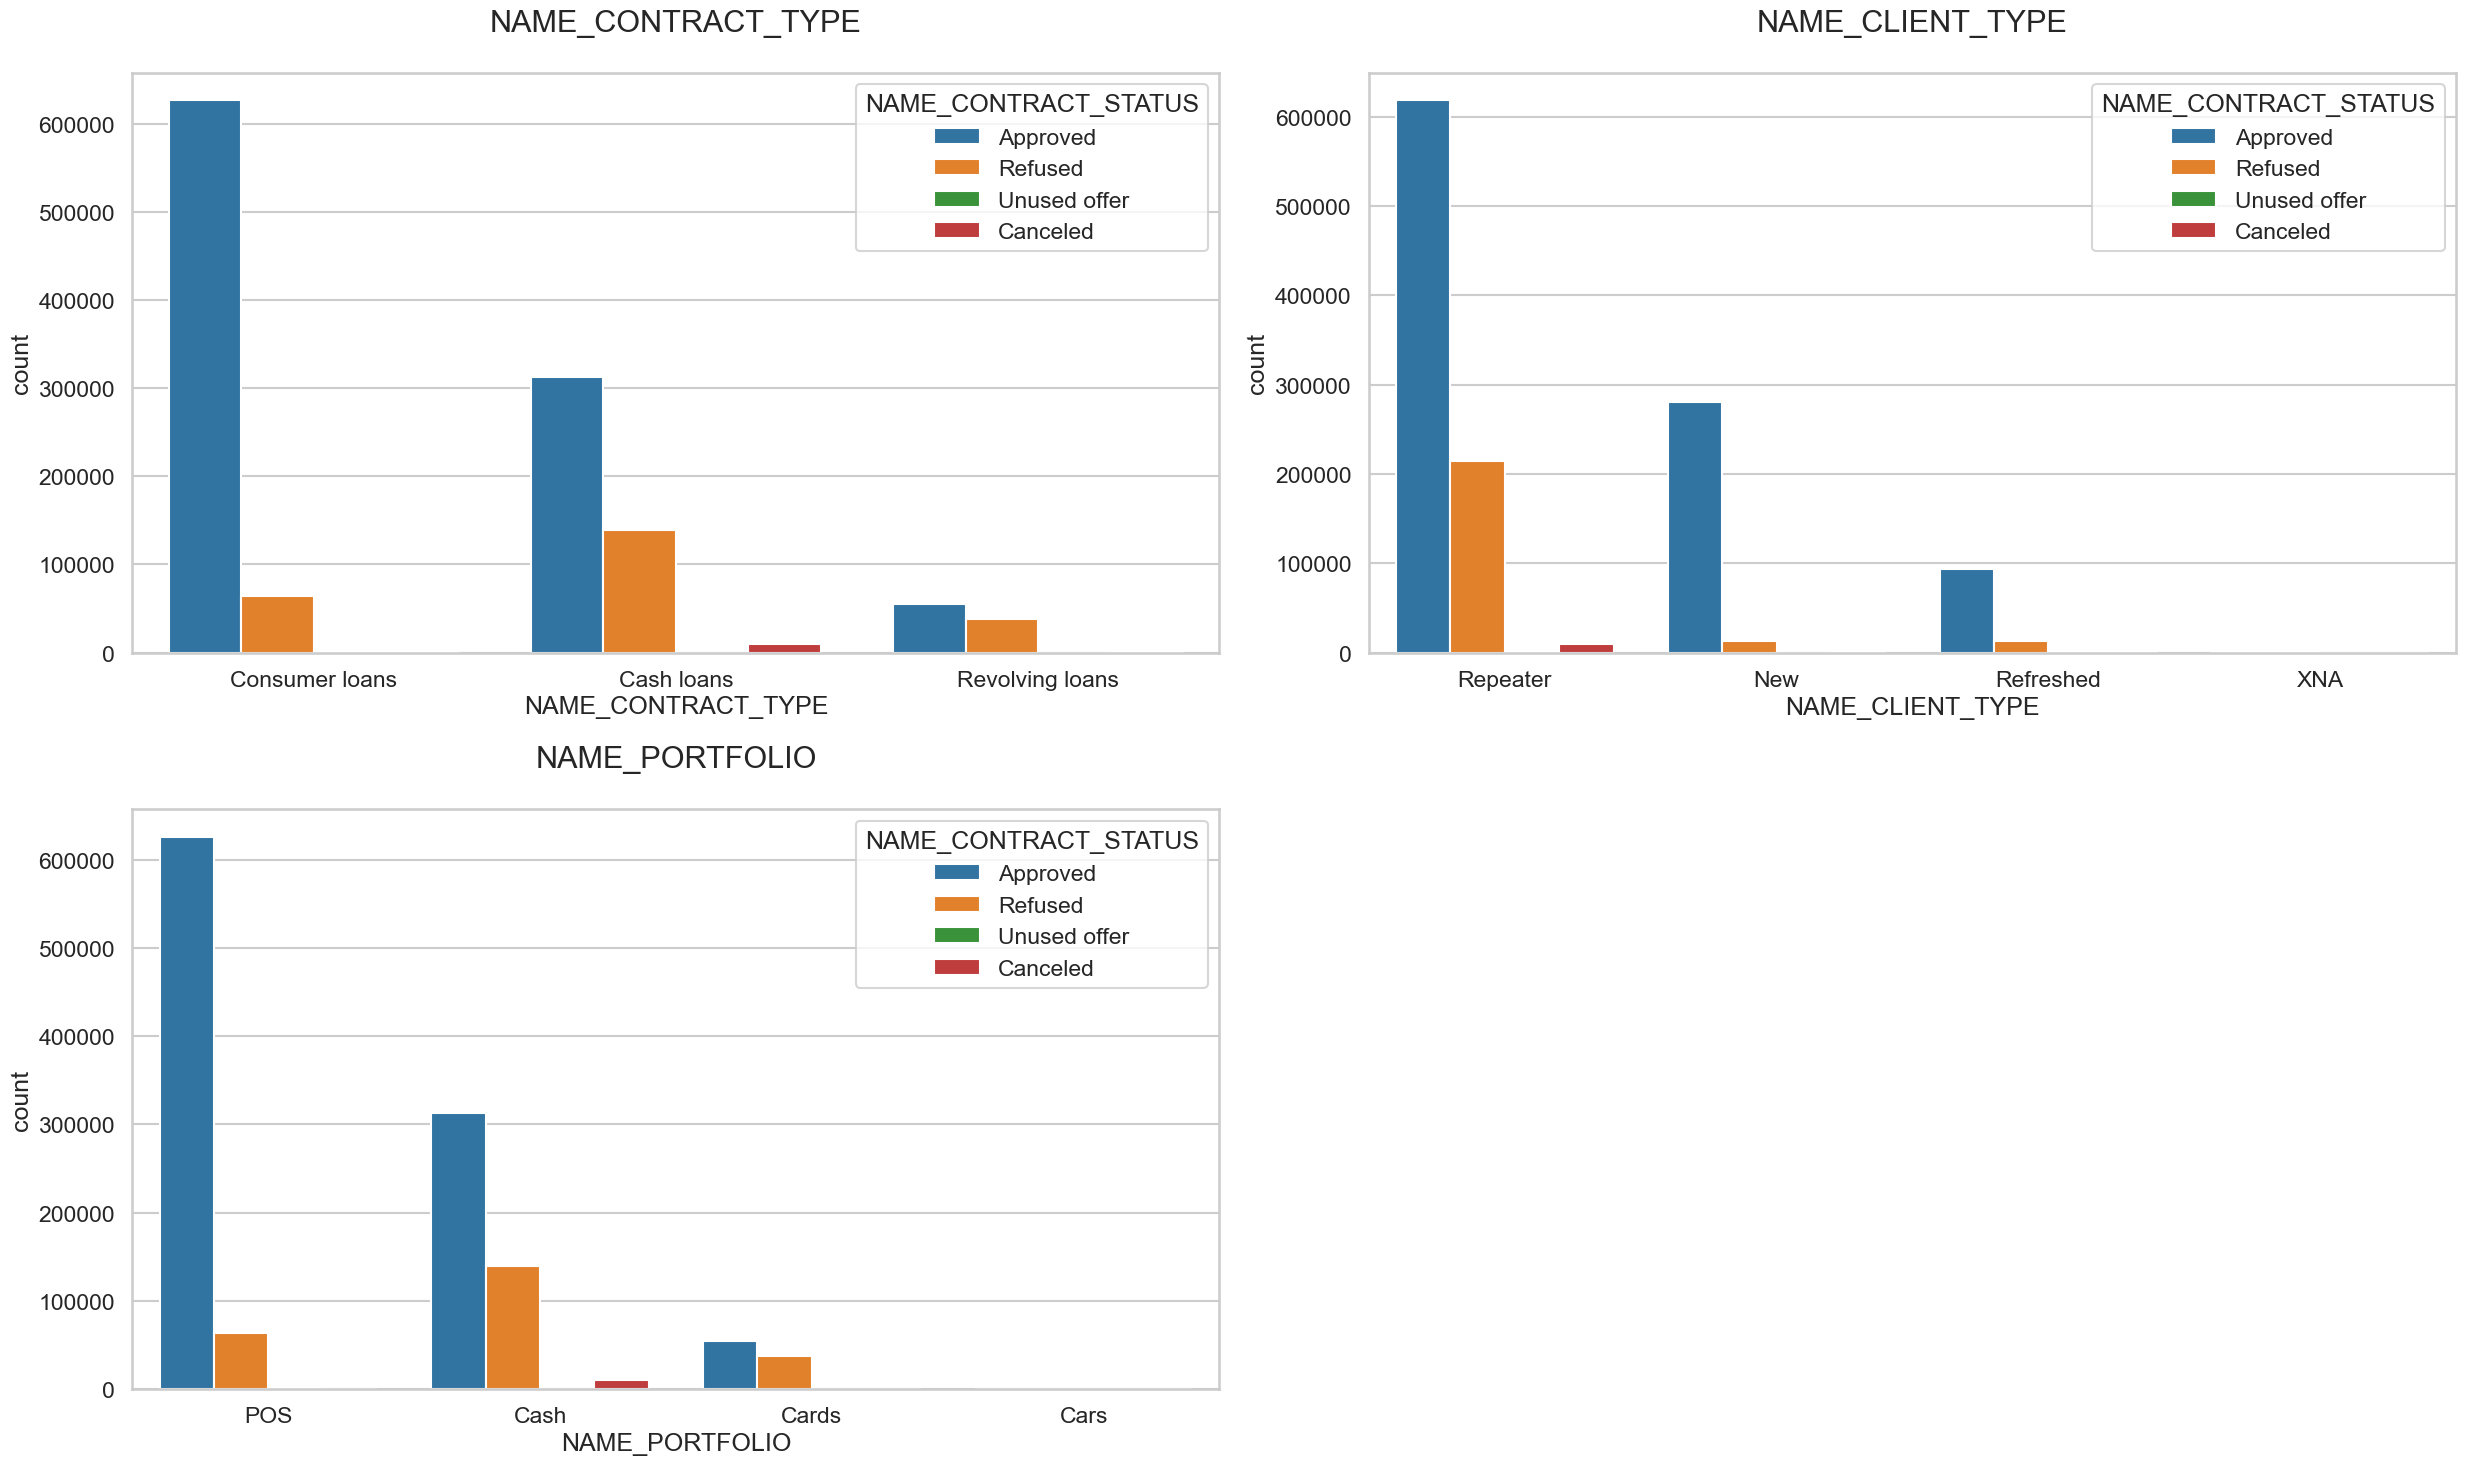

In [120]:
#Ploting the categorical columns using subplot to understand there relations.
cat_col_prev_app=['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO']
rows = 2
cols = 2
plot_counter = 1
fig = plt.figure(figsize=(25,15))
for i in cat_col_prev_app:
    plt.subplot(rows, cols, plot_counter)
    plt.title(i)
    plt.xlabel(i)
    sns.countplot(x=i, data=prev_app, hue='NAME_CONTRACT_STATUS')
    plot_counter = plot_counter + 1
fig.tight_layout()
plt.show()

### Observations
- Comsumer loan has the largest share of applications irrespectrive of the status of loan
- Unused offer of the loan seems non existant at the moment
- Repeated applicants seem to have some refused status loan suggesting bank denied due to defaulting or already a loan repayment going on
- Cashloan refusal rate seems to be higher
- POS transactions seem to be consumer loans

In [121]:
#Checking the top Corelations
df_corr_prev=prev_app.drop(axis=1,columns=['SK_ID_CURR','SK_ID_PREV'] )
correlation=df_corr_prev.corr().abs()
corr_prev = correlation.where(np.triu(np.ones(correlation.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_prev.columns=['Column1','Column2','Correlation']
corr_prev.dropna(subset=['Correlation'],inplace=True)
corr_prev = corr_prev.sort_values(by=['Correlation'], ascending=False)
corr_prev

Column1          Column2  Correlation
16  AMT_GOODS_PRICE  AMT_APPLICATION     0.999883
17  AMT_GOODS_PRICE       AMT_CREDIT     0.993028
11       AMT_CREDIT  AMT_APPLICATION     0.992965
15  AMT_GOODS_PRICE      AMT_ANNUITY     0.820895
5   AMT_APPLICATION      AMT_ANNUITY     0.820831
10       AMT_CREDIT      AMT_ANNUITY     0.814884
22      CNT_PAYMENT       AMT_CREDIT     0.700323
21      CNT_PAYMENT  AMT_APPLICATION     0.672276
23      CNT_PAYMENT  AMT_GOODS_PRICE     0.672129
20      CNT_PAYMENT      AMT_ANNUITY     0.401020

<Figure size 2000x800 with 0 Axes>

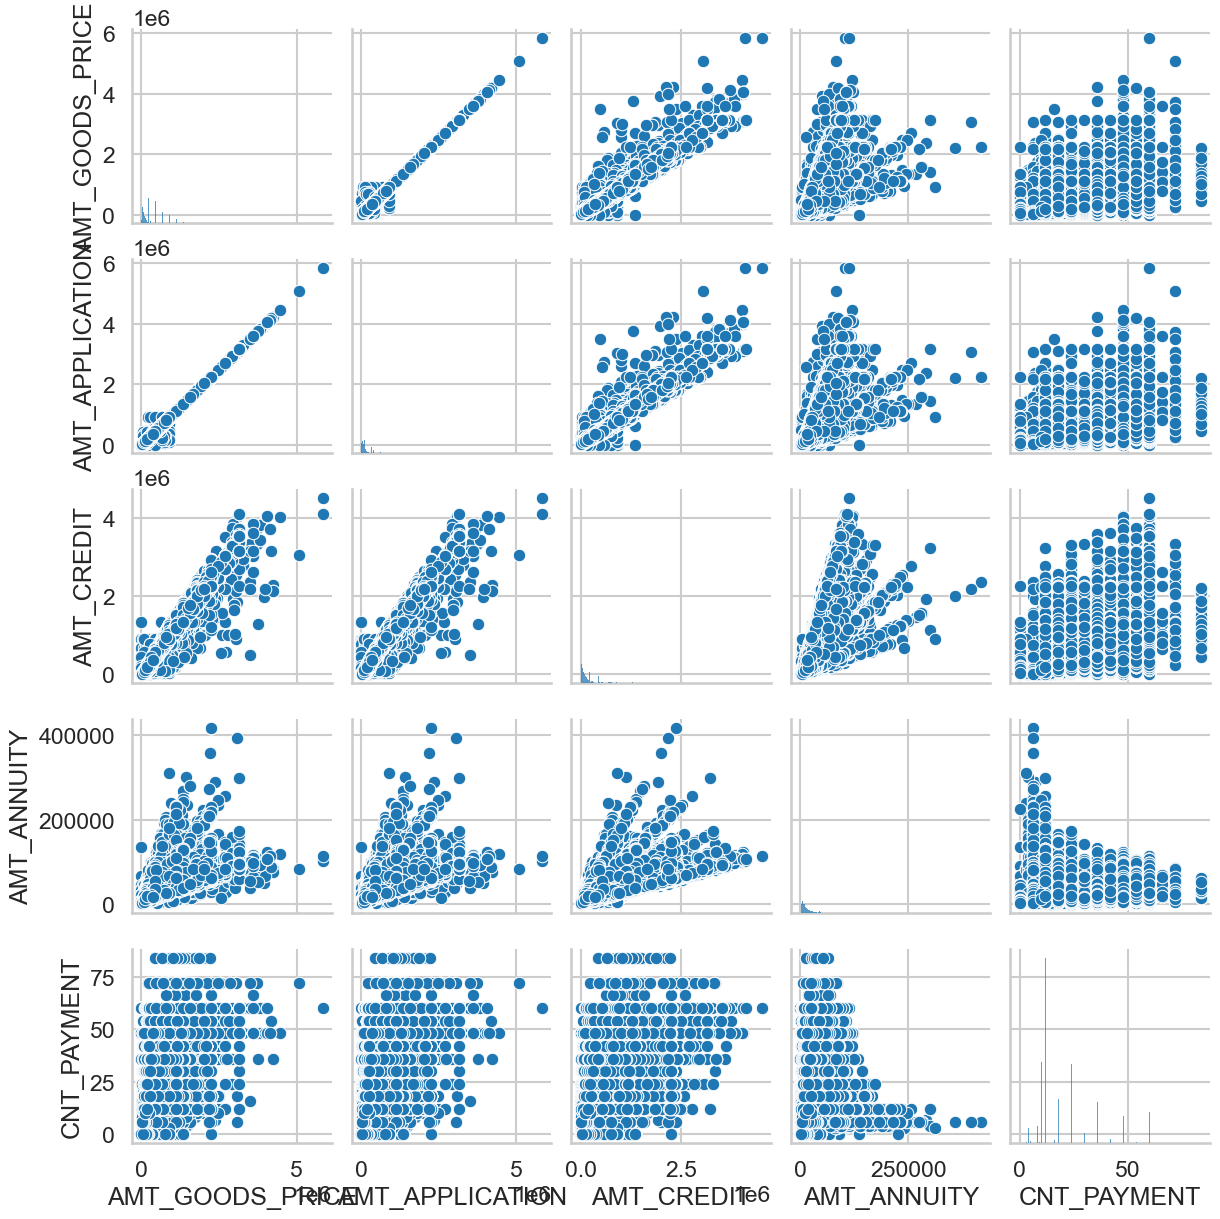

In [122]:
#Ploting a pair plot to further understand the correlations between the dataset
plt.figure(figsize=[20,8])
tmp_dataset = prev_app[['AMT_GOODS_PRICE','AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','CNT_PAYMENT']]
tmp_dataset.head()
sns.pairplot(tmp_dataset)
plt.show()

#### Observations
1. AMT_GOODS_PRICE, AMT_ANNUITY, AMT_APPLICATION columns have high correlation.
    1. Higher the value of good purchased mean more there will be need of loan so the correlation makes sense 
2. AMT_Credit and AMT_GOOD_PRICE also have high correlation
3. Expected CNT_Payment to have a high correlation with AMT_credit, based on the column description.csv, but data suggesting no such correlation




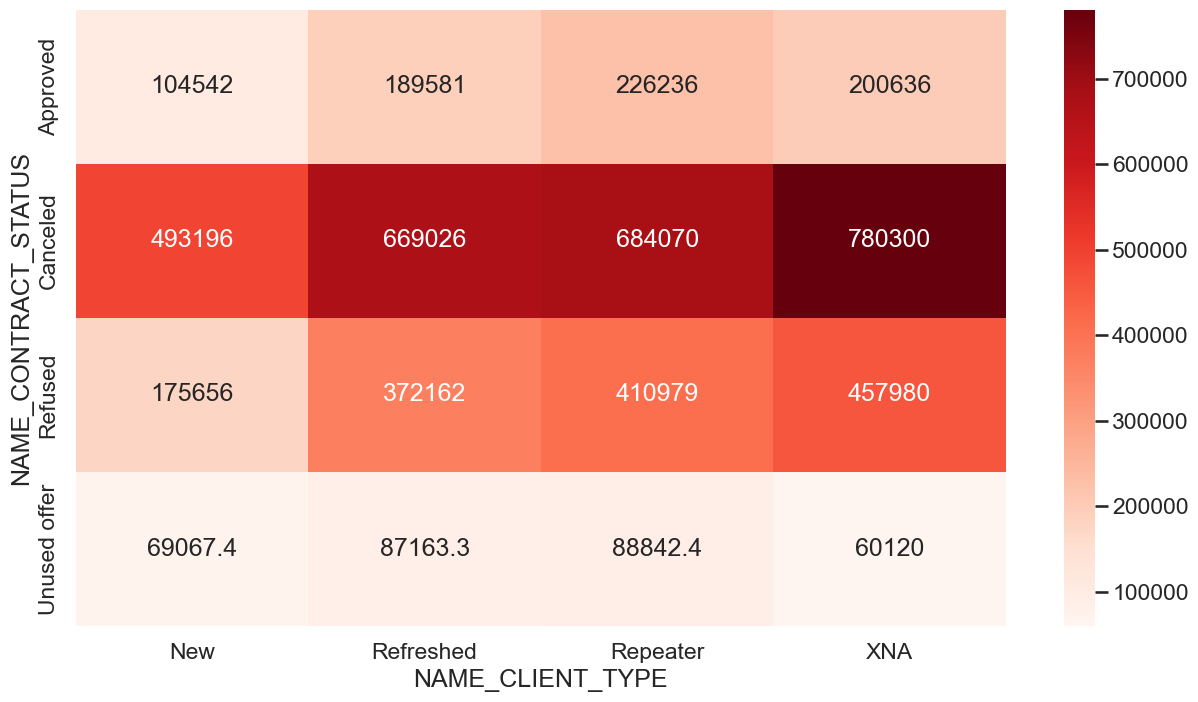

In [123]:
#Plotting a heatmap to understand the spread and relations between the various
# contract status and name client type with respect to application amout

res=pd.pivot_table(data=prev_app, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_APPLICATION')
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True,cmap='Reds', fmt="g")
plt.show()

#### Observations
1. Unused offer application amount is very low
2. Cancelled application amount is high as was predicted in the above plots as well.
3. Repreater's application amount is higher than the New customers. This suggestest that bank also favors repeated customers.

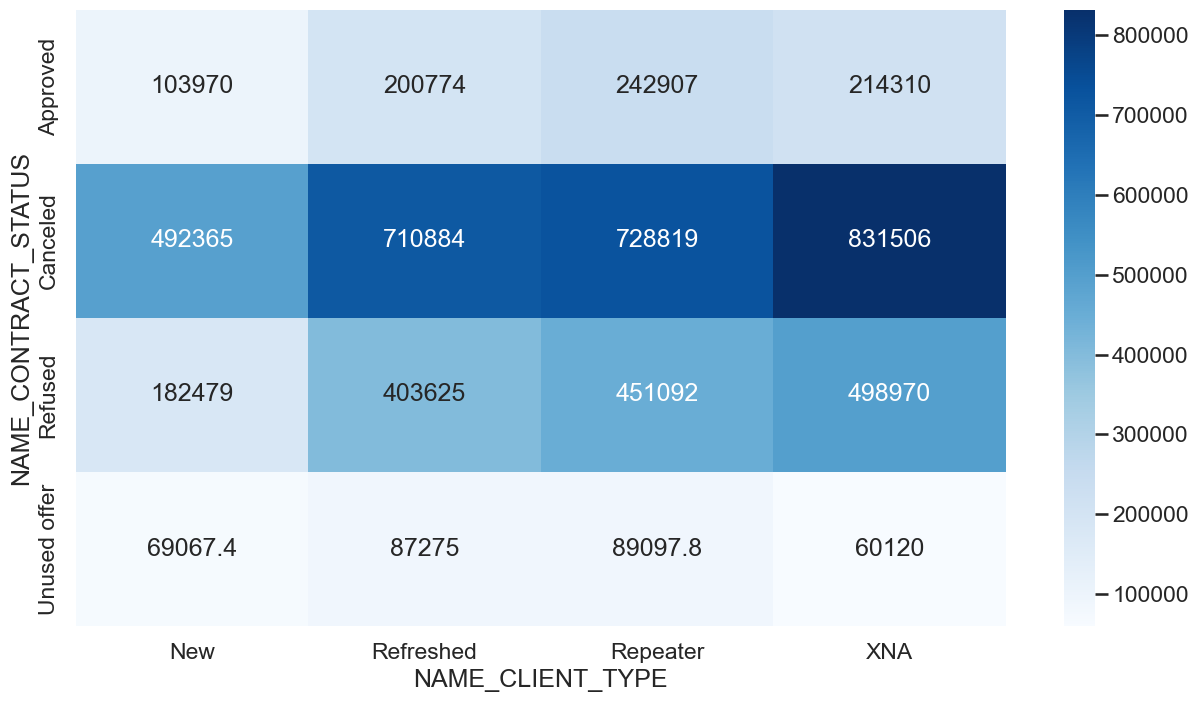

In [124]:
#Plotting a heatmap to understand the spread and relations between the various
# contract status and name client type with respect to credit amount

res=pd.pivot_table(data=prev_app, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_CREDIT')
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

#### Observations
1. The credit amout for the unused offers seems very low irrespective of wether the client in new or repeater
2. the cancelled credit ammout and refused credit amounts seem to be higher for some reason
    1. one reason could be that the client didn't need the extra credit amout and cancelled the application
    2. for the refused the case can be that bank initially decided for the higher credit amount but later on refused offer 

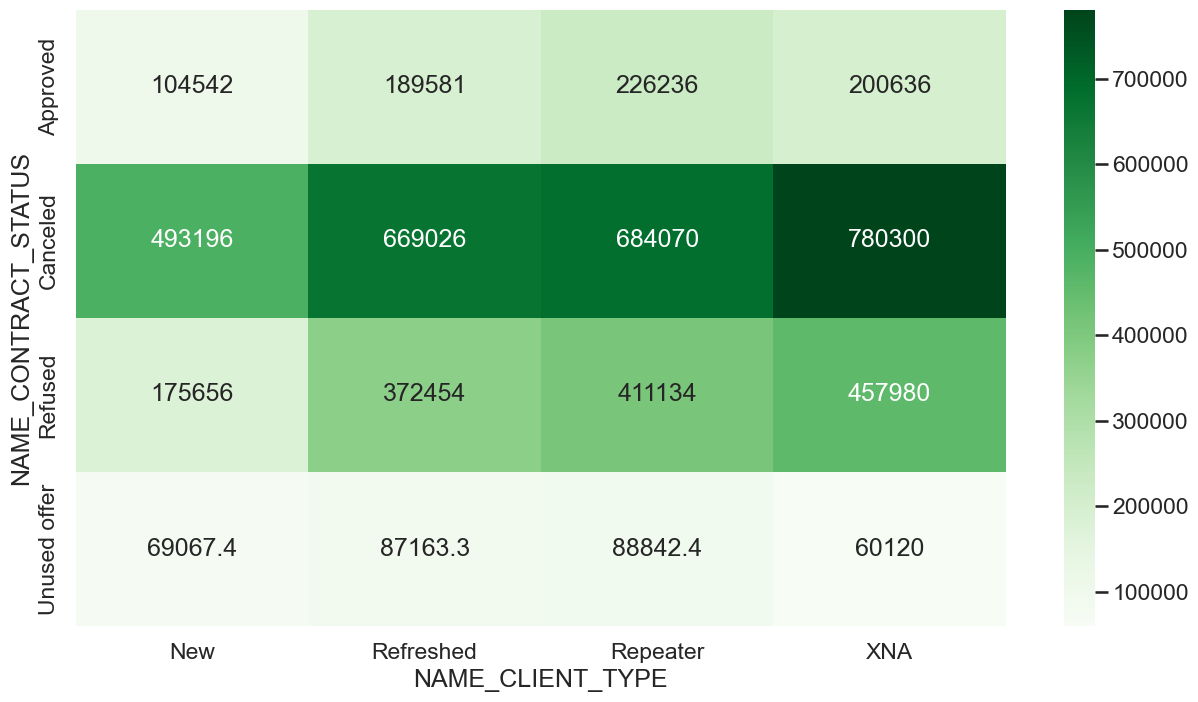

In [125]:
#Plotting a heatmap to understand the spread and relations between the various
# contract status and name client type with respect to AMOUNT GOOD PRICE

res=pd.pivot_table(data=prev_app, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_GOODS_PRICE')
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True,cmap='Greens', fmt="g")
plt.show()

#### Observations 
1. the goods value is higher for the refused and cancelled applications 

### Merging the databases

In [126]:
#Checking for the dublicate values if the key between both the databases i.e. SK_ID_CURR
dub = prev_app[prev_app.duplicated(subset='SK_ID_CURR')]
dub.shape

(908809, 16)

In [127]:
# The dublicate count suggest that upon merging the app and prev_app databases,
# they are bound to have many interesting relationships
# proceeding with the merger

In [128]:
merged_df=pd.merge( app,prev_app, how='left', on="SK_ID_CURR")
merged_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER  CNT_CHILDREN  \
0      100002       1           Cash loans           M             0   
1      100003       0           Cash loans           F             0   
2      100003       0           Cash loans           F             0   
3      100003       0           Cash loans           F             0   
4      100004       0      Revolving loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
0          202500.0      406597.5        24700.5           351000.0   
1          270000.0     1293502.5        35698.5          1129500.0   
2          270000.0     1293502.5        35698.5          1129500.0   
3          270000.0     1293502.5        35698.5          1129500.0   
4           67500.0      135000.0         6750.0           135000.0   

  NAME_TYPE_SUITE  ... AMT_GOODS_PRICE_y FLAG_LAST_APPL_PER_CONTRACT  \
0   Unaccompanied  ...          179055.0                           Y   
1          Family  ...          900000.0                           Y   
2          Family  ...          337500.0                           Y   
3          Family  ...           68809.5                           Y   
4   Unaccompanied  ...           24282.0                           Y   

  NAME_CONTRACT_STATUS NAME_CLIENT_TYPE  NAME_PORTFOLIO  \
0             Approved              New             POS   
1             Approved         Repeater            Cash   
2             Approved        Refreshed             POS   
3             Approved        Refreshed             POS   
4             Approved              New             POS   

              CHANNEL_TYPE  NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                    Stone       Auto technology         24.0   
1  Credit and cash offices                   XNA         12.0   
2                    Stone             Furniture          6.0   
3             Country-wide  Consumer electronics         12.0   
4         Regional / Local          Connectivity          4.0   

   NAME_YIELD_GROUP          PRODUCT_COMBINATION  
0        low_normal      POS other with interest  
1        low_normal             Cash X-Sell: low  
2            middle   POS industry with interest  
3            middle  POS household with interest  
4            middle  POS mobile without interest  

[5 rows x 62 columns]

In [129]:
merged_df.shape

(872354, 62)

In [130]:
#plotting to see the spread between the various contract status with respect to the targets
contract=merged_df['NAME_CONTRACT_STATUS'].unique()
contract

array(['Approved', 'Refused', nan, 'Canceled', 'Unused offer'],
      dtype=object)

Target 0 and 1 for :  Approved
0    0.918438
1    0.081562
Name: TARGET, dtype: float64


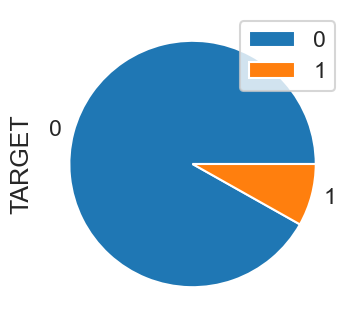

Target 0 and 1 for :  Refused
0    0.875676
1    0.124324
Name: TARGET, dtype: float64


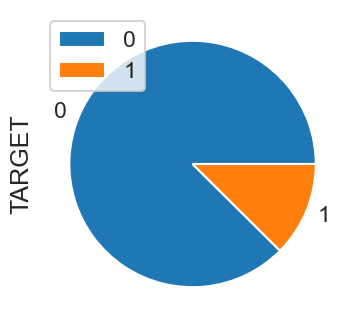

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Target 0 and 1 for :  nan
Series([], Name: TARGET, dtype: float64)


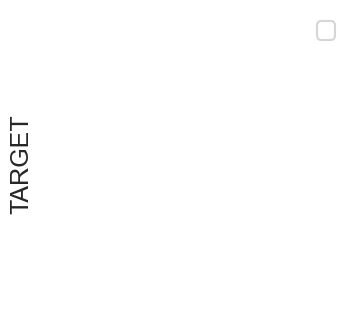

Target 0 and 1 for :  Canceled
0    0.91305
1    0.08695
Name: TARGET, dtype: float64


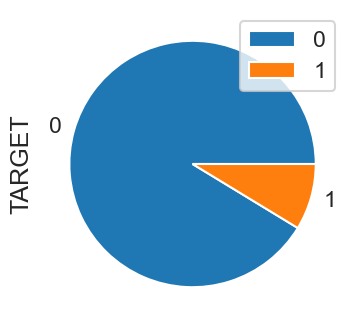

Target 0 and 1 for :  Unused offer
0    0.894595
1    0.105405
Name: TARGET, dtype: float64


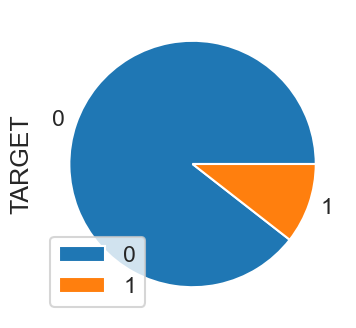

In [131]:
for i in contract:
    print("Target 0 and 1 for : ",i)
    plt.figure(figsize=[6,4])
    print(merged_df[(merged_df['NAME_CONTRACT_STATUS']==i)].TARGET.value_counts(normalize=True))
    merged_df[(merged_df['NAME_CONTRACT_STATUS']==i)].TARGET.value_counts().plot.pie(normalize=True)
    plt.legend()
    plt.show()

##### Observations
1. 7.5% of Approved loans have defaults( Ideally this percentage should have been lower since bank/financial company needs to identify these cases and reduce them, they -vely impact the bank's profit.
2. Previous applications with Refused, Cancelled, Unused loans also have defaulters which is a matter of concern. This indicates that the financial company had Refused/cancelled previous application, but has approved the current and is facing default on these loans.
3. There seems to be a high percentage of refused offers for the target 0/ people more likely to repay the loan, this needs to be minimised as well since this denotes the denied business opportunites for the Bank/Financial Companies

In [132]:
#getting the concerete values for the above observed 3 points 
# getting the values of approved defaulters 
approv_def = merged_df[(merged_df['NAME_CONTRACT_STATUS']=="Approved") & (merged_df['TARGET']==1)]
approv_def.shape[0]

55788

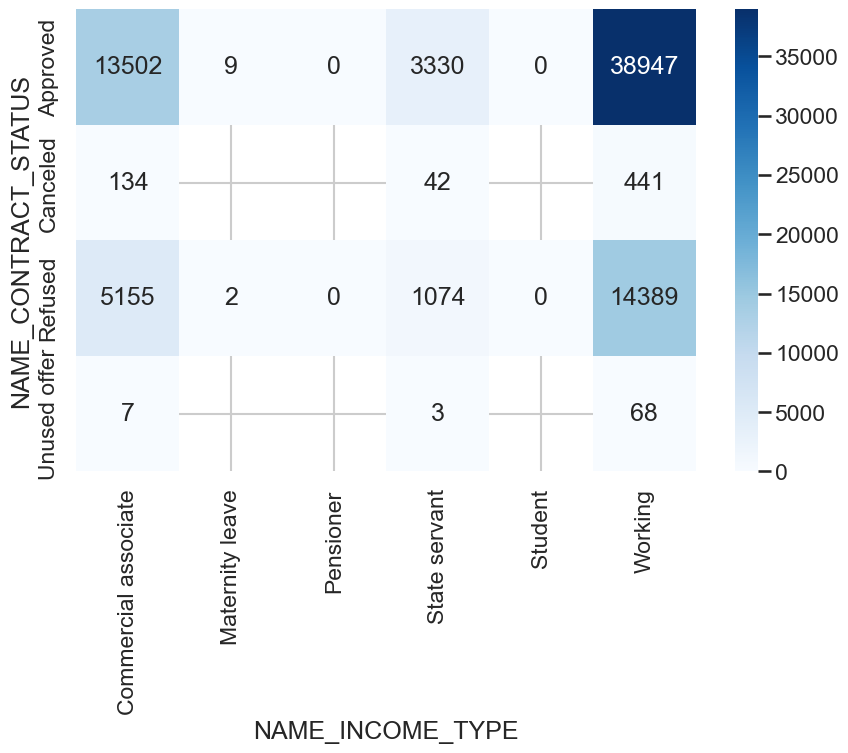

In [133]:
# Ploting for various contract status and income types with respect to the targets 

res=pd.pivot_table(data=merged_df,index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values='TARGET', aggfunc="sum")
plt.figure(figsize=(10,6))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

#### observations
1. The above spread confirms the Point 2 
    1. Since Target 1 are defaulters, higher on the above matrix shows correlation to defaulters.
    2. Working applicant with Approved status have defaulted in highest numbers (wrong for the business) 
    3. 14,389 applicanst of working class were REFUSED earlier and now have defaulted.

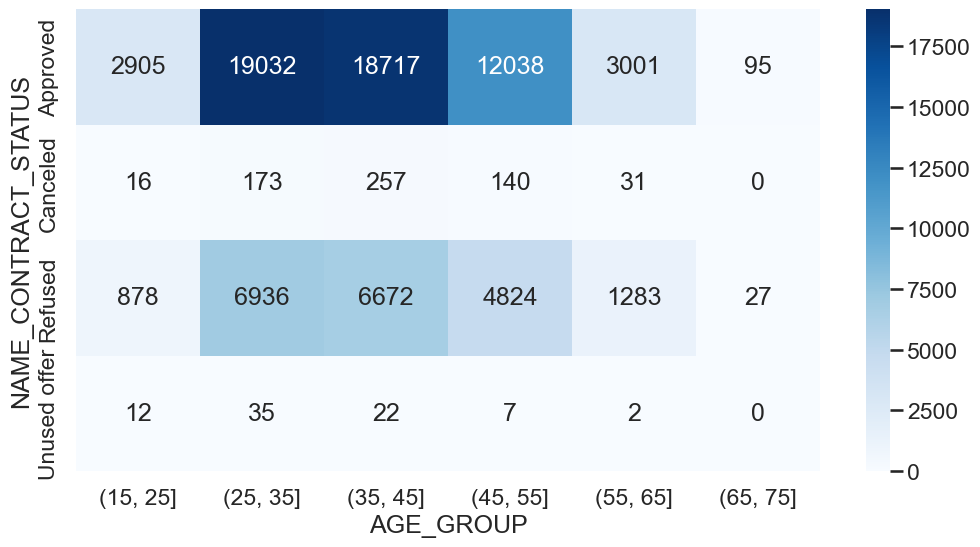

In [134]:
# Ploting for various contract status and age group with respect to the targets to understand the 
#spread since it was earlier noticed that age group of 25-45 gets more loans and also defaults more

res=pd.pivot_table(data=merged_df,index="NAME_CONTRACT_STATUS",columns="AGE_GROUP",values='TARGET', aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

#### Observations
- The above plot reveryfies the inital observations, people of age 25 to 45 do tend to default more
- Refused, cancelled, loans in previous application have defaulted in current.

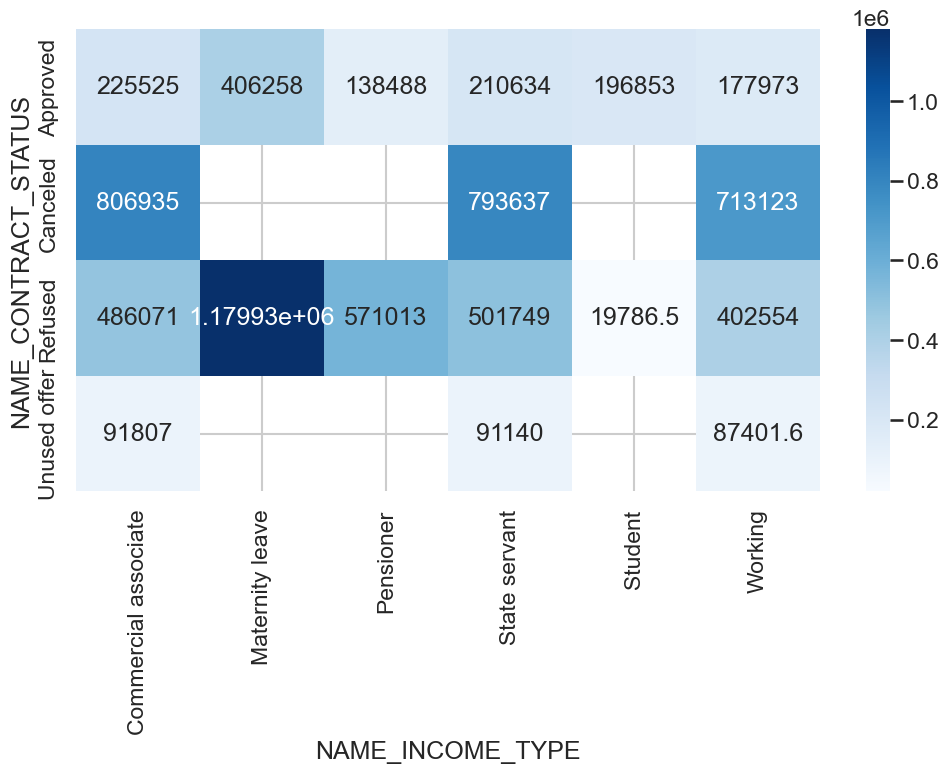

In [135]:
# Ploting for various contract status and income type  with respect to the credit amount to understand
# the spread of applicants based on income type

res=pd.pivot_table(data=merged_df,index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values='AMT_CREDIT_y')
plt.figure(figsize=(12,6))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

##### observations
1. It seems that higher credit has been offered to unemployed and maternity leave which is a concern
2. Unused offers have smaller credit values which makes sense why they are unused

In [136]:
#Reviewing the data of approved defaults once more to hopefully draw some conclusions
col_list=['INCOME_GROUP','AGE_GROUP','CODE_GENDER','NAME_INCOME_TYPE','OCCUPATION_TYPE',"ORGANIZATION_TYPE",'OWN_CAR_flag','OWN_REALTY_flag' ]

for i in col_list:
    print(approv_def[i].value_counts(normalize=True))
    print('\n')

VL    0.290744
M     0.240787
L     0.164301
H     0.160626
VH    0.143543
Name: INCOME_GROUP, dtype: float64


(25, 35]    0.341149
(35, 45]    0.335502
(45, 55]    0.215781
(55, 65]    0.053793
(15, 25]    0.052072
(65, 75]    0.001703
Name: AGE_GROUP, dtype: float64


F    0.56159
M    0.43841
Name: CODE_GENDER, dtype: float64


Working                 0.698125
Commercial associate    0.242023
State servant           0.059690
Maternity leave         0.000161
Name: NAME_INCOME_TYPE, dtype: float64


Laborers                 0.314332
Sales staff              0.168312
Drivers                  0.111941
Core staff               0.090577
Managers                 0.070796
Security staff           0.038783
High skill tech staff    0.038361
Cooking staff            0.034270
Medicine staff           0.032667
Accountants              0.026530
Cleaning staff           0.024442
Low-skill Laborers       0.019739
Private service staff    0.009659
Waiters/barmen staff     0.007697
Secretaries      

### Conclusions
#### Default cases in Approved Applications
All the below variables were established in analysis of Application dataframe as leading to default.
Checked these against the approved application and default cases and it proves to be correct
- INCOME_GROUP - very low followed by medium income 
- AGE_GROUP - 25-35, followed by 35-45
- NAME_INCOME_TYPE - Working
- OCCUPATION_TYPE - Labourers 31%
- ORGANIZATION_TYPE - Business type 3
- OWN_CAR_flag' - 31% dont own a car
- OWN_REALTY_flag - 70% dont have own there our house/real estate

## CASE SUMMARY / BUSINESS UNDERSTANDINGS
# Case Summary
   
### For Defaulters
Below pointers were observed/established in the analysis of applications and previous applications dataset : 
Rechecked there correctness by merging the data and rederiving there relations against approved loans with defaulters present
1. very low income groups followed by medium income
2. age group of 25 - 35 followed by age group of 35 to 45
3. Male applicants defaulting more as comparet to the female applicants
4. Unemployed tends to default more which makes sense 
5. Labourers, Salesman, Drivers
6. Business type 3
7. Defaulters usually don'y own real-estate
- Other IMPORTANT Factors to be considered
1. No of Bureau Hits in the past, zero or less hits is good
2. Income not matching to the Good Bought is a concern
3. Data suggested that previous applications that were not approved the loans can also default on there payments which is a concern. This indicates that the bank/financial company had earlier denied the loan and now approved it and is facing default in case of these applicants. 
        
### For Target 0 / Credible Applications refused   
- bank offered a lower credit/loan amount on the unused offers, that seems to be the case why offers are unused
- Female applicants are less favourable to default and hence should be gived a higher priority
- even though working applicants tend to default more(roughly 60%). still for the rest 40%, it feels business opportunity denied to not consider them. Proper scrutinity and parameters need to be enforced on these cases.
- Previously denies applications also have cases where payments are coming on time in current application. This indicates that possibly wrong decisions were done in those cases.
